# Crawling

## * 크롤러: 시스템적으로 웹을 탐험하는 애

### *  우리의 목표) 시드 주소를 주면 www 알아서 돌아다니게 하는것
- HTML. 그래서 구글이 검색이 좋은건 봇 만드는 것으로 시작했기 때문. 그래서 검색 성능이 좋은거에요.
- INBOUND 및 OUTBOUND 사이의 링크로써 사이트의 영향력을 추정(매트릭스로 수렴할때까지 하는 것)할 수 있어요 

#### <사용하는 이유>
-인덱싱: 색인 하기 위해서

- 자연어처리 입장에서 수많은 언어 패턴 수집
정보검색 입장에서 수 많은 정보 수집
데이터/텍스트 마이닝에서 나에게 필요한 정보 수집하기 위함도 있고
수집에 더불어 '인덱싱'(색인)을 수행하기 위함. 색인은 얼마나 특정 단어들이 있었는지를 기술해 놓는 프로그램/자료구조.
-인공지능 입장) 피쳐를 어떻게 찾느냐이기에 인덱싱이 중요하나 우리는 인덱싱 전까지만 할거에요. 

#### 포커스드 크롤링) 내가 원하는 범위까지만 가져오는 것
#### 씨드로부터 시작해서 반복. url로부터 무언가를 패치하고 이 url을 반복적으로 찾을거에요. 
- 씨드로 출발해서 패치하는데 이걸 리퀘스트하고, 리스폰스하면 이 파일을 로우로 하든 레귤러 익스프레션으로하든(혹은 DOM으로 파싱) 해서 '링크'를 찾는데 이걸 재귀적으로 반복적으로 돌릴거에요. 즉 링크를 찾고 정리하고 반복할거에요.  
- 수많은 사이트를 돌아다닐 수 있을거고,멀티프로세스 및 멀티프로세싱이 필요해서 구글이 분산처리 했단걸 이해할 수 있을거에요.
- 일단 우리는 메모리에서 돌릴거에요. FIFO, 선입선출, 큐 등. 리스트를 가지고 큐처럼 사용하는 식으로 사용할거에요

#### SCRAPY
- 시드를 주면 알아서 돌아다녀요. scrapy와 beautifulsoup(텍스트 받아 dom r객체 만들어요. 패치하기 위해)(스르래 파이는 그걸 뛰어 넘는것이고 우리는 간단하게 이걸 만들거에요)

#### 우리가 오늘 코드로 만들 것
- 씨드 받으면 > 겟으로 리퀘스트하고>리스폰스 받으면 링크 찾고> 이 url이 누구는 http/https/내부링크(#_일종의 goto)할건데> URL normalization>url filter> 한번 갔던 곳인지 보고 갔던 곳이면 escape, 못 본 곳이면 앞으로 가고>앞선 work-thread-manager>앞선 과정 반복
- 부산물: 리퀘스트로 리스폰스 받은 html 통. 

#### 지난주까지한거: 리퀘스트하고 리스폰스받음 <>이번주: 크롤러 만들어봤다고 말할 수 있어요.

## *스크래핑 예제 사이트: http://example.webscraping.com/places/default/index
- 시드 : url
- 하이퍼 링크를 찾아야해요. 프리디파인드된게 있고 a. a태그에서 href 속성이 경로니까 이걸 가져올거에요.
- a 태그를 찾고 href 값만 가져올거에요(우리는 html에서 할거니까 이렇게 해요. javascript면 다르게 또 작업해야하나)
- 큐라고 하는 곳에 입력으로 줄거고, 파싱을 했으니까 다시 큐에서 첫번째거 가져와서 req 보내고 resp 받을거고
- a링크만 찾을거고 다시 큐로 넣을거고


## * 정규식 확인 예제 사이트: www.regexr.com

In [3]:
http://example.webscraping.com/places/default/index

SyntaxError: invalid syntax (<ipython-input-3-98017b75335d>, line 1)

# <dfs Search _너비 우선 서칭-Pop(0)>_  USING GOOGLE site
## ■준비물1. download 함수

In [2]:
#잘정의하면계속쓸 download함수
import requests
import requests
import time
import json
import re
from bs4 import BeautifulSoup
url= "http://example.webscraping.com/places/default/index" #url은 상황에 맞게 작성
headers={"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"}
def download(method, url, param=None, data=None):
#없을 수도 있는 애들에 초기값 설정

    try:
        resp=requests.request(method, url,params=param,data=data, headers=headers)
    #여기서 에러 난다면 어디서? 
    #resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        print(e.code)
        print(e.reason)

    return resp


#download("get", url)
#headers=None
#html=download("get",url)
#html.request.headers


In [12]:
url="http://example.webscraping.com/places/default/index" ###url을 받아서
html=download("get",url)  ###url을 겟방식으로 쓰는 다운로드 함수에 집어넣어서 html 만들어

In [13]:
dom=BeautifulSoup(html.text, "lxml") ### 긁어온 html 내용을 lxml 방시으로 해서 dom 에 저장하고
[_["href"] for _ in dom.find_all("a")]  ### 그 중에서 a 태그가 붙은 것 중에 [href]부분을 찾아

[]

- #) 쟤는 실제 url 담는 애가 아니에요. 이건 가짜니까.
- 현 문재) 글자 너무 기니까 3글자 이상만 만들어보아요.


In [14]:
[requests.compat.urljoin(url, _["href"]) for _ in dom.find_all("a") if len(_["href"])>3]

[]

- 리퀘스트보내서 리스폰스 받았고 리으 받아서 노말레이전도 했는데 이제 딱 url filter로 하나의 스레드/프로세스가 한 일을 한거
- 이제 링크 넘기면 체크를 할거에요 

## ■준비물2. parseURL 코드 작성 **
- 오잉 여기는 return 값에 urljoin한게 들어가네요
- url을 긁어 오면 list로 만들어서 메인으로 전달해 주어야 한다

In [2]:
def parseURL (seed): ###여기서 seed 값. 먹이값은 url일거야
    html=download("get",seed) ###다운로드 함수를 이용해서 get방식의 메소드로 seed(url)열건데, 이걸 html 과정에 저장할거야
    dom=BeautifulSoup(html.text,"lxml") ### html.text로 그 내용을 보고 dom 형식으로 저장해둡니다.
    
    return [requests.compat.urljoin(url, _["href"]) for _ in dom.find_all("a") if _.has_attr("href") and len(_["href"])>3 ]
#._has_attr("href")는 안 썼을 경우 아래의 코드에서 문제가 생길 수 있어
# a 태그 밑의 href 찾는거라서. 
# 길이 3이상인것: 길이 너무 짧은 내장형 # 주소같은거 걸러내려고

### 크롤러 코드 (예제 사이트로♥)

In [3]:
queue= list() ### 큐는 리스트 방식으로 지정하고
queue.append("http://example.webscraping.com/places/default/index"  ### append를 이용하여 큐에 값을 하나씩 뒤에 붙여줍니다.
seen=list() ###seen은 내가 쓴 함수 보려고 하는건데, 리스트 방식으로 표기합니다. 

#선입선출- 큐_ pop으로 뒤에 넣고 append로 뒤에 붙이고
while queue: #항상 트루, 무한정 돌려서 큐의 사이즈는 커질거에요. 
    baseURL=queue.pop(0) ###baseURP은 리스트 형식의 큐 중에서 0번째 것 즉 첫번째것 빼내. (큐는 fifo이니까 처음거 빼는거야)
    seen.append(baseURL) ### 그리고 뺀 녀석은 한번 봤던 seen 부분에 붙여넣는거지. 
    #time.sleep(60) # 속도가 빠를 수 있으니까 sleep하고 이러면 1분 걸릴거에요
    linkList=parseURL(baseURL) ### 이 녀석들을 parseURL에 넣어서 리스트 형식으로 만듭니다:)
    # 링크를 가져와서 이전에 안 갖고 왔으면 갖고오고
    for link in linkList:
        if link not in queue and link not in seen: ### 만일 큐에 링크가 없고, 또 한번봤던 곳(seen)에도 링크가 없다면
            queue.append(link) ### 큐에 링크를 추가해주세요
    print("Queue:{0}, Seen:{1}".format(len(queue), len(seen))
    # queue.extend(linkList)
    
## 돌리면 사이트 죽으니까 일단은 돌리지 말아요:)

SyntaxError: invalid syntax (<ipython-input-3-26dfed7c00e8>, line 3)

## ■준비물3. 실질적 url 이용하여 크롤링 탐색
### 크롤러 코드 변경 (구글 사이트로)
- 구글로 던질경우 : 내가 던진 것과 유사한 페이지가 올라와서 양질의 데이터 찾을 수 있음
- 링크만 따서 어펜드하는데 분명히 뻗을 거에요. 뻗는 건 메세지 참조해보세요

In [18]:
queue= list()
#queue.append("url")로 씨드를 줍니다.
queue.append("https://www.google.com/search?source=hp&ei=tN8rXauRMYn48gW0goiQAg&q=%EB%B0%95%EB%B3%B4%EC%98%81&oq=%EB%B0%95%EB%B3%B4%EC%98%81&gs_l=psy-ab.3..0l10.1493.2681..2808...1.0..1.122.1058.5j7......0....1..gws-wiz.....0..0i10j0i131.G5ByTICxyvI")
seen=list()

#선입선출- 큐_ pop으로 뒤에 넣고 append로 뒤에 붙이고
while queue: #항상 트루, 무한정 돌려서 큐의 사이즈는 커질거에요. 
    baseURL=queue.pop(0)
    seen.append(baseURL)
    time.sleep(1) # 속도가 빠를 수 있으니까 sleep하고 이러면 1분 걸릴거에요
    linkList=parseURL(baseURL)
    # 링크를 가져와서 이전에 안 갖고 왔으면 갖고오고
    for link in linkList:
        if link not in queue and link not in seen:
            queue.append(link)
    print("Queue:{0}, Seen:{1}".format(len(queue), len(seen)))
    # queue.extend(linkList)

    

Queue:88, Seen:1
Queue:102, Seen:2
Queue:103, Seen:3
Queue:104, Seen:4
Queue:105, Seen:5
Queue:106, Seen:6
Queue:107, Seen:7
Queue:107, Seen:8
Queue:108, Seen:9
Queue:109, Seen:10
Queue:110, Seen:11
Queue:111, Seen:12
Queue:112, Seen:13
Queue:113, Seen:14
Queue:114, Seen:15
Queue:115, Seen:16
Queue:116, Seen:17
Queue:117, Seen:18
Queue:118, Seen:19
Queue:119, Seen:20
Queue:120, Seen:21
Queue:121, Seen:22
Queue:122, Seen:23
Queue:123, Seen:24
Queue:124, Seen:25
Queue:125, Seen:26
Queue:126, Seen:27
Queue:127, Seen:28
Queue:128, Seen:29
Queue:129, Seen:30
Queue:130, Seen:31
Queue:131, Seen:32
Queue:132, Seen:33
Queue:133, Seen:34
Queue:208, Seen:35
Queue:264, Seen:36
Queue:265, Seen:37
Queue:264, Seen:38
Queue:265, Seen:39
Queue:266, Seen:40
Queue:267, Seen:41
Queue:268, Seen:42
Queue:324, Seen:43
Queue:325, Seen:44
Queue:326, Seen:45
Queue:327, Seen:46
Queue:328, Seen:47
Queue:329, Seen:48
Queue:330, Seen:49
Queue:331, Seen:50
Queue:332, Seen:51
Queue:333, Seen:52
Queue:334, Seen:53
Que

KeyError: 'href'

- append: 리스트에서 하나씩 넣는거
- extend: 리스트 자체를 통으로 넣는것
- 위의 코드 문제: 큐가 90여개 나왔음. 이는 필요없는 정보까지 긁어왔기 때문.
- 따라서 내가 원하는 (구글에서 '박보영' 검색해서 나오는 8가지 정도의 내용) 부분만 발췌하려면 아래처럼 수정해야함

In [3]:
#잘정의하면계속쓸 download함수
import requests
import requests
import time
import json
import re
from bs4 import BeautifulSoup
url= "www.google.com/search" #url은 상황에 맞게 작성
headers={"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"}
def download(method, url, param=None, data=None):
#없을 수도 있는 애들에 초기값 설정

    try:
        resp=requests.request(method, url,params=param,data=data, headers=headers)
    #여기서 에러 난다면 어디서? 
    #resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        print(e.code)
        print(e.reason)

    return resp


#download("get", url)
#headers=None
#html=download("get",url)
#html.request.headers


### 씨드 주소 만들기
- 내가 원하는 박보영에 대한 구글 검색만 가져오기
- href 에서 h3 태그들에 대해서 탐색할 거임

In [115]:
url="https://www.google.com/search"
param={
                    "source":"hp",
                    "ei":"4zUoXfDhGMiE8gXl3K2oDw",
                    "q":"박보영",
                    "oq":"박보영",
                    "gs_l":"psy-ab.3..0l10.44389.45851..46019...1.0..1.128.895.8j1......0....1..gws-wiz.....0..0i10j0i131.UiEVgDQxvkA"
                
}
html=download("get",url,param)
dom=BeautifulSoup(html.text, "lxml")

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><meta content="origin" name="referrer"><title>박보영 - Google 검색</title><script nonce="OJSXGbLNUlwFZ/He1qX3fg==">(function(){window.google={kEI:\'0AMsXaOQHNr7-QbUjIPQCw\',kEXPI:\'31\',authuser:0,kscs:\'c9c918f0_0AMsXaOQHNr7-QbUjIPQCw\',kGL:\'KR\'};google.sn=\'web\';google.kHL=\'ko\';})();(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||google.kEI};google.getLEI=function(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b};google.https=function(){return"https:"==window.location.protocol};google.ml=function(){return null};google.time=function(){return(new Date).getTime()};google.log=function(a,b,e,c,g){if(a=google.logUrl(a,b,e,c,g)){b=new Image;var d=google.lc,f=goo
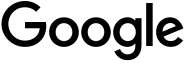
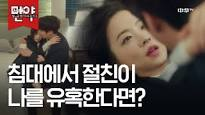
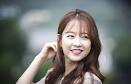
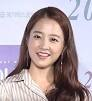
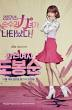
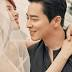

In [116]:
html.text

#### .LC20lb가 h3 제목 태그

In [117]:
[_.find_parent()["href"] for _ in dom.select(".LC20lb")] ######

['https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81',
 'https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81%EC%9D%98_%EC%9E%91%ED%92%88_%EB%AA%A9%EB%A1%9D',
 'https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81',
 'https://news.joins.com/article/22895953',
 'https://movie.daum.net/person/main?personId=105244',
 'https://www.msn.com/ko-kr/entertainment/tv/hd%EC%8A%A4%ED%86%A0%EB%A6%AC-%EC%9E%91%EC%9D%80-%EA%B1%B0%EC%9D%B8-%EB%B0%95%EB%B3%B4%EC%98%81%E2%80%A6%EA%B7%B8%EC%9D%98-%EC%97%B0%EA%B8%B0%EC%97%90-%EB%8C%80%ED%95%9C-%ED%9D%94%EC%A0%81%EB%93%A4/ar-BBUvL0V',
 'https://twitter.com/hashtag/%EB%B0%95%EB%B3%B4%EC%98%81']

#### 큐 탐색(구글)

In [120]:
#@@@@구글에서 검색한거 중에서 8개 녀석에 대해서 진행하는거 @@@
queue= list()
#queue.append("url")로 씨드를 줍니다.
queue.extend([_.find_parent()["href"] for _ in dom.select(".LC20lb")]) ###여기는 extend를 넣어요. 
###append로 넣는경우는 [[1,2,3]] 이렇게 결과가 통인데
###extend로 넣는 경우는 [1,2,3] 이렇게 각각이 들어간대. 
### 구글 홈페이지에서 '박보영' 검색했을때 관련 사이트가 여러개 있을 수 있으니, 이걸 리스트에 넣어서 각각 결과 활용하고 싶으니 extend
seen=list()

#선입선출- 큐_ pop으로 뒤에 넣고 append로 뒤에 붙이고
while queue: #항상 트루, 무한정 돌려서 큐의 사이즈는 커질거에요. 
    baseURL=queue.pop(0) ### fifo 방식이니까 큐에서 빼내서 baseURL에 넣고
    seen.append(baseURL) ### 한번봤던 seen에 baseURL 넣어요
    time.sleep(1) # 속도가 빠를 수 있으니까 sleep하고 이러면 1분 걸릴거에요
    linkList=parseURL(baseURL) ###큐에서 빼낸 녀석들은 parseURL에 집어 넣어서 각각 링크 리스트로 만들어주고
    # 링크를 가져와서 이전에 안 갖고 왔으면 갖고오고
    for link in linkList:
        if link not in queue and link not in seen:
            queue.append(link)
    print("Queue:{0}, Seen:{1}".format(len(queue), len(seen)))
    # queue.extend(linkList)
    # append: 리스트에서 하나씩 넣는거
    # extend: 리스트 자체를 통으로 넣는것

Queue:6, Seen:1
Queue:5, Seen:2
Queue:4, Seen:3
Queue:3, Seen:4
Queue:2, Seen:5
Queue:1, Seen:6
Queue:0, Seen:7


* 현재 이 '너비 우선'을 '깊이 우선'으로 변경하려면?
- 스택을 만들어야해요. 
- lastin firstout. 인덱스를 어디서 가져오느냐 따라 너비우선인지 깊이 우선인지 정해짐
- 아까의 너비우선은 fifo라서 0에서 가져왔던 거고. 
- 팝을 -1로 변경해. 그럼 스택처럼 움직일거구ㄸ-
- 포커스드는 특정 도메인 안에서만 돌게 해요. 가령 네이버 검색으로 바꾸면 네이버에서 카페, 블로그등 많이 제공하는데 남들이 로그인 안한채로 접속할 수 있는게 블로그 및 지식인임. (카페는 해당 카페 가입되어야하고)(지식인은 네이버와 관련된 링크니까 빼고) 
- 네이버 블로그라고 하는 도메인 내에서만 크롤링 하게끔 만들어볼거에요.

### 깊이우선
- pop(-1)

# 포커스드 크롤링
- 보통 정보 탐색에서 사용합니다.
- 정해진 도메인 안에서만 돌아가게끔 합니다
- 아래는 사용할 다운로드 함수:) url은 상황에 맞게 바꾸고, headers는 내 크롬 환경

#### 1. 다운로드 함수(네이버) 

In [125]:
#다운로드 함수
import requests
import requests
import time
import json
import re
from bs4 import BeautifulSoup
url= "https://search.naver.com/search.naver" #url은 상황에 맞게 작성
headers={"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"}
def download(method, url, param=None, data=None):
#없을 수도 있는 애들에 초기값 설정

    try:
        resp=requests.request(method, url,params=param,data=data, headers=headers)
    #여기서 에러 난다면 어디서? 
    #resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        print(e.code)
        print(e.reason)

    return resp



#### 1. 다운로드 함수(네이버) 
- 설정 맞춰보기

In [127]:
# 다운로드 함수- 설정 맞춰주기
url="https://search.naver.com/search.naver"
param={
    "sm":"top_hty",
    "fbm":"1",
    "ie":"utf8",
    "query":"박보영"
                
}
html=download("get",url,param)
dom=BeautifulSoup(html.text, "lxml")

In [128]:
html.text

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="박보영 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'박보영\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'박보영\'의 네이버 통합검색 결과입니다."> <title>박보영 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_190711.css"> <link rel="stylesheet" type="text/css" href="h

#### 제대로 불럴왔나 체크

In [130]:
len([_["href"] for _ in dom.select("a.sh_blog_title._sp_each_url._sp_each_title")])

5

In [131]:
[_["href"] for _ in dom.select("a.sh_blog_title._sp_each_url._sp_each_title")] ###클래스 이름이 a인 녀석의 태그가 sh~~녀석 중에서 href 목록들 불러와 

['https://blog.naver.com/imagetech1?Redirect=Log&logNo=221530358950',
 'https://asovc7777.blog.me/221548676988',
 'http://hshlog.com/221559890110',
 'https://blog.naver.com/js2y86?Redirect=Log&logNo=221530397718',
 'https://blog.naver.com/dlqlwm14?Redirect=Log&logNo=221529807195']

#### requests.compat.urlparse("https://blog.naver.com/~~~")
- 이 친구는 각각 url을 쪼개줍니다.
- [0]은 https // [1]은 blog.naver.com // [2] path // [3] param 등등

In [132]:
requests.compat.urlparse("https://search.naver.com/search.naver?sm=top_hty&fbm=1&ie=utf8&query=%EB%B0%95%EB%B3%B4%EC%98%81")

ParseResult(scheme='https', netloc='search.naver.com', path='/search.naver', params='', query='sm=top_hty&fbm=1&ie=utf8&query=%EB%B0%95%EB%B3%B4%EC%98%81', fragment='')

### 1.5체크하는 함수 만들기

In [133]:
#튜플이랑서 0,1번째 것 가져오면 되어요
def checkBlog(url):
    return requests.compat.urlparse(url)[1]=="blog.naver.com"

In [136]:
checkBlog("https://blog.naver.com/dlqlwm14?Redirect=Log&logNo=221529807195") #아무거나 넣어서 잘 되는지 체크용

True

#### 네이버는 iframe 있어서 기존 방식으로는 안 되네. 그에 맞게 고쳐보죠. # 메인프레임이라고 하는 아이디를 가져와요
#### 2. ParseURL

In [175]:

def parseURL (seed): ###seed는 url 값 받아온거에요.
    html=download("get",seed)
    dom=BeautifulSoup(html.text,"lxml")
    
    #블로그 본문영역이 페이지에 보면 메인프레임으로 아이디 있으니까. 
    # 그게 없는 경우가 있어서 블로그 첫페이지 및 네이버 블로그 첫 페이지등에. 그거 체크 셀렉트니까 리스트로 반환. 
    if len(dom.select("#mainFrame"))<1:
        return []
    
    seed=requests.compat.urljoin(seed, dom.select("#mainFrame")[0]["src"])
    
    #??
    html=download("get",seed)
    dom=BeautifulSoup(html.text, "lxml")
    
    return [requests.compat.urljoin(url, _["href"]) 
            for _ in dom.find_all("a") if _.has_attr("href") 
            and len(_["href"])>3 and checkBlog(requests.compat.urljoin(seed, _["href"]))]
#._has_attr("href")는 안 썼을 경우 아래의 코드에서 문제가 생길 수 있어
# a 태그 밑의 href 찾는거라서. 
# 길이 3이상인것: 길이 너무 짧은 내장형 # 주소같은거 걸러내려고

#### 3. 큐 탐색 과정(너비탐색)

In [145]:
queue= list()
        #queue.append("url")로 씨드를 줍니다.
queue.extend([_["href"] for _ in dom.select("a.sh_blog_title._sp_each_url._sp_each_title")])
seen=list()

#선입선출- 큐_ pop으로 뒤에 넣고 append로 뒤에 붙이고
while queue: #항상 트루, 무한정 돌려서 큐의 사이즈는 커질거에요. 
    baseURL=queue.pop(0)
    seen.append(baseURL)
    time.sleep(1) # 속도가 빠를 수 있으니까 sleep하고 이러면 1분 걸릴거에요
    linkList=parseURL(baseURL)
            # 링크를 가져와서 이전에 안 갖고 왔으면 갖고오고
    for link in linkList:
        if link not in queue and link not in seen:
            queue.append(link)
    print("Queue:{0}, Seen:{1}".format(len(queue), len(seen)))
            # queue.extend(linkList)
            # append: 리스트에서 하나씩 넣는거
            # extend: 리스트 자체를 통으로 넣는것

Queue:19, Seen:1
Queue:18, Seen:2
Queue:17, Seen:3
Queue:29, Seen:4
Queue:42, Seen:5
Queue:41, Seen:6
Queue:40, Seen:7
Queue:39, Seen:8
Queue:38, Seen:9
Queue:37, Seen:10
Queue:36, Seen:11
Queue:35, Seen:12
Queue:34, Seen:13
Queue:33, Seen:14
Queue:32, Seen:15
Queue:31, Seen:16
Queue:54, Seen:17
Queue:53, Seen:18
Queue:52, Seen:19
Queue:51, Seen:20
Queue:50, Seen:21
Queue:49, Seen:22
Queue:48, Seen:23
Queue:47, Seen:24
Queue:46, Seen:25
Queue:45, Seen:26
Queue:44, Seen:27
Queue:43, Seen:28
Queue:42, Seen:29
Queue:41, Seen:30
Queue:40, Seen:31
Queue:53, Seen:32
Queue:52, Seen:33
Queue:51, Seen:34
Queue:50, Seen:35
Queue:49, Seen:36
Queue:48, Seen:37
Queue:47, Seen:38
Queue:46, Seen:39
Queue:45, Seen:40
Queue:44, Seen:41
Queue:43, Seen:42
Queue:42, Seen:43
Queue:41, Seen:44
Queue:40, Seen:45
Queue:41, Seen:46
Queue:40, Seen:47
Queue:39, Seen:48
Queue:38, Seen:49
Queue:37, Seen:50
Queue:36, Seen:51
Queue:35, Seen:52
Queue:34, Seen:53
Queue:33, Seen:54
Queue:32, Seen:55
Queue:31, Seen:56
Q

## ■ 다음 블로그 (이제 혼자해봐라)
- 1. 다운로드 함수
- 2. parseurl로 하고
- 3. 큐 탐색 과정 진행

### 1.다운로드 함수(다음)

In [155]:
# 다운로드 함수
import requests
import requests
import time
import json
import re
from bs4 import BeautifulSoup
url= "https://search.daum.net/search" #url은 상황에 맞게 작성
headers={"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"}
def download(method, url, param=None, data=None):
#없을 수도 있는 애들에 초기값 설정

    try:
        resp=requests.request(method, url,params=param,data=data, headers=headers)
    #여기서 에러 난다면 어디서? 
    #resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        print(e.code)
        print(e.reason)

    return resp


#### 1.1 다운로드 함수에 맞는 설정 맞춰보기 (다음)

In [208]:
url="https://search.daum.net/search"
param = {
    "w":"tot",
    "DA":"YZR",
    "t__nil_searchbox":"btn",
    "sug":"",
    "sugo":"",
    "q":"박보영"
                
}
html=download("get",url,param)
dom=BeautifulSoup(html.text, "lxml")

#### 1.2 제대로 불러왔는지 html.text로 확인

In [209]:
html.text

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<!doctype html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" class="win chrome ">\n<head profile="http://a9.com/-/spec/opensearch/1.1/">\n<meta http-equiv="content-Type" content="text/html;charset=utf-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta name="autocomplete" content="off" />\n\n<meta name="referrer" content="always">\n\n<meta name="format-detection" content="telephone=no" />\n<meta property="og:title" content="박보영 &ndash; Daum 검색" />\n<meta property="og:url" content="https://search.daum.net/search?w=tot&q=%EB%B0%95%EB%B3%B4%EC%98%81" />\n<meta property="og:description" content="Daum 검색에서 박보영에 대한 최신정보를 찾아보세요." />\n<meta property="og:image" content="https://search1.daumcdn.net/search/statics/common/img/og_search.png" />\n<meta property="og:site_name" content="다음검색" />\n<title>박보영 &ndash; Daum 검색</title>\n<link rel="search" type="application/opensearchdescription+xml" href="//search.daum.net/OpenSear

In [223]:
#튜플이랑서 0,1번째 것 가져오면 되어요@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
def checkBlog(url):
    return requests.compat.urlparse(url)[1].endswith("tistory.com")


#### 1.3 제대로 불러왔나 체크

In [231]:
# 교수님 코드
[_["href"] for _ in dom.select("#blogColl a.f_link_b") if checkBlog(_["href"])]



['http://adam24eve.tistory.com/858',
 'http://cscs0717.tistory.com/27',
 'http://listup.tistory.com/248',
 'http://34344541.tistory.com/43']

In [225]:
checkBlog("http://34344541.tistory.com/43")

True

#### 체크 박스 RE로 표현하는 방법(교수님)
- re.search(".+?\.tistory.com", "http://adam24eve.tistory.com/858))

#### reqeusts.compat.url()
- url 쪼개줍니다.

In [232]:
requests.compat.urlparse("https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&q=%EB%B0%95%EB%B3%B4%EC%98%81")

ParseResult(scheme='https', netloc='search.daum.net', path='/search', params='', query='w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&q=%EB%B0%95%EB%B3%B4%EC%98%81', fragment='')

### 2. ParseURL @@@@@. 뭐가 튜플이랬는데

In [4]:
#네이버 긁어온 상태

def parseURL (seed):
            # 여기서 씨드는 이제 주소가 아니고 튜플. 
    html=download("get",seed[0]) #seed[0]이면 아까 긁어온 사이트들~! 현재 사이트
    dom=BeautifulSoup(html.text,"lxml")
    
    #블로그 본문영역이 페이지에 보면 메인프레임으로 아이디 있으니까. 
    # 그게 없는 경우가 있어서 블로그 첫페이지 및 네이버 블로그 첫 페이지등에. 그거 체크 셀렉트니까 리스트로 반환. 
   # if len(dom.select("#mainFrame"))<1:
    #    return []
    #
    #seed=requests.compat.urljoin(seed, dom.select("#mainFrame")[0]["src"])

   # html=download("get",seed)
   # dom=BeautifulSoup(html.text, "lxml") 
    return [(requests.compat.urljoin(seed[0], _["href"]), seed[1]+1)    ### 리턴값으로 주는게 'url' 그리고 'depth' 
            ### depth는 seed[1]+1이면 
        for _ in dom.find_all("a")
            if seed[1]<2 and _.has_attr("href") and len(_["href"]) and checkBlog(requests.compat.urljoin(seed[0], _["href"]))]
             # ##seed[1]인 뎁스가 2 이상이고, href 속성있고, len(_["href"])가 참이고, checkBlog의 url이 href 조건에 맞는다면!


In [6]:
# extend와 append 차이 
a = list()
a.extend([1,2,3])
print(a)

[1, 2, 3]


In [4]:
b=list()
b.append([1,2,3])
print(b)

[[1, 2, 3]]


### 3. 큐 탐색과정
- queue.extend(_["href"],1)인거에서 1은 뎁쓰! ****

In [241]:
queue = list()
queue.extend([(_['href'], 1) for _ in dom.select('#blogColl a.f_link_b') if checkBlog(_['href'])]) ### 이거 extend할때 준 1은 뎁스래@@

# URL - Seen?
seen = list()
while queue:
    baseURL = queue.pop(0) ##FIFO로 앞에서 뽑은거 baseURL에 넣고
    seen.append(baseURL[0]) ### 그 값을 seen의 봤던 값에 추가합니다. 
    # sleep하여 request 시간 간격 준다
    time.sleep(0.4)
    linkList = parseURL(baseURL) ### baseURL을 parseURL에 넣어 리스트로 하나씩 넣고 봅시다
    # queue 안에 중복되는 url? , url- seen?
    for link in linkList:
        if link not in queue and link not in seen:
            queue.append(link)
    print("Queue : {0}, Seen : {1}".format(len(queue), len(seen)))


Queue : 48, Seen : 1
Queue : 77, Seen : 2
Queue : 103, Seen : 3
Queue : 126, Seen : 4
Queue : 125, Seen : 5
Queue : 124, Seen : 6
Queue : 123, Seen : 7
Queue : 122, Seen : 8
Queue : 121, Seen : 9
Queue : 120, Seen : 10
Queue : 119, Seen : 11
Queue : 118, Seen : 12
Queue : 117, Seen : 13
Queue : 116, Seen : 14
Queue : 115, Seen : 15
Queue : 114, Seen : 16
Queue : 113, Seen : 17
Queue : 112, Seen : 18
Queue : 111, Seen : 19
Queue : 110, Seen : 20
Queue : 109, Seen : 21
Queue : 108, Seen : 22
Queue : 107, Seen : 23
Queue : 106, Seen : 24
Queue : 105, Seen : 25
Queue : 104, Seen : 26
Queue : 103, Seen : 27
Queue : 102, Seen : 28
Queue : 101, Seen : 29
Queue : 100, Seen : 30
Queue : 99, Seen : 31
Queue : 98, Seen : 32
Queue : 97, Seen : 33
Queue : 96, Seen : 34
Queue : 95, Seen : 35
Queue : 94, Seen : 36
Queue : 93, Seen : 37
Queue : 92, Seen : 38
Queue : 91, Seen : 39
Queue : 90, Seen : 40
Queue : 89, Seen : 41
Queue : 88, Seen : 42
Queue : 87, Seen : 43
Queue : 86, Seen : 44
Queue : 85, S

### 뎁스1:다음 검색해서 나오는 4개링크, 그보다 더 나간게 뎁스2, 하나 더 나간게 뎁스3.
- 현재 뎁스2까지니까 1은 되고 2는 거기서 막히는데 2하면서 3까지 주소 불렀으므로 거기까지만
- 길이를 지정한 이유: 그렇지 않으면 무한정으로 넘어가니까

#### 어떤 사이트 돌아다녔는지 보고 싶을때

In [242]:
seen  

['http://adam24eve.tistory.com/858',
 'http://cscs0717.tistory.com/27',
 'http://listup.tistory.com/248',
 'http://34344541.tistory.com/43',
 'http://adam24eve.tistory.com/',
 'http://adam24eve.tistory.com/category',
 'http://adam24eve.tistory.com/category/Cosmos',
 'http://adam24eve.tistory.com/category/Mystery%20world',
 'http://adam24eve.tistory.com/category/Star',
 'http://adam24eve.tistory.com/category/Political%20',
 'http://adam24eve.tistory.com/category/It-game',
 'http://adam24eve.tistory.com/guestbook',
 'http://adam24eve.tistory.com/858',
 'https://adam24eve.tistory.com/rss',
 'http://adam24eve.tistory.com/tag/%EA%B9%80%EC%98%81%EA%B4%91',
 'http://adam24eve.tistory.com/tag/%EA%B9%80%EC%98%81%EA%B4%91%20%EB%82%98%EC%9D%B4',
 'http://adam24eve.tistory.com/tag/%EA%B9%80%EC%98%81%EA%B4%91%20%EB%B0%95%EB%B3%B4%EC%98%81%20%EC%97%B4%EC%95%A0',
 'http://adam24eve.tistory.com/tag/%EA%B9%80%EC%98%81%EA%B4%91%20%ED%82%A4',
 'http://adam24eve.tistory.com/tag/%EB%AF%B8%EC%9A%B0%EC%83%88

# ■DB까지 붙여서 해볼게요
- PK: 일단 데이터 베이스에 대한 구분 되는 것이 있어야 해요
    - PK에 절대로 문자열 쓰면 안되어요~!!!! 문자열이면 인덱싱 느려지고 거르지도 못해요

- 필요한 스키마
    - ID : 서로 구분 되는 벨류 필요
    - 하나의 url: 디스팅트 벨류
    - 데이트 값: 언제 엑세스 했는지
    - seen 여부 체크 : 내가 가져온거 아닌지 
- 우리는 지금 scrapy 내부를 살펴보는 중입니다:)

#### - 테이블 하나에 이만큼이 필요할거에요
id, url, seen, date

- 특정 url로만 가져다 사용하고 싶다면?
    - sql문으로 가져와야함
    - 1. url.
        - 일단 url가져와야해요 (a.tistory.com 에서 1번, 2번 페이지 쭉 있을거죠. 이때 공통점: a.tistory.com. 이건 파스로 뽑을 수 있죠. 이게 베이스 유알엘이 될거에요.
    - 2. id
        -  데이터베이스는 데이터 중복 최소화해야하는데 id만 있으면 너무 중복이 많겠죠? 그렇다면 url도 누군가를 참조하면 속도가 빠르겠죠: id. 그리고 id=2인 애만 가져오라고 하면 속도도 빨라지겟죠?
        
     -3.date
         - 작성자가 새로운 글을 썼다고 한다면 
         
     -4.seen
         -
        
- @@@netloc????!!!

- table1= id, url, seen, date #주소 관리
- table2= id, netloc,  #도메인 관리

- url=netloc + path+ param #스키마는 netloc에 포함될거고, 이 2개의 최소 테이블로 왔다갔다 하면서 할 수 있을거에요
#### 테이블 쪼개면 쪼갤 수록 내게 이득인지 아닌지는 실제로 돌려보면 알 수 있어요

- d-integer(오토 인크리트)
- netloc- string
- date- date type()

-  특정 도메인에서 어떤 주소가 있는지 볼거고, url에 패스가 들어있고 각각이 조인이 되면서 url이 될거에요
-  내가 포커스드를 하고 싶다면 table2에서 특정 도메인만 관리하면 돼.
-  질문. table1과 table2의 date가 같니? 아니 달라요. 그래서 다르게 써줘야해요

In [5]:
import sqlite3

#### execute script( 커밋을 사전에 해서 테이블읆 ㅏㄴ들고 인서트하면 나중에 커밋을 능동적으로 해줘야한다. 디비를 쓸때 커낵션 객체 만들고 그 커낵션에서 받은 커서가 있어야 익스큐트 할 수 있고)

In [6]:
con= sqlite3.connect("bot.db")
cur=con.cursor()

#### table1, table2 만들기

In [7]:
#table1생성
cur.executescript("""
    DROP TABLE IF EXISTS table1;
    CREATE TABLE table1(
        id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        table2_id INTEGER NOT NULL, 
        path TEXT NOT NULL,
        param TEXT,
        seen BOOLEAN DEFAULT FALSE NOT NULL,
        date TIMESTAMP DEFAULT CURRENT_TIMESTAMP NOT NULL
    
    );
""")


#table2 생성
cur.executescript("""
    DROP TABLE IF EXISTS table2;
    CREATE TABLE table2(
        id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        netloc TEXT NOT NULL,
        date TIMESTAMP DEFAULT CURRENT_TIMESTAMP NOT NULL
    
    );
""")


con.commit()

#### download 함수

In [28]:
# download함수
import requests
import requests
import time
import json
import re
from bs4 import BeautifulSoup
url= "http://example.webscraping.com/places/default/index" #url은 상황에 맞게 작성
headers={"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"}
def download(method, url, param=None, data=None):
#없을 수도 있는 애들에 초기값 설정

    try:
        resp=requests.request(method, url,params=param,data=data, headers=headers)
    #여기서 에러 난다면 어디서? 
    #resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        print(e.code)
        print(e.reason)

    return resp




- seen- 트루이면 한번 수집한 애니까 스킵하고 디폴트 값을 넣을거에요. 실제로는 path와 param만 입력할거에요
- 테이블 생성할때마다 에러날 수 있어서 drop 사용했는데, 이거 사용하면 기존에 수집한거 날라갈 수 있으니 취사선택 바랍니다.

#### PARSE URL

In [19]:
#PARSE URL
def parseURL(seed):
    html=download("get",seed)
    dom=BeautifulSoup(html.text, "lxml")
    
    return [requests.compat.urljoin(seed, _["href"])
           for _ in dom.find_all("a")
    if _.has_attr("href") and len(_["href"])>3
           
           ]


#### 위에것 왜 가져왔는지, 그리고 아래 코드는 어떻게 이해해야하는지 모르겠습니다.
- parseURL을 통해 https/ www.naver.com/ 파리미터 등등으로 구분지어볼 수 있어요

#### Seed URLS> DB connect
- 시드. 구조나 관계보다 sql에 시간 소요하는 경우가 있는데 지금 그래 (큐 만드는데 거의 시간 쓰잖아)
- 시드 주소 넣을거고 이 구문 계속 쓸거에요. 동일하게. 이건 큐를 관리하는 도구
- url 하나씩 꺼내서 파스하죠. 각각 테이블에 넣을거고 넷 로케이션은 테이블2에 넣을거고 나머지 패쓰랑 쿼리라고 하는 파라미터는 1에 넣을거에요. 그래서 쪼갠다음에 우리가 도메인이라고 하는 부분. 스키마랑 넷 로케이션으로 구성되니 그거 조인한거고. 그럼 베이스 유알엘 만들어지니 cur.execute로 기존에 있는지 검사하는거죠. 지금 검사는 아니고 디비에 쿼리날린거. 있는지 유무는 cur.execute에서 if not 부분으로 하는거야. 이게 none이면 스킵한다는거 구문쓰죠. 즉 비어있ㄴ을떄 ifnot 수행(즉 테이블 2에 없다는거)(없으니 인서ㅡ 한다는거) . 
- 인서트 업데이트는 반드시 커밋해야하고
- 지금 넣은애 아이디 값 불러올 수 있고
- 아이디는 출력했잖아요. 라스트 로우 아아ㅣ디. 우리가 익스큐트 할때는 바로 받을 수 있어요. 근데 이게 시드가 되면 걔를 깁나으로 할거라 순서가 바뀔 수 있어요. 그래서 라스트 로우로 가져오기 힘들어요. 그래서 귀찮더라도 셀렉트 쓰고 그래서 아이디 가져오는데 '튜플'이에요. 
- 이프문 걸린건 테이블 2의 것을 테이블 1에 인서트할거에요. 실제 패스와 파라미터에 해당한거

- 이렇게 하면 큐가 생성이 되는거에요. ***

In [79]:
requests.compat.urlparse("https://www.google.com/search?q=abc")



ParseResult(scheme='https', netloc='www.google.com', path='/search', params='', query='q=abc', fragment='')

- netloc: 도메인(www.google.com)

In [12]:
# seed URLs-> DB connects

url="https://www.google.com/search"
html=download("get", url, param={ "source":"hp",
                    "ei":"4zUoXfDhGMiE8gXl3K2oDw",
                    "q":"박보영",
                    "oq":"박보영",
                    "gs_l":"psy-ab.3..0l10.44389.45851..46019...1.0..1.128.895.8j1......0....1..gws-wiz.....0..0i10j0i131.UiEVgDQxvkA"})
dom=BeautifulSoup(html.text, "lxml")

for href in [_.find_parent()["href"] for _ in dom.select(".LC20lb")]:
    

    _urlparse=requests.compat.urlparse(href) #패쓰는3이고 쿼리는 인덱스는..?????????????
    netloc="://".join(requests.compat.urlparse(href)[:2]) #### 따로 프린트해보면 urlparse해서 [:2] 즉 인덱스 0이상 2미만까지가 조인되는게 그 사이에 :// 들어가 
    print(netloc)
    cur.execute("SELECT id FROM table2 WHERE netloc=? LIMIT 0,1",[netloc]) #@@@@netloc? 0,1???

# DB select할건데 오직 하나만 할거에요. 0,1해서 가져오면 다 가져온거에요. 
# 이거 그냥은 안 넘어가요. 시퀀스로 넘어가야한다고 api에 적혀있어요
  
    netlocID= cur.fetchone()
    if not cur.fetchone(): #not이면 추가하고
        cur.execute("INSERT INTO table2(netloc) VALUES(?)", [netloc]) #추가하면 db 반영해야하니 커밋 꼭 해줘야해요***
        con.commit()
        cur.execute("SELECT id FROM table2 WHERE netloc=? LIMIT 0,1", [netloc]) ###LIMIT 0,1이면 인덱스 0부터 1개를 넣어요(즉 여기선 1개)
        netlocID=cur.fetchone()
    cur.execute("INSERT INTO table1(table2_id, path, param) VALUES (?,?,?)", [netlocID[0],_urlparse[2],_urlparse[4]] ###urlparse[2]는 path, urlparse[4]는 param 
    con.commit()#당연히 결과 받아야 하니까 쓰는데, NONE과 아닌 경우 어떻게 할건지도 생각해야지

https://namu.wiki


IntegrityError: NOT NULL constraint failed: table1.depth

In [31]:
# @@어쩌다보니 여기까지 왔어요@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ netloc, urlparse, limit 0,1, insert 쓰는법

- db는 전체 유알엘 만들어야하는데 두개 가져오니까 이너 조인할거고 테이블 1,2가 피케이 가지고 있으니 이너조인으로 가져올거고.이떄 조건은 씬이라고 하는게 펄스인애. 우리가 디폴트를 펄스로 주었어요. 한번이라도 이 유알엘 보면 트루니까. 펄스만 가져오고 다만 피포. 큐처럼 돌아야해서 데이트를 어센딩으로 소팅을 해서 날짜 순이 짧은 순이라 제일 먼저 들어간 애가 나올거고 하나만 가져올거니 0,1일거고
- 하나만 가져오니 값이 하나 일거고
- 이건 강제로 돌게 하는거고
- cur.execute는 아까 구문에서 pop한거고 이제는 씬이라고 하는 리스트로 넘기는거에요. 어팬드로. 씬으로 어떻게 넘기냐면 테이블 1에 만들어뒀죠. 씬을. 이게 트루면 트루고, 펄스면 아직 씬이 아닌거고. 그래서 이거 셀렉트로 가져온거 트루로 바꾸고
- 나머지는 동일. 새로운 유알엘 던저서 리퀘스트 리스폰스하고 에이에서 유알엘 가져와서 없으면 베이스에 넣고  이 과정들 계속 반복하는거에요
- 이거 다 반복하고 나면 db에 쌓이겠죠. 교수님은 42만개를 가져오셨네요. 한페이지당 백개씩 쓰면 숫자가 어마해졌겠네요.

#### seed 의미 ****************************************
- seed 앞에서 초반에 사용했던 건 url 하나였음. 
- seed는 지금 것은 튜플(?!) 형태로 묶인 것. 즉 DB에 들어간 첫번쨰 줄(id, netloc, table.path, table.param) 을 뜻함.
    - seed[0]은 id, seed[1]은 netloc_도메인, seed[2]는 table.path, seed[3]은 table의 param
    
#### 아래 코드에서 baseurl 들어가는거 잘 봐요
- 재은이 부연설명 주석으로 작성해뒀음~~***************************♥


### ♥이거 보세요~~~♥
- 포문돌면서 select id하고 디비에 있나 없나 체크하곤하는데 이 부분 indendt는 지금 코드나 재은이 코드 참고!

In [2]:
i=0
while True:
    cur.execute("""SELECT table1.id, table2.netloc, table1.path, table1.param 
                        FROM table1 
                        JOIN table2 
                            ON table1.table2_id=table2.id
                        WHERE table1.seen=FALSE
                        ORDER BY table1.date ASC 
                        LIMIT 0,1;
                        """) #조인 하는 중
    
    
    seed =cur.fetchone() ### seed는 데이터베이스에 들어간 한줄(id, netloc-도메인, path, param)
    if not seed or i>1000: ### 이거 i>1000인 경우로 설정한건 무한로프 돌지 않게 하기 위해서 
        break; #break해서 나왔으니 업데이트 해줍시다
    i +=1
    cur.execute("""
        UPDATE table1
        SET seen=TRUE
        WHERE id=?
    """, [seed[0]])
    
    con.commit() #반영해줘야하니 꺼밋까지 해서 업데이트를 디비에 적용시킵니다.
    
    baseURL="{0}{1}?{2}".format(seed[1],seed[2],seed[3]) ### 물음표 붙여서 get 방식으로 넘어가는거 표현 그 baseURL *****
    ### 위의 baseURL 과정을 통해 {0}{1}?{2}로 url 형태를 만들어두는거고, 그걸 parseURL에 아래 포문으로 넣어서 원하는대로 할듯
### 이거 포문은 왜 도는걸까요@@@@@@@@@@@@@@@@@@@@@@22222222222222222222222222222222@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
    for  href in parseURL(baseURL): ###baseURL로 
            _urlparse=requests.compat.urlparse(href) #####지금 가져온 값은 https/도메인/path등이 다 붙어져있으니 쪼개저장하려고**
            netloc="://".join(requests.compat.urlparse(href)[:2]) #
            cur.execute("SELECT id FROM table2 WHERE netloc=? LIMIT 0,1",[netloc]) ####테이블2에 넷록있나 조회를 시키며 아이디빼고*
# DB select할건데 오직 하나만 할거에요. 0,1해서 가져오면 다 가져온거에요. 
# 이거 그냥은 안 넘어가요. 시퀀스로 넘어가야한다고 api에 적혀있어요
  
        netlocID=fetchone()#####테이블2에서 조회 결과 불러오기~하면서 앞서 사용한 id 연결
            if not netlocID: #not이면 추가하고
                cur.execute("INSERT INTO table2(netloc) VALUES(?)", [netloc]) #추가하면 db 반영해야하니 커밋 꼭 해줘야해요***
                con.commit()
                cur.execute("SELECT id FROM table2 WHERE netloc=? LIMIT 0,1", [netloc])
                netlocID=cur.fetchone() #@###없으면 저장하고 가져와야하니까 여기에 도 써주는거고
        cur.execute("INSERT INTO table1(table2_id, path, param) VALUES (?,?,?)", [netlocID[0],_urlparse[2],_urlparse[4]])
        con.commit()
         
   
    
#베이스 URL 하나 가져온셈

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 35)

#### @@@netlocID는 뭐하는거지? @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

- 지금 seed 하나 가져온 셈이고 무한 루프 도는 중이기에
- 수집을 마치면 업데이트 하는 절이 필요합니다.

In [17]:
cur.close()
con.close()

- 지금 DB보면 table2에 9개 값이 있는데 하나씩 가져올거고 하나도 없을떄(false) 까지 가져올거에요

#### 리미트 달고 테이블 추가(본문 내용-text부분)할거고.
- 이미지/동영상만 담는 것등 콘텐츠로 담기고
- 어느 사이트에서 어떤걸 언제 수집했는지 알 수 있어요

#### 원래는 한달에 한번 주기적으로 돌아요.
- 30일정도 이게 차이가 나는지 체크하는데, 우리는 30일 뒤에 바이하니까 안 볼거고
- 지금은 어느정도까지 뎁스 내려가는지 보자

- 테이블1에 컬럼 두고 낫널로 두고 인티저. 1로 시작하고 돌면 돌수록 업데이트가 될거에요. 인서트 구문에. 

#### table1에다가 추가를 해보죠
-  outbound- 어디서부터 왔는지 알 수 있어요 (궁금하면 따로 질문)

In [26]:
con= sqlite3.connect("bot.db")
cur=con.cursor()


#table1생성
cur.executescript("""
    DROP TABLE IF EXISTS table1;
    CREATE TABLE table1(
        id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        table2_id INTEGER NOT NULL, 
        path TEXT NOT NULL,
        param TEXT,
        depth INTEGER NOT NULL,
        seen BOOLEAN DEFAULT FALSE NOT NULL,
        date TIMESTAMP DEFAULT CURRENT_TIMESTAMP NOT NULL
    
    );
""")


#table2 생성
cur.executescript("""
    DROP TABLE IF EXISTS table2;
    CREATE TABLE table2(
        id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        netloc TEXT NOT NULL,
        date TIMESTAMP DEFAULT CURRENT_TIMESTAMP NOT NULL
    
    );
""")


con.commit()

In [27]:
# seed URLs-> DB connects

url="https://www.google.com/search"
html=download("get", url, param={ "source":"hp",
                    "ei":"4zUoXfDhGMiE8gXl3K2oDw",
                    "q":"박보영",
                    "oq":"박보영",
                    "gs_l":"psy-ab.3..0l10.44389.45851..46019...1.0..1.128.895.8j1......0....1..gws-wiz.....0..0i10j0i131.UiEVgDQxvkA"})
dom=BeautifulSoup(html.text, "lxml")

for href in [_.find_parent()["href"] for _ in dom.select(".LC20lb")]:
    _urlparse=requests.compat.urlparse(href) ######@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
    netloc="://".join(requests.compat.urlparse(href)[:2]) #도메인 값은 저거 [:2] 0이상2미만의 값을 조인해서 만들어.
    
    cur.execute("SELECT id FROM table2 WHERE netloc=? LIMIT 0,1",[netloc]) #@@@@netloc? 0,1???

# DB select할건데 오직 하나만 할거에요. 0,1해서 가져오면 다 가져온거에요. 
# 이거 그냥은 안 넘어가요. 시퀀스로 넘어가야한다고 api에 적혀있어요
  
    netlocID= cur.fetchone()
    if not cur.fetchone(): #not이면 추가하고
        cur.execute("INSERT INTO table2(netloc) VALUES(?)", [netloc]) #추가하면 db 반영해야하니 커밋 꼭 해줘야해요***
        con.commit()
        cur.execute("SELECT id FROM table2 WHERE netloc=? LIMIT 0,1", [netloc])
        netlocID=cur.fetchone()
    cur.execute("INSERT INTO table1(table2_id, path, param,depth) VALUES (?,?,?,?)", [netlocID[0],_urlparse[2],_urlparse[4],1]) #변경******
    con.commit()#당연히 결과 받아야 하니까 쓰는데, NONE과 아닌 경우 어떻게 할건지도 생각해야지

In [28]:
i=0
while True:
    cur.execute("""SELECT table1.id, table2.netloc, table1.path, table1.param, table1.depth
                        FROM table1 
                        JOIN table2 
                            ON table1.table2_id=table2.id
                        WHERE table1.seen=FALSE and table1.depth<3
                        ORDER BY table1.date ASC 
                        LIMIT 0,1;
                        """) #조인 하는 중
    
    
    seed = cur.fetchone() # 이게 뭘까요?@@@@@
    if not seed or i>1000:
        break; #break해서 나왔으니 업데이트 해줍시다
    i +=1
    cur.execute("""
        UPDATE table1
        SET seen=TRUE
        WHERE id=?
    """, [seed[0]])
    
    con.commit() #반영해줘야하니 꺼밋까지 해서 업데이트를 디비에 적용시킵니다.
    
    baseURL="{0}{1}?{2}".format(seed[1],seed[2],seed[3]) #물음표 붙여가 파라미터가 get 방식으로 넘어간대 *****
    for  href in parseURL(baseURL):
            _urlparse=requests.compat.urlparse(href) #패쓰는3이고 쿼리는 인덱스는..?????????????
            netloc="://".join(requests.compat.urlparse(href)[:2]) #@@@@@@@@@@@@@@@@@@@@@@@@@@
            cur.execute("SELECT id FROM table2 WHERE netloc=? LIMIT 0,1",[netloc]) #@@@@netloc? 0,1???

# DB select할건데 오직 하나만 할거에요. 0,1해서 가져오면 다 가져온거에요. 
# 이거 그냥은 안 넘어가요. 시퀀스로 넘어가야한다고 api에 적혀있어요
  
    netlocID= cur.fetchone()
    if not cur.fetchone(): #not이면 추가하고
        cur.execute("INSERT INTO table2(netloc) VALUES(?)", [netloc]) #추가하면 db 반영해야하니 커밋 꼭 해줘야해요***
        con.commit()
        cur.execute("SELECT id FROM table2 WHERE netloc=? LIMIT 0,1", [netloc])
        netlocID=cur.fetchone()
    cur.execute("INSERT INTO table1(table2_id, path, param, depth) VALUES (?,?,?,?)", [netlocID[0],_urlparse[2],_urlparse[4], seed[4]+1])#@@@@@@@@@@@@@@@@@@@@@@@SEED!!!
    con.commit()
    print(seed)
    #break
    
#베이스 URL 하나 가져온셈

(1, 'https://namu.wiki', '/w/%EB%B0%95%EB%B3%B4%EC%98%81', '', 1)
(2, 'https://ko.wikipedia.org', '/wiki/%EB%B0%95%EB%B3%B4%EC%98%81', '', 1)
(3, 'https://ko.wikipedia.org', '/wiki/%EB%B0%95%EB%B3%B4%EC%98%81%EC%9D%98_%EC%9E%91%ED%92%88_%EB%AA%A9%EB%A1%9D', '', 1)
(4, 'https://news.joins.com', '/article/22895953', '', 1)
(5, 'https://movie.daum.net', '/person/main', 'personId=105244', 1)
(6, 'http://m.cafe.daum.net', '/parkboyoungfd', '', 1)
(7, 'https://www.msn.com', '/ko-kr/entertainment/tv/hd%EC%8A%A4%ED%86%A0%EB%A6%AC-%EC%9E%91%EC%9D%80-%EA%B1%B0%EC%9D%B8-%EB%B0%95%EB%B3%B4%EC%98%81%E2%80%A6%EA%B7%B8%EC%9D%98-%EC%97%B0%EA%B8%B0%EC%97%90-%EB%8C%80%ED%95%9C-%ED%9D%94%EC%A0%81%EB%93%A4/ar-BBUvL0V', '', 1)
(8, 'https://twitter.com', '/hashtag/%EB%B0%95%EB%B3%B4%EC%98%81', '', 1)
(9, 'https://www.facebook.com', '/letskdramatalk/videos/%EB%B0%95%EB%B3%B4%EC%98%81-%EC%83%9D%EC%97%90-%EC%B2%AB-%ED%82%A4%EC%8A%A4%EC%8B%A0/590465657761447/', '', 1)
(10, 'https://namu.wiki', '/w/%EB%B0%95%EB%

#### INBOUND 및 OUTBOUND 추가
- outbound 하나만 있으면 되어요.
- 특정 사이트로부터 url 생성되어 가져가니 이게 아웃바운드
- 새로 생성된 입장에서 보면 그게 인바운드. 따라서 이 중 하나만 있으면 됩니다.
- 아웃바운드 링크를 만드는 경우에는 최종보다는 table2에 정의한 seed에 추가한 netloc(관계)가 더 중요합니다.
- "인바운드나 아웃바운드나 비슷하나? "
- 인바운드 뎁스 옆에 심으신대


#### 인바운드 하는 이유
- 누가 누구를 링크 거는지 따라 가중치 계산 가능
- 페이지 링크 계산할 수 있음. 
- 페이지 랭크: 내 사이트에서 나가는 링크 수 계산 가능
- 정보의 양 및 정보의 중요도를 엇 비슷하게 가져올 수 있어서요
- 크롤러 생성 이유: 링크에서 끊임없이 돌아다닐때(누가 중요한지 판단하는 학술적 이유) 들 수 있음.
- 이게 논문의 '참조횟수'. 이 논문의 impact factor 계산하것과 유사함.
- 정보이론+ 검색엔진+웨이트 기법 중 하나. 
- 우리가 알아야 하는 정보 중 하나에요.

In [39]:
con= sqlite3.connect("bot.db")
cur=con.cursor()


#table1생성
cur.executescript("""
    DROP TABLE IF EXISTS table1;
    CREATE TABLE table1(
        id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        table2_id INTEGER NOT NULL, 
        path TEXT NOT NULL,
        param TEXT,
        depth INTEGER NOT NULL,
        inbound INTEGER NOT NULL, 
        seen BOOLEAN DEFAULT FALSE NOT NULL,
        date TIMESTAMP DEFAULT CURRENT_TIMESTAMP NOT NULL
    
    );
""")


#table2 생성
cur.executescript("""
    DROP TABLE IF EXISTS table2;
    CREATE TABLE table2(
        id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        netloc TEXT NOT NULL,
        date TIMESTAMP DEFAULT CURRENT_TIMESTAMP NOT NULL
    
    );
""")


con.commit()

In [40]:
# 아웃 바운드 링크 만드는데 처음엔 값이 없을 거니까요
# seed URLs-> DB connects

#@@@ netloc? 
#@@@@@urlparse[오잉?]@@@@@@@@@@@@@@@@@@@@@

url="https://www.google.com/search"
html=download("get", url, param={ "source":"hp",
                    "ei":"4zUoXfDhGMiE8gXl3K2oDw",
                    "q":"박보영",
                    "oq":"박보영",
                    "gs_l":"psy-ab.3..0l10.44389.45851..46019...1.0..1.128.895.8j1......0....1..gws-wiz.....0..0i10j0i131.UiEVgDQxvkA"})
dom=BeautifulSoup(html.text, "lxml")

for href in [_.find_parent()["href"] for _ in dom.select(".LC20lb")]:
    _urlparse=requests.compat.urlparse(href) #### href 돌면서 각각을 쪼개는거에요
    netloc="://".join(requests.compat.urlparse(href)[:2]) ##### 그 중에서 필요한 0이상 2미만 부분을 붙이는거지
    
    cur.execute("SELECT id FROM table2 WHERE netloc=? LIMIT 0,1",[netloc]) #@@@@netloc? 0,1???

# DB select할건데 오직 하나만 할거에요. 0,1해서 가져오면 다 가져온거에요. 
# 이거 그냥은 안 넘어가요. 시퀀스로 넘어가야한다고 api에 적혀있어요
  
    netlocID= cur.fetchone()
    if not cur.fetchone(): #not이면 추가하고
        cur.execute("INSERT INTO table2(netloc) VALUES(?)", [netloc]) #추가하면 db 반영해야하니 커밋 꼭 해줘야해요***
        con.commit()
        cur.execute("SELECT id FROM table2 WHERE netloc=? LIMIT 0,1", [netloc])
        netlocID=cur.fetchone()
    cur.execute("""
    INSERT INTO 
    table1(table2_id, path, param,depth, inbound)
    VALUES (?,?,?,?,?)""", 
    [netlocID[0],_urlparse[2],_urlparse[4],1,0]) #변경******
    con.commit()#당연히 결과 받아야 하니까 쓰는데, NONE과 아닌 경우 어떻게 할건지도 생각해야지

In [41]:
i=0
while True:
    cur.execute("""SELECT table1.id, table2.netloc, table1.path, table1.param, table1.depth, table1.inbound
                        FROM table1 
                        JOIN table2 
                            ON table1.table2_id=table2.id
                        WHERE table1.seen=FALSE and table1.depth<3
                        ORDER BY table1.date ASC 
                        LIMIT 0,1;
                        """) #조인 하는 중
    
    
    seed =cur.fetchone() # 이게 뭘까요?@@@@@
    if not seed or i>1000:
        break; #break해서 나왔으니 업데이트 해줍시다
    i +=1
    cur.execute("""
        UPDATE table1
        SET seen=TRUE
        WHERE id=?
    """, [seed[0]])
    
    con.commit() #반영해줘야하니 꺼밋까지 해서 업데이트를 디비에 적용시킵니다.
    
    baseURL="{0}{1}?{2}".format(seed[1],seed[2],seed[3]) #물음표 붙여가 파라미터가 get 방식으로 넘어간대 *****
    for  href in parseURL(baseURL):
            _urlparse=requests.compat.urlparse(href) #패쓰는3이고 쿼리는 인덱스는..?????????????
            netloc="://".join(requests.compat.urlparse(href)[:2]) #@@@@@@@@@@@@@@@@@@@@@@@@@@
            cur.execute("SELECT id FROM table2 WHERE netloc=? LIMIT 0,1",[netloc]) #@@@@netloc? 0,1???
            print(href)
# DB select할건데 오직 하나만 할거에요. 0,1해서 가져오면 다 가져온거에요. 
# 이거 그냥은 안 넘어가요. 시퀀스로 넘어가야한다고 api에 적혀있어요

            netlocID = cur.fetchone()
            if not netlocID: #not이면 추가하고
                cur.execute("INSERT INTO table2(netloc) VALUES(?)", [netloc]) #추가하면 db 반영해야하니 커밋 꼭 해줘야해요***
                con.commit()
                cur.execute("SELECT id FROM table2 WHERE netloc=? LIMIT 0,1", [netloc])
                netlocID=cur.fetchone()
            cur.execute("""
                INSERT INTO 
                table1(table2_id, path, param, depth,inbound) 
                VALUES (?,?,?,?,?)""", 
                [netlocID[0],_urlparse[2],_urlparse[4], seed[4]+1, seed[5]])#@@@@@@@@@@@@@@@@@@@@@@@SEED!!!
            con.commit()
             
    #break
    
#베이스 URL 하나 가져온셈


https://namu.wiki/w/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%EB%8C%80%EB%AC%B8
https://namu.wiki/RecentChanges
https://namu.wiki/RecentDiscuss
https://board.namu.wiki/
https://namu.wiki/NeededPages
https://namu.wiki/OrphanedPages
https://namu.wiki/UncategorizedPages
https://namu.wiki/OldPages
https://namu.wiki/ShortestPages
https://namu.wiki/LongestPages
https://namu.wiki/BlockHistory
https://namu.wiki/RandomPage
https://namu.wiki/Upload
https://namu.wiki/License
https://namu.live/b/random
https://namu.live/private_boards
https://namu.live/b/live
https://namu.live/b/headline
https://namu.live/b/talk
https://namu.live/b/hobby
https://namu.live/b/namugame
https://namu.live/b/society
https://namu.live/b/lgbt
https://namu.live/b/game
https://namu.live/b/sports
https://namu.live/b/city
https://namu.wiki/settings
https://namu.wiki/contribution/ip/163.152.3.136/document
https://namu.wiki/contribution/ip/163.152.3.136/discuss
https://namu.wiki/member/login?redirect=%2Fw%2F%25EB%25B0%2595%25EB%25B

http://www.vlive.tv/video/1425
http://www.vlive.tv/video/1426
http://www.vlive.tv/video/1698
http://www.vlive.tv/video/1936
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:external/1.bp.blogspot.com/06.jpg
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:external/4.bp.blogspot.com/07.jpg
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:external/4.bp.blogspot.com/08.jpg
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:external/2.bp.blogspot.com/09.jpg
http://www.vlive.tv/video/2150
http://www.vlive.tv/video/2397
http://www.vlive.tv/video/3362
http://www.vlive.tv/video/4274
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:external/4.bp.blogspot.com/10.jpg
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:external/4.bp.blogspot.com/11.jpg
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:external/3.bp.blogspot.com/12.jpg
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:external/4.bp.blogspot.com/13.jpg
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:external/4.bp.blogspot.com/14.jpg
http://www.vlive.tv/video/12232
http://www.vlive.tv/video/12234
http://www.vlive.tv/video/12807

https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81#fn-21
https://namu.wiki/w/%EC%97%90%EB%A9%94%EB%9E%84%EB%93%9C%20%EC%BA%90%EC%8A%AC
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81#fn-22
https://namu.wiki/w/%EB%B8%8C%EB%A1%9C%EC%BD%9C%EB%A6%AC%20%EB%84%88%EB%A7%88%EC%A0%80
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81#fn-23
https://namu.wiki/w/%EC%9C%A0%ED%9D%AC%EC%97%B4
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81#toc
https://namu.wiki/edit/%EB%B0%95%EB%B3%B4%EC%98%81?section=16
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:external/4.bp.blogspot.com/20151210_131054_168301963.gif
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:external/4.bp.blogspot.com/tumblr_nks2076J7Z1tmxi3oo1_1280.png
https://namu.wiki/w/%EC%84%B1%ED%98%95%EC%88%98%EC%88%A0
https://namu.wiki/w/%EC%9B%90%EB%B9%88
https://namu.wiki/w/%ED%94%84%EB%9F%AC%ED%8F%AC%EC%A6%88#s-2
http://gall.dcinside.com/board/view/?id=parkboyoung&no=702295
https://namu.wiki/w/%EB%B0%95%ED%9A%A8%EC%8B%A0
https://namu.wiki/w/%EA%B9%80%ED%95%B4%EC%88%9

https://namu.wiki/w/%EB%B9%84%EC%8A%A4%ED%8A%B8(%EC%95%84%EC%9D%B4%EB%8F%8C)
https://namu.wiki/w/%EC%9A%A9%EC%A4%80%ED%98%95
https://www.youtube.com/watch?v=ZAzWT8mRoR0
https://namu.wiki/w/%EC%95%84%EC%9D%B4%EC%9C%A0
https://namu.wiki/w/%EC%9C%A4%EC%83%81(%EA%B0%80%EC%88%98)
https://www.youtube.com/watch?v=UpuWJr821rY
https://namu.wiki/w/%EC%9C%A0%EB%A6%AC(R%26B%20%EA%B0%80%EC%88%98)
https://www.youtube.com/watch?v=UJ9OWaJBynk
https://namu.wiki/w/%EB%B0%95%ED%98%9C%EA%B2%BD
https://namu.wiki/w/%ED%95%9C%EC%9C%A0%EC%9D%B4
https://www.youtube.com/watch?v=hSG2UOO9Uvs
https://namu.wiki/w/%ED%94%8C%EB%9D%BC%EC%9D%B4%20%ED%88%AC%20%EB%8D%94%20%EC%8A%A4%EC%B9%B4%EC%9D%B4
https://namu.wiki/w/%EA%B0%95%ED%95%98%EB%8A%98
https://www.youtube.com/watch?v=5z86ao2y8nk
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81#fn-29
https://namu.wiki/w/%EC%A0%95%EC%9D%BC%EC%9A%B0
https://namu.wiki/w/%EB%B0%B1%EC%84%B1%ED%98%84
https://www.youtube.com/watch?v=1r1N_F1snHo
https://www.youtube.com/watch?v=xh4vUyjGf

https://namu.wiki/w/KBS%202TV
https://namu.wiki/w/%EC%97%B0%EC%98%88%EA%B0%80%EC%A4%91%EA%B3%84
http://gall.dcinside.com/parkboyoung/1119894
https://namu.wiki/w/%EB%AC%B8%ED%99%94%EB%B0%A9%EC%86%A1
https://namu.wiki/w/%EC%84%B9%EC%85%98TV%20%EC%97%B0%EC%98%88%ED%86%B5%EC%8B%A0
http://gall.dcinside.com/parkboyoung/1109946
https://namu.wiki/w/KBS%202TV
https://namu.wiki/w/%EC%98%81%ED%99%94%EA%B0%80%20%EC%A2%8B%EB%8B%A4
https://www.youtube.com/watch?v=QVoyaNHq0w0
https://namu.wiki/w/%EC%97%B0%EC%98%88%EA%B0%80%EC%A4%91%EA%B3%84
http://tv.naver.com/v/581932
https://namu.wiki/w/SBS
https://namu.wiki/w/%EB%9F%B0%EB%8B%9D%EB%A7%A8
http://gall.dcinside.com/parkboyoung/1083804
https://namu.wiki/w/SBS
http://gall.dcinside.com/parkboyoung/1056535
https://namu.wiki/w/SBS
https://namu.wiki/w/%ED%95%9C%EB%B0%A4%EC%9D%98%20TV%EC%97%B0%EC%98%88
http://gall.dcinside.com/parkboyoung/1054157
https://namu.wiki/w/%EC%95%84%EB%A6%AC%EB%9E%91TV
http://gall.dcinside.com/parkboyoung/990269
https://namu.wiki/w

http://gall.dcinside.com/board/view/?id=parkboyoung&no=697300&page=51&exception_mode=recommend
https://namu.wiki/w/MBC%20FM4U
http://gall.dcinside.com/board/view/?id=parkboyoung&no=696723&page=51&exception_mode=recommend
https://namu.wiki/w/KBS%20%EC%BF%A8FM
http://gall.dcinside.com/board/view/?id=parkboyoung&no=696362&page=51&exception_mode=recommend
https://namu.wiki/w/SBS%20%ED%8C%8C%EC%9B%8CFM
http://gall.dcinside.com/board/view/?id=parkboyoung&no=695623&page=52&exception_mode=recommend
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81#toc
https://namu.wiki/edit/%EB%B0%95%EB%B3%B4%EC%98%81?section=26
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81#toc
https://namu.wiki/edit/%EB%B0%95%EB%B3%B4%EC%98%81?section=27
https://namu.wiki/w/%ED%95%98%EC%9D%B4%ED%98%B8%20%EA%B2%8C%EC%9E%84
https://namu.wiki/w/%EC%82%BC%EA%B5%AD%EC%A7%80%EB%8C%80%EC%A0%84M
https://www.youtube.com/playlist?list=PLjlal-KtHR6VkaneAk9cxEmbSmi8Xjp_e
https://namu.wiki/w/%EB%8F%99%EC%95%84%EC%A0%9C%EC%95%BD
https://na

https://namu.wiki/w/%ED%9E%98%EC%8E%88%EC%97%AC%EC%9E%90%20%EB%8F%84%EB%B4%89%EC%88%9C
https://youtu.be/SAYPD3AB10E
https://youtu.be/bP5rCJXzKsA
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81#fn-42
https://namu.wiki/w/%EB%8B%88%EC%BD%98
https://namu.wiki/w/tvN
https://namu.wiki/w/%EA%B9%80%EC%8A%AC%EA%B8%B0
https://namu.wiki/w/%EC%98%A4%20%EB%82%98%EC%9D%98%20%EA%B7%80%EC%8B%A0%EB%8B%98
https://youtu.be/jecGc1hmbz8
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81#fn-43
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81#fn-44
https://youtu.be/fKfdJBzMtm8
http://youtu.be/kBxMag8UFyM
https://namu.wiki/w/%EC%B2%AD%EB%A3%A1%EC%98%81%ED%99%94%EC%83%81
https://namu.wiki/w/%EA%B2%BD%EC%84%B1%ED%95%99%EA%B5%90:%20%EC%82%AC%EB%9D%BC%EC%A7%84%20%EC%86%8C%EB%85%80%EB%93%A4
https://youtu.be/yYIE9cnlVgI
https://namu.wiki/w/%ED%94%BC%EB%81%93%EB%8A%94%20%EC%B2%AD%EC%B6%98
https://youtu.be/VddDie-XbGI
https://youtu.be/37EeOcAkGAo
https://namu.wiki/w/Mnet%2020's%20Choice
https://namu.wiki/w/%EB%8A%91%EB%8

https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81#cite_note-15
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81#cite_note-16
https://ko.wikipedia.org/wiki/%EC%84%9C%EC%9A%B8%EA%B5%AD%EC%A0%9C%EC%B2%AD%EC%86%8C%EB%85%84%EC%98%81%ED%99%94%EC%A0%9C
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81#cite_note-17
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81#cite_note-18
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81#cite_note-19
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81#cite_note-20
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81#cite_note-21
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81#cite_note-22
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81#cite_note-23
https://ko.wikipedia.org/wiki/%EB%8B%A8%EA%B5%AD%EB%8C%80%ED%95%99%EA%B5%90
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81#cite_note-24
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81#cite_note-25
https://ko.wikipedia.o

https://ko.wikipedia.org/wiki/%EC%9D%B4%ED%95%B4%EC%98%81_(%EC%98%81%ED%99%94_%EA%B0%90%EB%8F%85)
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81#cite_note-78
https://ko.wikipedia.org/wiki/%EA%B2%BD%EC%84%B1%ED%95%99%EA%B5%90:_%EC%82%AC%EB%9D%BC%EC%A7%84_%EC%86%8C%EB%85%80%EB%93%A4
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81#cite_note-79
https://ko.wikipedia.org/wiki/%EA%B2%BD%EC%84%B1%ED%95%99%EA%B5%90:_%EC%82%AC%EB%9D%BC%EC%A7%84_%EC%86%8C%EB%85%80%EB%93%A4
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81#cite_note-80
https://ko.wikipedia.org/wiki/%EC%98%A4_%EB%82%98%EC%9D%98_%EA%B7%80%EC%8B%A0%EB%8B%98
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81#cite_note-81
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81#cite_note-82
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81#cite_note-83
https://ko.wikipedia.org/wiki/%EC%9D%91%EB%8B%B5%ED%95%98%EB%9D%BC1994
https://ko.wikipedia.org/wiki/%EB%AF%B8%EC%83%9D_(%EB%93%9C%EB%9D%BC%E

http://www.dankook.ac.kr/widget/web/kor/-550?p_p_id=Bbs_WAR_bbsportlet&p_p_lifecycle=0&p_p_state=normal&p_p_mode=view&_Bbs_WAR_bbsportlet_curPage=112&_Bbs_WAR_bbsportlet_action=view_message&_Bbs_WAR_bbsportlet_messageId=223720
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81#cite_ref-26
http://entertain.naver.com/read?oid=112&aid=0001976824
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81#cite_ref-27
http://entertain.naver.com/read?oid=117&aid=0000124763
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81#cite_ref-28
http://entertain.naver.com/read?oid=020&aid=0000447103
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81#cite_ref-29
http://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=110&oid=028&aid=0000219484
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81#cite_ref-30
http://entertain.naver.com/read?oid=079&aid=0001956025
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81#cite_ref-31
http://entertain.naver.com/read?oid=108&aid=0001

http://entertain.naver.com/read?oid=468&aid=0000016220
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81#cite_ref-83
http://tvdaily.asiae.co.kr/read.php3?aid=1440290281965838002
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81#cite_ref-84
http://entertain.naver.com/read?oid=468&aid=0000039543
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81#cite_ref-85
http://entertain.naver.com/read?oid=213&aid=0000752100
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81#cite_ref-86
http://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=103&oid=015&aid=0003461542
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81#cite_ref-87
http://entertain.naver.com/read?oid=213&aid=0000788180
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81#cite_ref-88
http://entertain.naver.com/read?oid=213&aid=0000785425
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81#cite_ref-89
http://entertain.naver.com/read?oid=213&aid=0000741952
https://ko.wikipedia.org/wiki/%EB%

https://ko.wikipedia.org/wiki/2000%EB%85%84%EB%8C%80
https://ko.wikipedia.org/wiki/%EB%B0%B0%EB%91%90%EB%82%98
https://ko.wikipedia.org/wiki/%EC%9D%B4%EC%9A%94%EC%9B%90
https://ko.wikipedia.org/wiki/%EB%AC%B8%EC%86%8C%EB%A6%AC
https://ko.wikipedia.org/wiki/%EC%9E%84%EC%88%98%EC%A0%95_(%EB%B0%B0%EC%9A%B0)
https://ko.wikipedia.org/wiki/%EC%88%98%EC%95%A0
https://ko.wikipedia.org/wiki/%EC%A1%B0%EC%9D%B4%EC%A7%84
https://ko.wikipedia.org/wiki/%EC%B6%94%EC%9E%90%ED%98%84
https://ko.wikipedia.org/wiki/%ED%99%A9%EB%B3%B4%EB%9D%BC
https://ko.wikipedia.org/wiki/%EC%84%9C%EC%9A%B0
https://ko.wikipedia.org/wiki/2010%EB%85%84%EB%8C%80
https://ko.wikipedia.org/wiki/%EC%9D%B4%EB%AF%BC%EC%A0%95
https://ko.wikipedia.org/wiki/%EC%B2%9C%EC%9A%B0%ED%9D%AC
https://ko.wikipedia.org/wiki/%EC%9D%B4%EC%86%9C
https://ko.wikipedia.org/wiki/%EA%B9%80%ED%83%9C%EB%A6%AC
https://ko.wikipedia.org/wiki/%EC%B5%9C%ED%9D%AC%EC%84%9C
https://ko.wikipedia.org/wiki/%EA%B9%80%EB%8B%A4%EB%AF%B8
https://ko.wikipedia.org/wiki/

https://ko.wikipedia.org/wiki/%EC%9D%B4%EB%AF%BC%EC%A0%95
https://ko.wikipedia.org/wiki/%EB%AC%B8%EC%B1%84%EC%9B%90
https://ko.wikipedia.org/wiki/%EA%B9%80%EA%B3%A0%EC%9D%80
https://ko.wikipedia.org/wiki/%EB%B0%95%EC%A7%80%EC%88%98_(1988%EB%85%84)
https://ko.wikipedia.org/wiki/%EA%B9%80%EC%83%88%EB%A1%A0
https://ko.wikipedia.org/wiki/%EC%9D%B4%EC%9C%A0%EC%98%81
https://ko.wikipedia.org/wiki/%EA%B9%80%ED%83%9C%EB%A6%AC
https://ko.wikipedia.org/wiki/%EC%B5%9C%ED%9D%AC%EC%84%9C
https://ko.wikipedia.org/wiki/%EA%B9%80%EB%8B%A4%EB%AF%B8
https://ko.wikipedia.org/wiki/%ED%8B%80:%EC%B2%AD%EB%A3%A1%EC%98%81%ED%99%94%EC%83%81_%EC%B5%9C%EC%9A%B0%EC%88%98%EC%9E%91%ED%92%88
https://ko.wikipedia.org/wiki/%ED%8B%80:%EC%B2%AD%EB%A3%A1%EC%98%81%ED%99%94%EC%83%81_%EA%B0%90%EB%8F%85
https://ko.wikipedia.org/wiki/%ED%8B%80:%EC%B2%AD%EB%A3%A1%EC%98%81%ED%99%94%EC%83%81_%EB%82%A8%EC%9A%B0%EC%A3%BC%EC%97%B0
https://ko.wikipedia.org/wiki/%ED%8B%80:%EC%B2%AD%EB%A3%A1%EC%98%81%ED%99%94%EC%83%81_%EC%97%AC%EC%9A%

https://ko.wikipedia.org/wiki/%ED%95%9C%EC%98%88%EC%8A%AC
https://ko.wikipedia.org/wiki/2010%EB%85%84%EB%8C%80
https://ko.wikipedia.org/wiki/%EC%A1%B0%EC%95%88_(%EB%B0%B0%EC%9A%B0)
https://ko.wikipedia.org/wiki/%EC%8B%A0%ED%98%84%EB%B9%88
https://ko.wikipedia.org/wiki/%EC%88%98%EC%A7%80_(%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EA%B0%80%EC%88%98)
https://ko.wikipedia.org/wiki/%ED%95%9C%EC%98%88%EB%A6%AC
https://ko.wikipedia.org/wiki/%EA%B9%80%ED%96%A5%EA%B8%B0
https://ko.wikipedia.org/wiki/%EC%B2%9C%EC%9A%B0%ED%9D%AC
https://ko.wikipedia.org/wiki/%EB%B0%95%EC%86%8C%EB%8B%B4
https://ko.wikipedia.org/wiki/%EC%9D%B4%EC%83%81%ED%9D%AC_(1983%EB%85%84)
https://ko.wikipedia.org/wiki/%EC%B5%9C%ED%9D%AC%EC%84%9C
https://ko.wikipedia.org/wiki/%EC%9D%B4%EC%9E%AC%EC%9D%B8_(%EB%B0%B0%EC%9A%B0)
https://ko.wikipedia.org/wiki/%ED%8B%80:%EB%B0%B1%EC%83%81%EC%98%88%EC%88%A0%EB%8C%80%EC%83%81_%EC%98%81%ED%99%94%EB%B6%80%EB%AC%B8_%EB%8C%80%EC%83%81
https://ko.wikipedia.org/wiki/%ED%8B%80:%EB%B0%B1%E

https://ko.wikipedia.org/wiki/%EC%B5%9C%EB%AF%BC%EC%8B%9D
https://ko.wikipedia.org/wiki/%EC%98%A4%EB%8B%AC%EC%88%98
https://ko.wikipedia.org/wiki/%EC%9D%B4%EC%A0%95%EC%9E%AC
https://ko.wikipedia.org/wiki/%EA%B0%95%EB%8F%99%EC%9B%90
https://ko.wikipedia.org/wiki/%EC%9C%A0%ED%95%B4%EC%A7%84
https://ko.wikipedia.org/wiki/%ED%99%A9%EC%A0%95%EB%AF%BC
https://ko.wikipedia.org/wiki/%EC%86%A1%EA%B0%95%ED%98%B8
https://ko.wikipedia.org/wiki/%EA%B3%B5%EC%9C%A0
https://ko.wikipedia.org/wiki/%ED%95%98%EC%A0%95%EC%9A%B0
https://ko.wikipedia.org/wiki/%EC%9C%A0%ED%95%B4%EC%A7%84
https://ko.wikipedia.org/wiki/%EC%9D%B4%EB%B3%91%ED%97%8C
https://ko.wikipedia.org/wiki/%EC%9D%B4%EC%A0%95%EC%9E%AC
https://ko.wikipedia.org/wiki/%EC%A0%95%EC%9A%B0%EC%84%B1
https://ko.wikipedia.org/wiki/%EC%A0%84%EC%A7%80%ED%98%84
https://ko.wikipedia.org/wiki/%EB%A7%88%EB%8F%99%EC%84%9D
https://ko.wikipedia.org/wiki/%EC%86%A1%EA%B0%95%ED%98%B8
https://ko.wikipedia.org/wiki/%EB%A7%88%EB%8F%99%EC%84%9D
https://ko.wikipedia.or

https://mn.wikipedia.org/wiki/%D0%9F%D0%B0%D0%B3_%D0%91%D1%83-%D1%91%D0%BD
https://ms.wikipedia.org/wiki/Park_Bo-young
https://pl.wikipedia.org/wiki/Park_Bo-young
https://pt.wikipedia.org/wiki/Park_Bo-young
https://vi.wikipedia.org/wiki/Park_Bo-young
https://wuu.wikipedia.org/wiki/%E6%9C%B4%E5%AE%9D%E8%8B%B1
https://zh.wikipedia.org/wiki/%E6%9C%B4%E5%AE%9D%E8%8B%B1
https://www.wikidata.org/wiki/Special:EntityPage/Q490918#sitelinks-wikipedia
https://ko.wikipedia.org/wiki/%EC%9C%84%ED%82%A4%EB%B0%B1%EA%B3%BC:Creative_Commons_Attribution-ShareAlike_3.0_Unported_License
https://wikimediafoundation.org/wiki/Terms_of_Use/ko
http://www.wikimediafoundation.org
https://foundation.wikimedia.org/wiki/Privacy_policy
https://ko.wikipedia.org/wiki/%EC%9C%84%ED%82%A4%EB%B0%B1%EA%B3%BC:%EC%86%8C%EA%B0%9C
https://ko.wikipedia.org/wiki/%EC%9C%84%ED%82%A4%EB%B0%B1%EA%B3%BC:%EB%A9%B4%EC%B1%85_%EC%A1%B0%ED%95%AD
https://www.mediawiki.org/wiki/Special:MyLanguage/How_to_contribute
https://foundation.wikimedi

https://ko.wikipedia.org/w/index.php?title=%EB%B0%95%EB%B3%B4%EC%98%81%EC%9D%98_%EC%9E%91%ED%92%88_%EB%AA%A9%EB%A1%9D&action=edit&section=7
https://ko.wikipedia.org/wiki/%EC%94%A8%EB%84%A421
https://ko.wikipedia.org/wiki/%ED%95%84%EB%A6%842.0
https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%99%EB%82%B4%EC%9D%BC
https://ko.wikipedia.org/wiki/%ED%94%BC%EC%94%A8%EC%82%AC%EB%9E%91
https://ko.wikipedia.org/wiki/%EB%B3%B4%EA%B7%B8%EA%B1%B8
https://ko.wikipedia.org/w/index.php?title=%EC%96%BC%EB%A3%A8%EC%96%B4_%EC%BD%94%EB%A6%AC%EC%95%84&action=edit&redlink=1
https://ko.wikipedia.org/wiki/%EC%94%A8%EB%84%A421
https://ko.wikipedia.org/wiki/%EC%97%98%EB%A5%B4
https://ko.wikipedia.org/wiki/%EC%97%98%EB%A5%B4
https://ko.wikipedia.org/wiki/%EC%BD%94%EC%8A%A4%EB%AA%A8%ED%8F%B4%EB%A6%AC%ED%83%84
https://ko.wikipedia.org/wiki/%EB%B3%B4%EA%B7%B8_(%EC%9E%A1%EC%A7%80)
https://ko.wikipedia.org/wiki/%EC%94%A8%EB%84%A421
https://ko.wikipedia.org/wiki/%EC%97%90%EC%8A%A4%EC%BD%B0%EC%9D%B4%EC%96%B4_(%EC%9E%A1%EC

https://ko.wikipedia.org/wiki/%EC%86%A1%EC%9D%80%EC%9D%B4
https://ko.wikipedia.org/wiki/%EA%B9%80%EC%88%99
https://ko.wikipedia.org/wiki/%EB%91%90%EC%8B%9C%ED%83%88%EC%B6%9C_%EC%BB%AC%ED%88%AC%EC%87%BC
https://ko.wikipedia.org/wiki/%EB%91%90%EC%8B%9C%ED%83%88%EC%B6%9C_%EC%BB%AC%ED%88%AC%EC%87%BC
https://ko.wikipedia.org/wiki/%EB%91%90%EC%8B%9C%ED%83%88%EC%B6%9C_%EC%BB%AC%ED%88%AC%EC%87%BC
https://ko.wikipedia.org/wiki/%EB%91%90%EC%8B%9C%ED%83%88%EC%B6%9C_%EC%BB%AC%ED%88%AC%EC%87%BC
https://ko.wikipedia.org/wiki/%EB%9F%AC%EB%B8%8C_%EA%B2%8C%EC%9E%84
https://ko.wikipedia.org/wiki/%EB%91%90%EC%8B%9C%ED%83%88%EC%B6%9C_%EC%BB%AC%ED%88%AC%EC%87%BC
https://ko.wikipedia.org/w/index.php?title=%EB%B0%95%EB%B3%B4%EC%98%81%EC%9D%98_%EC%9E%91%ED%92%88_%EB%AA%A9%EB%A1%9D&action=edit&section=10
https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD_%EA%B8%B0%ED%9A%8D%EC%9E%AC%EC%A0%95%EB%B6%80
https://ko.wikipedia.org/wiki/%EB%B3%B5%EA%B6%8C%EC%9C%84%EC%9B%90%ED%9A%8C
https://ko.wikipedia

https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81%EC%9D%98_%EC%9E%91%ED%92%88_%EB%AA%A9%EB%A1%9D#cite_note-56
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81%EC%9D%98_%EC%9E%91%ED%92%88_%EB%AA%A9%EB%A1%9D#cite_note-57
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81%EC%9D%98_%EC%9E%91%ED%92%88_%EB%AA%A9%EB%A1%9D#cite_note-58
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81%EC%9D%98_%EC%9E%91%ED%92%88_%EB%AA%A9%EB%A1%9D#cite_note-59
https://ko.wikipedia.org/wiki/%EC%99%80%EC%9D%B4%EB%94%94%EC%98%A8%EB%9D%BC%EC%9D%B8
https://ko.wikipedia.org/wiki/%EA%B0%93_%EC%98%A4%EB%B8%8C_%ED%95%98%EC%9D%B4%EC%8A%A4%EC%BF%A8
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81%EC%9D%98_%EC%9E%91%ED%92%88_%EB%AA%A9%EB%A1%9D#cite_note-60
https://ko.wikipedia.org/wiki/LG%EC%9C%A0%ED%94%8C%EB%9F%AC%EC%8A%A4
https://ko.wikipedia.org/wiki/%EC%82%AC%EB%AC%BC_%EC%9D%B8%ED%84%B0%EB%84%B7
https://ko.wikipedia.org/wiki/%EC%82%AC%EB%AC%BC_%EC%9D%B8%ED%84%B0%EB%84%B7
https:

https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81%EC%9D%98_%EC%9E%91%ED%92%88_%EB%AA%A9%EB%A1%9D#cite_ref-75
http://entertain.naver.com/read?oid=468&aid=0000253312
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81%EC%9D%98_%EC%9E%91%ED%92%88_%EB%AA%A9%EB%A1%9D#cite_ref-76
http://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=277&aid=0003691700
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81%EC%9D%98_%EC%9E%91%ED%92%88_%EB%AA%A9%EB%A1%9D#cite_ref-77
http://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=082&aid=0000705122
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81%EC%9D%98_%EC%9E%91%ED%92%88_%EB%AA%A9%EB%A1%9D#cite_ref-78
http://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=277&aid=0003733986
https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81%EC%9D%98_%EC%9E%91%ED%92%88_%EB%AA%A9%EB%A1%9D#cite_ref-79
http://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=014&aid=0003775847
https://ko.wikipedia

https://search.joins.com?keyword=박보영
https://search.joins.com?keyword=개봉 영화
https://search.joins.com?keyword=흥행 영화
https://search.joins.com?keyword=너의 결혼식
https://search.joins.com?keyword=뽀블리
https://search.joins.com?keyword=국민 여동생
https://search.joins.com?keyword=오나귀
https://search.joins.com?keyword=오 나의 귀신님
https://search.joins.com?keyword=배우
https://search.joins.com?keyword=사랑스러움
https://search.joins.com?keyword=힘쎈 여자 도봉순
https://search.joins.com?keyword=도봉순
https://search.joins.com?keyword=늑대소년
https://search.joins.com?keyword=과속스캔들
https://search.joins.com?keyword=영화
https://search.joins.com?keyword=드라마
https://search.joins.com?keyword=돌연변이
https://search.joins.com?keyword=경성학교
https://news.joins.com/Pic
https://my.joins.com/private/index.asp
https://my.joins.com/private/index.asp
https://news.joins.com
https://news.joins.com/mm
mailto:kimseok@joongang.co.kr
mailto:park.yonghan@joongang.co.kr
https://news.joins.com/opinion?cloc=joongang|home|sitemap
https://news.joins.com/opinion/

https://movie.daum.net/moviedb/main?movieId=48057
https://movie.daum.net/filmfest/awards?filmfestId=109#scrollTo&evtId=536&awardId=1632
https://movie.daum.net/person/movielist?personId=105244
javascript:void(0)
javascript:void(0)
https://movie.daum.net/notice/list?type=all
https://movie.daum.net/event/main
https://cs.daum.net/redbell/harm/policyArticle.html
http://policy.daum.net/info/info
https://business.kakao.com/
https://cs.daum.net/redbell/top.html
http://cs.daum.net/faq/32.html
http://www.kakaocorp.com/
http://m.cafe.daum.net/?t__nil_logo=cafe
http://m.cafe.daum.net/parkboyoungfd
javascript:;
javascript:;
http://m.cafe.daum.net/_fancafe?grpcode=parkboyoungfd
http://m.cafe.daum.net/parkboyoungfd/_newmember
http://m.cafe.daum.net/parkboyoungfd/
http://m.cafe.daum.net/parkboyoungfd/_rec?boardType=M
http://m.cafe.daum.net/parkboyoungfd/_image?boardType=S
http://m.cafe.daum.net/parkboyoungfd/cc0x/153169
http://m.cafe.daum.net/parkboyoungfd/cc0x/153169/comments
http://m.cafe.daum.net/p

https://itunes.apple.com/kr/app/microsoft-news/id945416273?pt=80423&ct=prime_footer&mt=8
https://play.google.com/store/apps/details?id=com.microsoft.amp.apps.bingnews&hl=ko-kr&referrer=utm_source=prime_footer&utm_campaign=footer
ms-windows-store://pdp/?productid=9WZDNCRFJ2WL&ocid=msnappfb
https://go.microsoft.com/fwlink/?LinkId=521839
https://support.microsoft.com/kb/2999843/
https://support.microsoft.com/product/msn/msn
https://twitter.com/hashtag/%EB%B0%95%EB%B3%B4%EC%98%81#timeline
https://twitter.com/about
https://twitter.com/hashtag/%EB%B0%95%EB%B3%B4%EC%98%81#supported_languages
https://twitter.com/hashtag/%EB%B0%95%EB%B3%B4%EC%98%81?lang=zh-tw
https://twitter.com/hashtag/%EB%B0%95%EB%B3%B4%EC%98%81?lang=ja
https://twitter.com/hashtag/%EB%B0%95%EB%B3%B4%EC%98%81?lang=zh-cn
https://twitter.com/hashtag/%EB%B0%95%EB%B3%B4%EC%98%81?lang=id
https://twitter.com/hashtag/%EB%B0%95%EB%B3%B4%EC%98%81?lang=msa
https://twitter.com/hashtag/%EB%B0%95%EB%B3%B4%EC%98%81?lang=ca
https://twitter.c

https://t.co/JyYIcRR7q4
https://twitter.com/hashtag/19%EA%B3%B0%EC%9D%98%EB%AC%B4%E3%84%B9%E3%85%9B%EB%8F%99%EC%98%81%EC%83%81%EC%B2%9C%EA%B5%AD?src=hash
https://twitter.com/hashtag/%E3%85%8B%E3%85%94%E3%85%87%E3%85%A3%EB%B8%94tv%E3%85%87%E3%85%91%ED%95%9C%EB%8F%99%EC%98%81%EC%83%81?src=hash
https://twitter.com/hashtag/%EB%8F%84%EB%B0%A9%EB%84%B7?src=hash
https://twitter.com/hashtag/%EC%B2%9C%EC%95%88%E3%85%8D%E3%85%A3%ED%8C%85%EB%AA%A8%EB%8D%B8%EB%A7%8C%EB%82%A8?src=hash
https://twitter.com/hashtag/%EB%B0%95%EB%B3%B4%EC%98%81?src=hash
https://t.co/KJMyr1ZU4T
https://twitter.com/exo_Doks
https://twitter.com/exo_Doks/status/1149840527761633280
https://twitter.com/hashtag/bj%E3%85%88%E3%85%8F%EA%B0%9D%E3%84%B4%E3%85%95?src=hash
https://twitter.com/hashtag/%EB%B0%95%EB%B3%B4%EC%98%81?src=hash
https://twitter.com/hashtag/%EC%A1%B0%EB%98%90%E3%85%8C%E3%85%A3%E3%85%82%E3%85%A3%E2%84%B9?src=hash
https://t.co/puMfJPtaaK
https://twitter.com/hashtag/%E3%85%88%E3%85%97%EA%B1%B4%EB%A7%8C%EB%82%A8?

javascript:orderValueList('low_sale_price')
javascript:orderValueList('prod_rating')
javascript:orderValueList('review_cnt')
javascript:putAllProdCart();
javascript:putAllMemberProd('CART2')
http://www.synnara.co.kr/sp/sp120Main.do?categoryId=CT22104001&productId=P000422542
http://www.synnara.co.kr/sp/sp120Main.do?categoryId=CT22104001&productId=P000422542
javascript:immediateBuyProd1('CT22104001','P000422542','001')
javascript:putProdCart1('P000422542');
http://www.synnara.co.kr/sp/sp121Main.do?categoryId=CT22004401&productId=P000418067
http://www.synnara.co.kr/sp/sp121Main.do?categoryId=CT22004401&productId=P000418067
javascript:immediateBuyProd1('CT22004401','P000418067','014')
http://www.synnara.co.kr/sp/sp121Main.do?categoryId=CT22004401&productId=P000386185
http://www.synnara.co.kr/sp/sp121Main.do?categoryId=CT22004401&productId=P000386185
javascript:immediateBuyProd1('CT22004401','P000386185','014')
http://www.synnara.co.kr/sp/sp121Main.do?categoryId=CT22004404&productId=P000386

javascript:putMemberProd1('CART2','P000226630')
http://www.synnara.co.kr/sp/sp121Main.do?categoryId=CT22004401&productId=P000278566
http://www.synnara.co.kr/sp/sp121Main.do?categoryId=CT22004401&productId=P000278566
http://www.synnara.co.kr/sp/sp121Main.do?categoryId=CT22004401&productId=P000278566
javascript:restock('P000278566')
javascript:putMemberProd1('CART2','P000278566')
http://www.synnara.co.kr/sp/sp121Main.do?categoryId=CT22004405&productId=P000270133
http://www.synnara.co.kr/sp/sp121Main.do?categoryId=CT22004405&productId=P000270133
http://www.synnara.co.kr/sp/sp121Main.do?categoryId=CT22004405&productId=P000270133
javascript:restock('P000270133')
javascript:putMemberProd1('CART2','P000270133')
http://www.synnara.co.kr/sp/sp121Main.do?categoryId=CT22004401&productId=P000270194
http://www.synnara.co.kr/sp/sp121Main.do?categoryId=CT22004401&productId=P000270194
http://www.synnara.co.kr/sp/sp121Main.do?categoryId=CT22004401&productId=P000270194
javascript:restock('P000270194')
j

https://namu.wiki/w/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%ED%8E%B8%EC%A7%91%20%EB%8F%84%EC%9B%80%EB%A7%90
https://namu.wiki/w/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%EB%AC%B8%EB%B2%95%20%EB%8F%84%EC%9B%80%EB%A7%90
https://namu.wiki/w/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%ED%86%A0%EB%A1%A0%20%EB%8F%84%EC%9B%80%EB%A7%90
https://namu.wiki/w/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%EC%86%8C%EB%AA%85%20%EB%8F%84%EC%9B%80%EB%A7%90
https://namu.wiki/w/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%EA%B6%8C%EB%A6%AC%EC%B9%A8%ED%95%B4%20%EB%8F%84%EC%9B%80%EB%A7%90
https://namu.wiki/w/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%EA%B2%8C%EC%8B%9C%ED%8C%90%20%EC%9D%B4%EC%9A%A9%20%EB%8F%84%EC%9B%80%EB%A7%90
https://namu.wiki/w/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%EC%9E%90%EC%A3%BC%20%ED%95%98%EB%8A%94%20%EC%8B%A4%EC%88%98
https://namu.wiki/w/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%EB%AC%B8%EC%84%9C%20%EC%82%AD%EC%A0%9C%EC%8B%9D%20%EC%9D%B4%EB%8F%99
https://namu.wiki/w/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%EB%8B%A4%EB%A

https://namu.wiki/contribution/ip/163.152.3.136/document
https://namu.wiki/contribution/ip/163.152.3.136/discuss
https://namu.wiki/member/login?redirect=%2FRecentChanges
https://namu.wiki/random
https://namu.wiki/RecentChanges
https://namu.live/b/headline
https://namu.wiki/RecentChanges?logtype=all
https://namu.wiki/RecentChanges?logtype=create
https://namu.wiki/RecentChanges?logtype=delete
https://namu.wiki/RecentChanges?logtype=move
https://namu.wiki/RecentChanges?logtype=revert
https://namu.wiki/w/SK%ED%85%94%EB%A0%88%EC%BD%A4%20T1/%EB%A6%AC%EA%B7%B8%20%EC%98%A4%EB%B8%8C%20%EB%A0%88%EC%A0%84%EB%93%9C/2018%20%EC%8B%9C%EC%A6%8C
https://namu.wiki/history/SK%ED%85%94%EB%A0%88%EC%BD%A4%20T1/%EB%A6%AC%EA%B7%B8%20%EC%98%A4%EB%B8%8C%20%EB%A0%88%EC%A0%84%EB%93%9C/2018%20%EC%8B%9C%EC%A6%8C
https://namu.wiki/diff/SK%ED%85%94%EB%A0%88%EC%BD%A4%20T1/%EB%A6%AC%EA%B7%B8%20%EC%98%A4%EB%B8%8C%20%EB%A0%88%EC%A0%84%EB%93%9C/2018%20%EC%8B%9C%EC%A6%8C?rev=855&oldrev=854
https://namu.wiki/discuss/SK%ED%8

https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:sorhgidqkek
https://namu.wiki/w/%EC%8B%9C%EB%A1%9C%EC%82%AC%ED%82%A4%20%EC%B9%B4%EC%B8%A0%EC%95%BC
https://namu.wiki/history/%EC%8B%9C%EB%A1%9C%EC%82%AC%ED%82%A4%20%EC%B9%B4%EC%B8%A0%EC%95%BC
https://namu.wiki/diff/%EC%8B%9C%EB%A1%9C%EC%82%AC%ED%82%A4%20%EC%B9%B4%EC%B8%A0%EC%95%BC?rev=28&oldrev=27
https://namu.wiki/discuss/%EC%8B%9C%EB%A1%9C%EC%82%AC%ED%82%A4%20%EC%B9%B4%EC%B8%A0%EC%95%BC
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:wsaqdjj
https://namu.wiki/w/%EA%B9%80%EC%84%B8%EC%97%B0(%EB%AF%B8%EC%8A%A4%EC%BD%94%EB%A6%AC%EC%95%84)
https://namu.wiki/history/%EA%B9%80%EC%84%B8%EC%97%B0(%EB%AF%B8%EC%8A%A4%EC%BD%94%EB%A6%AC%EC%95%84)
https://namu.wiki/diff/%EA%B9%80%EC%84%B8%EC%97%B0(%EB%AF%B8%EC%8A%A4%EC%BD%94%EB%A6%AC%EC%95%84)?rev=10&oldrev=9
https://namu.wiki/discuss/%EA%B9%80%EC%84%B8%EC%97%B0(%EB%AF%B8%EC%8A%A4%EC%BD%94%EB%A6%AC%EC%95%84)
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:s65482
https://namu.wiki/w/%EC%9A%B0%EB%B9%84

https://namu.wiki/discuss/%EA%B0%84%20%EA%B1%B4%20%EC%BA%90%EC%B2%98
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:wsaqdjj
https://namu.wiki/w/%EC%9D%B4%EC%95%BC%EB%AF%B8
https://namu.wiki/history/%EC%9D%B4%EC%95%BC%EB%AF%B8
https://namu.wiki/diff/%EC%9D%B4%EC%95%BC%EB%AF%B8?rev=376&oldrev=375
https://namu.wiki/discuss/%EC%9D%B4%EC%95%BC%EB%AF%B8
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:mju0179
https://namu.wiki/w/%EB%A1%9C%EB%B9%84
https://namu.wiki/history/%EB%A1%9C%EB%B9%84
https://namu.wiki/diff/%EB%A1%9C%EB%B9%84?rev=132&oldrev=131
https://namu.wiki/discuss/%EB%A1%9C%EB%B9%84
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:Korhermit
https://namu.wiki/w/%ED%95%9C%EA%B5%AD%EA%B5%AD%EB%AF%BC%EB%8B%B9(2015%EB%85%84)
https://namu.wiki/history/%ED%95%9C%EA%B5%AD%EA%B5%AD%EB%AF%BC%EB%8B%B9(2015%EB%85%84)
https://namu.wiki/diff/%ED%95%9C%EA%B5%AD%EA%B5%AD%EB%AF%BC%EB%8B%B9(2015%EB%85%84)?rev=133&oldrev=132
https://namu.wiki/discuss/%ED%95%9C%EA%B5%AD%EA%B5%AD%EB%AF%BC%EB%8B%B9(20

https://namu.wiki/diff/X%EC%84%B8%EB%8C%80(%EA%B0%93%20%EC%98%A4%EB%B8%8C%20%ED%95%98%EC%9D%B4%EC%8A%A4%EC%BF%A8)?rev=70&oldrev=69
https://namu.wiki/discuss/X%EC%84%B8%EB%8C%80(%EA%B0%93%20%EC%98%A4%EB%B8%8C%20%ED%95%98%EC%9D%B4%EC%8A%A4%EC%BF%A8)
https://namu.wiki/contribution/ip/59.20.144.212/document
https://namu.wiki/w/MadVenon
https://namu.wiki/history/MadVenon
https://namu.wiki/diff/MadVenon?rev=323&oldrev=322
https://namu.wiki/discuss/MadVenon
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:sorhgidqkek
https://namu.wiki/w/%EC%96%B4%EB%B9%84%EC%8A%A4%EB%A6%AC%EC%9B%80%20-%20%ED%83%AD%EC%9C%BC%EB%A1%9C%20%ED%82%A4%EC%9A%B0%EB%8A%94%20%EC%88%98%EC%A1%B1%EA%B4%80/2019%203%EC%A3%BC%EB%85%84%20%EC%9D%B4%EB%B2%A4%ED%8A%B8
https://namu.wiki/history/%EC%96%B4%EB%B9%84%EC%8A%A4%EB%A6%AC%EC%9B%80%20-%20%ED%83%AD%EC%9C%BC%EB%A1%9C%20%ED%82%A4%EC%9A%B0%EB%8A%94%20%EC%88%98%EC%A1%B1%EA%B4%80/2019%203%EC%A3%BC%EB%85%84%20%EC%9D%B4%EB%B2%A4%ED%8A%B8
https://namu.wiki/diff/%EC%96%B4%EB%B9%84%EC%

https://namu.wiki/history/%EC%82%AC%ED%99%A9
https://namu.wiki/diff/%EC%82%AC%ED%99%A9?rev=1493&oldrev=1492
https://namu.wiki/discuss/%EC%82%AC%ED%99%A9
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:dkdml2704
https://namu.wiki/w/%EB%A6%AC%EA%B7%B8%20%EC%98%A4%EB%B8%8C%20%EB%A0%88%EC%A0%84%EB%93%9C/%EC%A0%84%EB%9E%B5%EC%A0%81%20%ED%8C%80%20%EC%A0%84%ED%88%AC/%EC%B1%94%ED%94%BC%EC%96%B8
https://namu.wiki/history/%EB%A6%AC%EA%B7%B8%20%EC%98%A4%EB%B8%8C%20%EB%A0%88%EC%A0%84%EB%93%9C/%EC%A0%84%EB%9E%B5%EC%A0%81%20%ED%8C%80%20%EC%A0%84%ED%88%AC/%EC%B1%94%ED%94%BC%EC%96%B8
https://namu.wiki/diff/%EB%A6%AC%EA%B7%B8%20%EC%98%A4%EB%B8%8C%20%EB%A0%88%EC%A0%84%EB%93%9C/%EC%A0%84%EB%9E%B5%EC%A0%81%20%ED%8C%80%20%EC%A0%84%ED%88%AC/%EC%B1%94%ED%94%BC%EC%96%B8?rev=891&oldrev=890
https://namu.wiki/discuss/%EB%A6%AC%EA%B7%B8%20%EC%98%A4%EB%B8%8C%20%EB%A0%88%EC%A0%84%EB%93%9C/%EC%A0%84%EB%9E%B5%EC%A0%81%20%ED%8C%80%20%EC%A0%84%ED%88%AC/%EC%B1%94%ED%94%BC%EC%96%B8
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%

https://namu.live/b/headline
https://namu.wiki/RecentDiscuss?logtype=normal_thread
https://namu.wiki/RecentDiscuss?logtype=old_thread
https://namu.wiki/RecentDiscuss?logtype=closed_thread
https://namu.wiki/RecentDiscuss?logtype=open_editrequest
https://namu.wiki/RecentDiscuss?logtype=accepted_editrequest
https://namu.wiki/RecentDiscuss?logtype=closed_editrequest
https://namu.wiki/thread/TrnPg5T6a9XzGJWSKgSYFH
https://namu.wiki/discuss/%EB%B8%8C%EB%B2%A0(%EC%9C%A0%ED%8A%9C%EB%B2%84)/%EB%85%BC%EB%9E%80
https://namu.wiki/thread/MPkbCpF7skoHDFwe9i2Zg3
https://namu.wiki/discuss/%EC%82%AC%EC%9A%A9%EC%9E%90:jsh918
https://namu.wiki/thread/DvGgG51dvKwrH7dRDsGujT
https://namu.wiki/discuss/%ED%8B%80:%EB%A7%8C%ED%99%94%20%EB%B0%8F%20%EC%95%A0%EB%8B%88%EB%A9%94%EC%9D%B4%EC%85%98%20%EA%B4%80%EB%A0%A8%20%EC%A0%95%EB%B3%B4/%EC%9D%BC%EB%B3%B8
https://namu.wiki/edit_request/138205
https://namu.wiki/discuss/%EB%A1%9C%EB%93%9C%20%ED%88%AC%20%EB%B0%9C%EB%9F%AC:%EC%9B%94%EB%93%9C%EC%9B%8C2
https://namu.wik

https://namu.wiki/discuss/%EA%B0%80%EB%A9%B4%EB%9D%BC%EC%9D%B4%EB%8D%94%20%EB%B6%88%EC%B9%B8
https://namu.wiki/edit_request/138160
https://namu.wiki/discuss/%EB%AF%B9%EC%8A%A4%EB%82%98%EC%9D%B8
https://namu.wiki/edit_request/138159
https://namu.wiki/discuss/%EB%AF%B9%EC%8A%A4%EB%82%98%EC%9D%B8
https://namu.wiki/edit_request/138158
https://namu.wiki/discuss/%EC%9D%B4%EC%8B%9C%EC%9A%B0
https://namu.wiki/edit_request/138157
https://namu.wiki/discuss/%EB%A0%88%EC%9D%B4%EB%A1%9C%EC%B9%B8%20%EB%AF%B8%EC%82%AC%EC%95%BC
https://namu.wiki/edit_request/138154
https://namu.wiki/discuss/%EC%84%80%EB%8F%84%EC%9A%B0%EB%B2%84%EC%8A%A4
https://namu.wiki/thread/EqQr1W3KbSqTswxzL2X6Yz
https://namu.wiki/discuss/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%EC%9A%B4%EC%98%81%EC%A7%84%20%EC%A7%80%EC%9B%90
https://namu.wiki/thread/P7oZMNfbhRmVnwoh7vVFCH
https://namu.wiki/discuss/%EC%9C%A4%EC%9D%98%EC%B2%A0
https://namu.wiki/edit_request/138149
https://namu.wiki/discuss/%ED%8C%90%ED%83%80%EC%A7%80%20%EA%B0%9C%EA%B7%

https://namu.wiki/discuss/%EC%82%AC%EC%9A%A9%EC%9E%90:ihk0417
https://namu.wiki/thread/BiWQCFZgm9SyFC97WyC5Bj
https://namu.wiki/discuss/%EC%82%AC%EC%9A%A9%EC%9E%90:ggplay
https://namu.wiki/thread/W4YRtmFMRsRrAzRgTUpsS2
https://namu.wiki/discuss/%EC%82%AC%EC%9A%A9%EC%9E%90:tg0098
https://namu.wiki/thread/89vTosHhAkCYa13bLfTBFL
https://namu.wiki/discuss/%EC%82%AC%EC%9A%A9%EC%9E%90:dhgusrb321
https://namu.wiki/thread/TjgcxevYnFSLoMrUQbnzDK
https://namu.wiki/discuss/%EC%82%AC%EC%9A%A9%EC%9E%90:asd6562312
https://namu.wiki/thread/YNpeVa1cxXwXfPVQXBML8Z
https://namu.wiki/discuss/%EC%82%AC%EC%9A%A9%EC%9E%90:Fggh
https://namu.wiki/thread/8NzPraevtmyQ7rcU7FWSJG
https://namu.wiki/discuss/%EC%82%AC%EC%9A%A9%EC%9E%90:cjikyk04
https://namu.wiki/thread/ARt4SX2Fgoo67kJr2rb3Ss
https://namu.wiki/discuss/%EC%82%AC%EC%9A%A9%EC%9E%90:kratt
https://namu.wiki/thread/2FDjn3MtXzkg3trkUhbrqe
https://namu.wiki/discuss/%EC%82%AC%EC%9A%A9%EC%9E%90:araragigun
https://namu.wiki/thread/S8NUW5WDn88rcLsSGWSd7N
https:/

https://namu.wiki/w/%EC%84%9C%ED%81%B4%20%EC%84%A0
https://namu.wiki/xref/%EC%84%9C%ED%81%B4%20%EC%84%A0
https://namu.wiki/w/%EB%A5%98%ED%8E%98%EC%9D%B4%EC%8B%A0
https://namu.wiki/xref/%EB%A5%98%ED%8E%98%EC%9D%B4%EC%8B%A0
https://namu.wiki/w/%EC%89%AC%EC%AF%94%EC%89%AC%EC%95%88
https://namu.wiki/xref/%EC%89%AC%EC%AF%94%EC%89%AC%EC%95%88
https://namu.wiki/w/%EC%9D%B4%ED%83%80%EA%B0%80%ED%82%A4%20%EC%84%B8%EC%9D%B4%EC%8B%9C%EB%A1%9C
https://namu.wiki/xref/%EC%9D%B4%ED%83%80%EA%B0%80%ED%82%A4%20%EC%84%B8%EC%9D%B4%EC%8B%9C%EB%A1%9C
https://namu.wiki/w/%EB%A5%98%EC%B9%98%EC%97%94%EC%B9%98%EC%97%94
https://namu.wiki/xref/%EB%A5%98%EC%B9%98%EC%97%94%EC%B9%98%EC%97%94
https://namu.wiki/w/Oathean
https://namu.wiki/xref/Oathean
https://namu.wiki/w/KBO%20%EB%A6%AC%EA%B7%B8%2F2020%EB%85%84
https://namu.wiki/xref/KBO%20%EB%A6%AC%EA%B7%B8%2F2020%EB%85%84
https://namu.wiki/w/%EC%91%A8%EC%8B%A0%EC%9B%90
https://namu.wiki/xref/%EC%91%A8%EC%8B%A0%EC%9B%90
https://namu.wiki/w/%EC%8B%9C%EB%A7%88%EB%8B%A4%

https://namu.wiki/Policy
https://namu.wiki/NeededPages#top
https://namu.wiki/NeededPages#bottom
https://namu.wiki/w/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%EB%8C%80%EB%AC%B8
https://namu.wiki/RecentChanges
https://namu.wiki/RecentDiscuss
https://board.namu.wiki/
https://namu.wiki/NeededPages
https://namu.wiki/OrphanedPages
https://namu.wiki/UncategorizedPages
https://namu.wiki/OldPages
https://namu.wiki/ShortestPages
https://namu.wiki/LongestPages
https://namu.wiki/BlockHistory
https://namu.wiki/RandomPage
https://namu.wiki/Upload
https://namu.wiki/License
https://namu.live/b/random
https://namu.live/private_boards
https://namu.live/b/live
https://namu.live/b/headline
https://namu.live/b/talk
https://namu.live/b/hobby
https://namu.live/b/namugame
https://namu.live/b/society
https://namu.live/b/lgbt
https://namu.live/b/game
https://namu.live/b/sports
https://namu.live/b/city
https://namu.wiki/settings
https://namu.wiki/contribution/ip/163.152.3.136/document
https://namu.wiki/contribution/

https://namu.wiki/w/%EC%84%9C%EC%9A%B8%EB%82%B4%EB%B0%9C%EC%82%B0%EC%B4%88%EB%93%B1%ED%95%99%EA%B5%90
https://namu.wiki/w/%EC%84%9D%EB%8F%99%ED%98%84
https://namu.wiki/w/%EC%86%8C%EC%9A%B8%EC%95%84%ED%81%AC/%EA%B8%B8%EB%93%9C%EB%A0%88%EC%9D%B4%EB%93%9C
https://namu.wiki/w/%EC%86%8C%EC%9A%B8%EC%95%84%ED%81%AC/%EC%98%81%EC%9B%85%EB%8F%84%EA%B0%90
https://namu.wiki/w/%EC%86%8C%ED%92%8D%EC%99%94%EB%8B%88
https://namu.wiki/w/%EC%86%8C%ED%92%8D%EC%99%94%EB%8B%88/%EC%95%84%ED%94%84%EB%A6%AC%EC%B9%B4TV
https://namu.wiki/w/%EC%88%98%EC%9B%90%20%EB%B2%84%EC%8A%A4%203900
https://namu.wiki/w/%EC%8A%88%ED%8D%BC%ED%81%AC%EB%A3%A8%EC%A6%88%E2%84%A2
https://namu.wiki/w/%EC%8A%A4%EC%9B%9D%20%ED%8C%8C%ED%81%AC%20%EB%A0%88%EC%9D%B8%EC%A0%80%EC%8A%A4
https://namu.wiki/w/%EC%8A%A4%ED%81%AC%EB%A6%BC(WF)
https://namu.wiki/w/%EC%8A%A4%ED%83%80%EC%BB%A4%EB%A7%A8%EB%8D%94/%ED%8C%A8%EC%B9%98%20%EB%82%B4%EC%97%AD
https://namu.wiki/w/%EC%8A%A4%ED%8B%B1%20RPG%202/%EB%94%94%EB%A0%89%ED%84%B0%EC%A6%88%20%EC%BB%B7
htt

https://namu.wiki/w/AKB48/%EB%A6%AC%ED%80%98%EC%8A%A4%ED%8A%B8%20%EC%95%84%EC%9B%8C/2015%EB%85%84?noredirect=1
https://namu.wiki/w/%EB%85%B8%EB%B6%80%EC%98%A4?noredirect=1
https://namu.wiki/w/%EC%A7%80%ED%98%9C%EC%9D%98%20%EB%B0%94%ED%80%B4?noredirect=1
https://namu.wiki/w/%ED%94%8C%EB%A0%88%EC%9E%84%20%EC%8A%A4%ED%8A%B8%EB%9D%BC%EC%9D%B4%ED%81%AC?noredirect=1
https://namu.wiki/w/%EC%B9%B4%EC%9D%B4%EB%A7%8C(%EB%8F%99%EC%9D%8C%EC%9D%B4%EC%9D%98%EC%96%B4)?noredirect=1
https://namu.wiki/w/%EC%9C%A0%ED%96%89%EA%B0%80(%EB%A1%A4%EB%9F%AC%EC%BD%94%EC%8A%A4%ED%84%B0)?noredirect=1
https://namu.wiki/w/%EC%B1%84%EA%B4%91%EC%88%A0?noredirect=1
https://namu.wiki/w/%EB%8C%80%EC%9E%A5%EC%88%A0?noredirect=1
https://namu.wiki/w/%EC%97%94%EB%94%A9%EC%9D%84%20%EB%B6%80%ED%83%81%ED%95%B4?noredirect=1
https://namu.wiki/w/%EA%B5%AC%EA%B5%90%EC%82%AC%EC%9D%98%20%EB%B2%BD%EC%97%90%20%EC%88%A8%EA%B2%A8%EC%A7%84%20%EB%B9%84%EB%B0%80?noredirect=1
https://namu.wiki/w/%EA%B3%A0%EC%8A%A4%ED%8A%B8%20%EB%A6%AC%EC%BD%

https://namu.wiki/ShortestPages#bottom
https://namu.wiki/w/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%EB%8C%80%EB%AC%B8
https://namu.wiki/RecentChanges
https://namu.wiki/RecentDiscuss
https://board.namu.wiki/
https://namu.wiki/NeededPages
https://namu.wiki/OrphanedPages
https://namu.wiki/UncategorizedPages
https://namu.wiki/OldPages
https://namu.wiki/ShortestPages
https://namu.wiki/LongestPages
https://namu.wiki/BlockHistory
https://namu.wiki/RandomPage
https://namu.wiki/Upload
https://namu.wiki/License
https://namu.live/b/random
https://namu.live/private_boards
https://namu.live/b/live
https://namu.live/b/headline
https://namu.live/b/talk
https://namu.live/b/hobby
https://namu.live/b/namugame
https://namu.live/b/society
https://namu.live/b/lgbt
https://namu.live/b/game
https://namu.live/b/sports
https://namu.live/b/city
https://namu.wiki/settings
https://namu.wiki/contribution/ip/163.152.3.136/document
https://namu.wiki/contribution/ip/163.152.3.136/discuss
https://namu.wiki/member/login?r

https://namu.wiki/w/%EB%AC%B8%EC%9E%AC%EC%9D%B8%20%EC%A0%95%EB%B6%80/%ED%8F%89%EA%B0%80/%EC%99%B8%EA%B5%90
https://namu.wiki/w/%ED%98%B8%EC%8B%9C%EA%B0%80%EB%AF%B8(%EA%B2%8C%EC%9E%84)/%EC%8A%A4%ED%86%A0%EB%A6%AC/%EC%B1%95%ED%84%B0%206
https://namu.wiki/w/%ED%92%8D%EC%9B%94%EB%9F%89/%EB%B0%A9%EC%86%A1%EA%B8%B0%EB%A1%9D/2017%EB%85%84
https://namu.wiki/w/%EB%A9%94%ED%83%88%EA%B8%B0%EC%96%B4%20%EC%86%94%EB%A6%AC%EB%93%9C%20V%20%EB%8D%94%20%ED%8C%AC%ED%85%80%20%ED%8E%98%EC%9D%B8/%EB%AC%B4%EA%B8%B0%20%EB%B0%8F%20%EC%9E%A5%EB%B9%84
https://namu.wiki/w/%EB%B8%8C%EB%A0%88%EC%9D%B4%EB%B8%8C%20%ED%94%84%EB%A1%A0%ED%8B%B0%EC%96%B4/%EC%9C%A0%EB%8B%9B/%EC%BD%9C%EB%9D%BC%EB%B3%B4%20%EC%9C%A0%EB%8B%9B
https://namu.wiki/w/SD%EA%B1%B4%EB%8B%B4%20G%EC%A0%9C%EB%84%A4%EB%A0%88%EC%9D%B4%EC%85%98%20NEO/%EC%8B%9C%EB%82%98%EB%A6%AC%EC%98%A4
https://namu.wiki/w/%EB%83%A5%EC%BD%94%20%EB%8C%80%EC%A0%84%EC%9F%81/%EB%A0%88%EC%A0%84%EB%93%9C%20%EC%8A%A4%ED%86%A0%EB%A6%AC
https://namu.wiki/w/%EB%B0%95%EA%B7%BC%ED%98%

https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:Isaac_newton
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:Isaac_newton
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:Isaac_newton
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:VegaA
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:VegaA
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:VegaA
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:VegaA
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:VegaA
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:VegaA
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:theboys507
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:theboys507
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:qlrhdro92
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:VegaA
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:unomyboat
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:unomyboat
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:VegaA
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:antony0317
https://namu.wiki/w/%EC%82%AC%EC%9

https://github.com/driftyco/ionicons/blob/master/LICENSE
https://lipis.github.io/flag-icon-css/
https://github.com/lipis
https://github.com/lipis/flag-icon-css/blob/master/LICENSE
http://ricostacruz.com/nprogress/
http://ricostacruz.com/nprogress/
https://github.com/rstacruz/nprogress/blob/master/License.md
https://nishadmenezes.github.io/super-treadmill.js/
https://github.com/nishadmenezes
https://github.com/nishadmenezes/super-treadmill.js/blob/master/LICENSE
https://github.com/kinoru/namuwiki-unfold
https://e.xtendo.org/
https://namu.live/b/headline
mailto:support@namu.wiki
https://namu.wiki/Policy
https://namu.wiki/License#top
https://namu.wiki/License#bottom
https://namu.live/b/live
https://namu.live/b/headline
https://namu.live/b/replay
https://namu.live/b/breaking
https://namu.live/b/talk
https://namu.live/b/child
https://namu.live/b/society
https://namu.live/b/hobby
https://namu.live/b/city
https://namu.live/b/animation
https://namu.live/b/notice
https://namu.live/b/request
htt

https://namu.live/u/@%EA%B9%80%ED%98%9C%EB%82%98
https://namu.live/b/kidnap
https://namu.live/u/@%EC%8A%A4%EB%85%B8%EC%9A%B0%EB%9D%BC%EC%9E%84
https://namu.live/b/newworld
https://namu.live/u/@%EA%B7%B8%EB%A0%88%EC%9D%B4%ED%8A%B8%EB%B8%8C%EB%A6%AC%ED%8A%BC
https://namu.live/b/manhwa
https://namu.live/u/@%EC%95%84%EC%9D%B4%ED%81%90%EA%B0%80%EB%86%92%EA%B3%A0%EC%9A%B0%EC%88%98%ED%95%9C%EC%82%AC%EB%9E%8C
https://namu.live/b/default
https://namu.live/u/@%E3%85%8A%E3%85%8A
https://namu.live/b/namugame
https://namu.live/u/@*%E3%85%87%E3%85%87
https://namu.live/b/thesecondfakenations
https://namu.live/u/@%EB%AC%B8%EC%96%B4%EC%84%A0%EC%83%9D
https://namu.live/b/physics
https://namu.live/u/@%EC%B2%A0%EA%B2%AC%EB%AC%B4%EC%A0%81
https://namu.live/b/fn2ndgm
https://namu.live/u/@%EB%AC%B8%EC%96%B4%EC%84%A0%EC%83%9D
https://namu.live/b/croquis
https://namu.live/u/@%EC%A6%90%EA%B8%B0%EC%A6%88%EC%B9%B8
https://namu.live/b/books
https://namu.live/u/@no_name
https://namu.live/b/pointrecord
https://namu.

https://namu.live/u/@%EC%97%AD%EA%B3%A1%EC%97%AD
https://namu.live/b/textbookresearch
https://namu.live/u/@EmoGeo
https://namu.live/b/exce
https://namu.live/u/@%EC%A5%90%EB%8F%8C%EC%9D%B4
https://namu.live/b/pawn
https://namu.live/u/@%EC%9D%B4%EC%9D%80%EC%9E%AC
https://namu.live/b/koreaanimation
https://namu.live/u/@%EC%95%84%EC%9D%B4%EC%97%A0%EC%95%84%EC%9D%B4%EC%96%B8%EB%A7%A8
https://namu.live/b/aokfewrew
https://namu.live/u/@AEX1EQA5PEQSX
https://namu.live/b/elonmursk
https://namu.live/u/@Kaban_Stark
https://namu.live/b/loveme111
https://namu.live/u/@%ED%8C%8C%ED%8A%B8%EB%84%88%EC%9D%BC%EB%93%9C
https://namu.live/b/testresult
https://namu.live/u/@*%E3%85%87%E3%85%87
https://namu.live/b/openworlddev
https://namu.live/u/@UMGR
https://namu.live/b/pantaz
https://namu.live/u/@%EC%84%B9%EC%8A%A4%EB%A7%88%EC%8A%A4%ED%84%B0
https://namu.live/b/wanjangplay2sub
https://namu.live/u/@%EA%B0%81%EA%B0%81
https://namu.live/b/meheehee
https://namu.live/u/@pv
https://namu.live/b/jusin
https://namu.

https://namu.live/b/headline?p=4
https://namu.live/b/headline?p=5
https://namu.live/b/headline?p=6
https://namu.live/b/headline?p=7
https://namu.live/b/headline?p=8
https://namu.live/b/headline?p=9
https://namu.live/b/headline?p=10
https://namu.live/b/headline?p=11
https://namu.live/cdn-cgi/l/email-protection#01727471716e7375416f606c742f76686a68
https://namu.live/b/headline#top
https://namu.live/b/headline#bottom
https://namu.live/b/live
https://namu.live/b/headline
https://namu.live/b/replay
https://namu.live/b/breaking
https://namu.live/b/talk
https://namu.live/b/child
https://namu.live/b/society
https://namu.live/b/hobby
https://namu.live/b/city
https://namu.live/b/animation
https://namu.live/b/notice
https://namu.live/b/request
https://namu.live/b/report
https://namu.live/private_boards
https://namu.wiki
https://namu.wiki/RecentChanges
https://namu.wiki/RecentDiscuss
https://namu.wiki
https://namu.wiki/RecentChanges
https://namu.wiki/RecentDiscuss
https://namu.live/u/login?goto=/b/

https://namu.live/b/live
https://namu.live/b/headline
https://namu.live/b/replay
https://namu.live/b/breaking
https://namu.live/b/talk
https://namu.live/b/child
https://namu.live/b/society
https://namu.live/b/hobby
https://namu.live/b/city
https://namu.live/b/animation
https://namu.live/b/notice
https://namu.live/b/request
https://namu.live/b/report
https://namu.live/private_boards
https://namu.wiki
https://namu.wiki/RecentChanges
https://namu.wiki/RecentDiscuss
https://namu.wiki
https://namu.wiki/RecentChanges
https://namu.wiki/RecentDiscuss
https://namu.live/u/login?goto=/b/society
https://namu.live/u/signup
https://namu.live/u/rank_point
https://namu.live/b/namugame
https://namu.live/b/thermometer
https://namu.live/b/live/191204
https://namu.live/b/live/463505
https://namu.live/b/live/232415
https://namu.live/b/live/600530
https://namu.live/b/live/589909
https://namu.live/b/society/646006
https://namu.live/b/society/643008
https://namu.live/b/society/624625
https://namu.live/b/socie

https://namu.live/b/sports/504880
https://namu.live/b/sports/504918
https://namu.live/b/sports/493365
https://namu.live/b/sports/493844
https://namu.live/b/sports/460691
https://namu.live/b/sports
https://namu.live/u/@%EB%B3%84%EB%98%A5%EB%B3%84
https://namu.live/b/sports/?mode=best
https://namu.live/b/sports/?mode=thread
https://namu.live/b/sports/643291?p=1
https://namu.live/b/sports/611014?p=1
https://namu.live/b/sports/490293?p=1
https://namu.live/b/sports/485208?p=1
https://namu.live/b/sports/648822?p=1
https://namu.live/b/sports/633898?p=1
https://namu.live/b/sports/620250?p=1
https://namu.live/b/sports/611844?p=1
https://namu.live/b/sports/611014?p=1
https://namu.live/b/sports/606121?p=1
https://namu.live/b/sports/604184?p=1
https://namu.live/b/sports/601533?p=1
https://namu.live/b/sports/598770?p=1
https://namu.live/b/sports/596037?p=1
https://namu.live/b/sports/595371?p=1
https://namu.live/b/sports/594221?p=1
https://namu.live/b/sports/594215?p=1
https://namu.live/b/sports/594

https://namu.wiki/contribution/ip/163.152.3.136/discuss
https://namu.wiki/member/login?redirect=%2Fcontribution%2Fip%2F163.152.3.136%2Fdiscuss
https://namu.wiki/random
https://namu.wiki/RecentChanges
https://namu.live/b/headline
https://namu.wiki/contribution/ip/163.152.3.136/document
https://namu.live/b/headline
mailto:support@namu.wiki
https://namu.wiki/Policy
https://namu.wiki/contribution/ip/163.152.3.136/discuss#top
https://namu.wiki/contribution/ip/163.152.3.136/discuss#bottom
https://namu.wiki/w/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%EB%8C%80%EB%AC%B8
https://namu.wiki/RecentChanges
https://namu.wiki/RecentDiscuss
https://board.namu.wiki/
https://namu.wiki/NeededPages
https://namu.wiki/OrphanedPages
https://namu.wiki/UncategorizedPages
https://namu.wiki/OldPages
https://namu.wiki/ShortestPages
https://namu.wiki/LongestPages
https://namu.wiki/BlockHistory
https://namu.wiki/RandomPage
https://namu.wiki/Upload
https://namu.wiki/License
https://namu.live/b/random
https://namu.live/pr

https://namu.wiki/diff/13%EC%9D%BC%EC%9D%98%20%EA%B8%88%EC%9A%94%EC%9D%BC:%20%EB%8D%94%20%EA%B2%8C%EC%9E%84?rev=494&oldrev=493
https://namu.wiki/discuss/13%EC%9D%BC%EC%9D%98%20%EA%B8%88%EC%9A%94%EC%9D%BC:%20%EB%8D%94%20%EA%B2%8C%EC%9E%84
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:gmlrjs96
https://namu.wiki/w/%EA%B9%80%EC%9D%80%EC%A4%91
https://namu.wiki/history/%EA%B9%80%EC%9D%80%EC%A4%91
https://namu.wiki/diff/%EA%B9%80%EC%9D%80%EC%A4%91?rev=290&oldrev=289
https://namu.wiki/discuss/%EA%B9%80%EC%9D%80%EC%A4%91
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:yjy1830
https://namu.wiki/w/%EB%94%94%EC%A7%80%ED%8C%8C%EB%9D%BC
https://namu.wiki/history/%EB%94%94%EC%A7%80%ED%8C%8C%EB%9D%BC
https://namu.wiki/discuss/%EB%94%94%EC%A7%80%ED%8C%8C%EB%9D%BC
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:koromon315
https://namu.wiki/w/%EA%B8%B0%EC%82%AC%EC%8B%9D%EB%8B%B9
https://namu.wiki/history/%EA%B8%B0%EC%82%AC%EC%8B%9D%EB%8B%B9
https://namu.wiki/diff/%EA%B8%B0%EC%82%AC%EC%8B%9D%EB%8B%B9?r

https://namu.wiki/discuss/%EC%B9%B4%EB%B0%9C%20%EC%98%A8%EB%9D%BC%EC%9D%B8/%EC%8A%A4%ED%82%AC
https://namu.wiki/contribution/ip/118.36.167.107/document
https://namu.wiki/w/%EC%8A%A4%ED%8C%8C%EC%9D%B4%EB%8D%94%20%EA%B7%B8%EC%9B%AC
https://namu.wiki/history/%EC%8A%A4%ED%8C%8C%EC%9D%B4%EB%8D%94%20%EA%B7%B8%EC%9B%AC
https://namu.wiki/diff/%EC%8A%A4%ED%8C%8C%EC%9D%B4%EB%8D%94%20%EA%B7%B8%EC%9B%AC?rev=6&oldrev=5
https://namu.wiki/discuss/%EC%8A%A4%ED%8C%8C%EC%9D%B4%EB%8D%94%20%EA%B7%B8%EC%9B%AC
https://namu.wiki/contribution/ip/211.106.68.75/document
https://namu.wiki/w/%EC%9C%A0%EB%8B%88(%EA%B0%80%EC%88%98)
https://namu.wiki/history/%EC%9C%A0%EB%8B%88(%EA%B0%80%EC%88%98)
https://namu.wiki/diff/%EC%9C%A0%EB%8B%88(%EA%B0%80%EC%88%98)?rev=175&oldrev=174
https://namu.wiki/discuss/%EC%9C%A0%EB%8B%88(%EA%B0%80%EC%88%98)
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:Korhermit
https://namu.wiki/w/MadVenon
https://namu.wiki/history/MadVenon
https://namu.wiki/diff/MadVenon?rev=324&oldrev=323
https:

https://namu.wiki/w/%EA%B0%84%20%EA%B1%B4%20%EC%BA%90%EC%B2%98
https://namu.wiki/history/%EA%B0%84%20%EA%B1%B4%20%EC%BA%90%EC%B2%98
https://namu.wiki/diff/%EA%B0%84%20%EA%B1%B4%20%EC%BA%90%EC%B2%98?rev=29&oldrev=28
https://namu.wiki/discuss/%EA%B0%84%20%EA%B1%B4%20%EC%BA%90%EC%B2%98
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:wsaqdjj
https://namu.wiki/w/%EC%9D%B4%EC%95%BC%EB%AF%B8
https://namu.wiki/history/%EC%9D%B4%EC%95%BC%EB%AF%B8
https://namu.wiki/diff/%EC%9D%B4%EC%95%BC%EB%AF%B8?rev=376&oldrev=375
https://namu.wiki/discuss/%EC%9D%B4%EC%95%BC%EB%AF%B8
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:mju0179
https://namu.wiki/w/%EB%A1%9C%EB%B9%84
https://namu.wiki/history/%EB%A1%9C%EB%B9%84
https://namu.wiki/diff/%EB%A1%9C%EB%B9%84?rev=132&oldrev=131
https://namu.wiki/discuss/%EB%A1%9C%EB%B9%84
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:Korhermit
https://namu.wiki/w/%ED%95%9C%EA%B5%AD%EA%B5%AD%EB%AF%BC%EB%8B%B9(2015%EB%85%84)
https://namu.wiki/history/%ED%95%9C%EA%B5%AD%EA%B

https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:Vaxars
https://namu.wiki/w/%EC%8A%A4%ED%8C%8C%EC%9D%B4%EB%8D%94%EB%A7%A8:%20%ED%8C%8C%20%ED%94%84%EB%A1%AC%20%ED%99%88
https://namu.wiki/history/%EC%8A%A4%ED%8C%8C%EC%9D%B4%EB%8D%94%EB%A7%A8:%20%ED%8C%8C%20%ED%94%84%EB%A1%AC%20%ED%99%88
https://namu.wiki/diff/%EC%8A%A4%ED%8C%8C%EC%9D%B4%EB%8D%94%EB%A7%A8:%20%ED%8C%8C%20%ED%94%84%EB%A1%AC%20%ED%99%88?rev=948&oldrev=947
https://namu.wiki/discuss/%EC%8A%A4%ED%8C%8C%EC%9D%B4%EB%8D%94%EB%A7%A8:%20%ED%8C%8C%20%ED%94%84%EB%A1%AC%20%ED%99%88
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:ipra
https://namu.wiki/w/%EC%B2%A0%EB%8F%84%EC%B0%A8%EB%9F%89%20%EB%B3%B4%EC%A1%B4%20%ED%98%84%ED%99%A9
https://namu.wiki/history/%EC%B2%A0%EB%8F%84%EC%B0%A8%EB%9F%89%20%EB%B3%B4%EC%A1%B4%20%ED%98%84%ED%99%A9
https://namu.wiki/diff/%EC%B2%A0%EB%8F%84%EC%B0%A8%EB%9F%89%20%EB%B3%B4%EC%A1%B4%20%ED%98%84%ED%99%A9?rev=762&oldrev=761
https://namu.wiki/discuss/%EC%B2%A0%EB%8F%84%EC%B0%A8%EB%9F%89%20%EB%B3%B4%EC%A1%B4%2

https://namu.live/b/live
https://namu.live/b/headline
https://namu.live/b/replay
https://namu.live/b/breaking
https://namu.live/b/talk
https://namu.live/b/child
https://namu.live/b/society
https://namu.live/b/hobby
https://namu.live/b/city
https://namu.live/b/animation
https://namu.live/b/notice
https://namu.live/b/request
https://namu.live/b/report
https://namu.live/private_boards
https://namu.wiki
https://namu.wiki/RecentChanges
https://namu.wiki/RecentDiscuss
https://namu.wiki
https://namu.wiki/RecentChanges
https://namu.wiki/RecentDiscuss
https://namu.live/u/login?goto=/b/headline
https://namu.live/u/signup
https://namu.live/u/rank_point
https://namu.live/b/namugame
https://namu.live/b/thermometer
https://namu.live/b/live/191204
https://namu.live/b/live/463505
https://namu.live/b/live/232415
https://namu.live/b/live/600530
https://namu.live/b/live/589909
https://namu.live/b/headline
https://namu.live/b/headline/?mode=thread
https://namu.live/b/headline/643291?p=1
https://namu.live/

https://namu.wiki/w/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%EB%8C%80%EB%AC%B8
https://namu.wiki/RecentChanges
https://namu.wiki/RecentDiscuss
https://board.namu.wiki/
https://namu.wiki/NeededPages
https://namu.wiki/OrphanedPages
https://namu.wiki/UncategorizedPages
https://namu.wiki/OldPages
https://namu.wiki/ShortestPages
https://namu.wiki/LongestPages
https://namu.wiki/BlockHistory
https://namu.wiki/RandomPage
https://namu.wiki/Upload
https://namu.wiki/License
https://namu.live/b/random
https://namu.live/private_boards
https://namu.live/b/live
https://namu.live/b/headline
https://namu.live/b/talk
https://namu.live/b/hobby
https://namu.live/b/namugame
https://namu.live/b/society
https://namu.live/b/lgbt
https://namu.live/b/game
https://namu.live/b/sports
https://namu.live/b/city
https://namu.wiki/settings
https://namu.wiki/contribution/ip/163.152.3.136/document
https://namu.wiki/contribution/ip/163.152.3.136/discuss
https://namu.wiki/member/login?redirect=%2Fdiscuss%2F%25EB%25B0%2595%25

https://namu.wiki/revert/%EB%B0%95%EB%B3%B4%EC%98%81?rev=2153
https://namu.wiki/diff/%EB%B0%95%EB%B3%B4%EC%98%81?rev=2153&oldrev=2152
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:pyorory
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81?rev=2152
https://namu.wiki/raw/%EB%B0%95%EB%B3%B4%EC%98%81?rev=2152
https://namu.wiki/blame/%EB%B0%95%EB%B3%B4%EC%98%81?rev=2152
https://namu.wiki/revert/%EB%B0%95%EB%B3%B4%EC%98%81?rev=2152
https://namu.wiki/diff/%EB%B0%95%EB%B3%B4%EC%98%81?rev=2152&oldrev=2151
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:tzomp
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81?rev=2151
https://namu.wiki/raw/%EB%B0%95%EB%B3%B4%EC%98%81?rev=2151
https://namu.wiki/blame/%EB%B0%95%EB%B3%B4%EC%98%81?rev=2151
https://namu.wiki/revert/%EB%B0%95%EB%B3%B4%EC%98%81?rev=2151
https://namu.wiki/diff/%EB%B0%95%EB%B3%B4%EC%98%81?rev=2151&oldrev=2150
https://namu.wiki/w/%EC%82%AC%EC%9A%A9%EC%9E%90:tzomp
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81?rev=2150
https://namu.wiki/raw/%

https://namu.wiki/acl/%EB%B0%95%EB%B3%B4%EC%98%81
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81
https://namu.wiki/w/%EB%B6%84%EB%A5%98:%EC%95%84%EC%97%AD%EB%B0%B0%EC%9A%B0
https://namu.wiki/w/%EB%B6%84%EB%A5%98:%ED%95%9C%EA%B5%AD%20%EC%97%AC%EB%B0%B0%EC%9A%B0
https://namu.wiki/w/%EB%B6%84%EB%A5%98:1990%EB%85%84%20%EC%B6%9C%EC%83%9D
https://namu.wiki/w/%EB%B6%84%EB%A5%98:2006%EB%85%84%20%EB%8D%B0%EB%B7%94
https://namu.wiki/w/%EB%B6%84%EB%A5%98:%EC%A6%9D%ED%8F%89%EA%B5%B0%20%EC%B6%9C%EC%8B%A0%20%EC%9D%B8%EB%AC%BC
https://namu.wiki/w/%EB%B6%84%EB%A5%98:%EA%B0%9C%EC%8B%A0%EA%B5%90%20%EC%8B%A0%EC%9E%90
https://namu.wiki/w/%EB%B6%84%EB%A5%98:%ED%95%99%EA%B5%90%ED%8F%AD%EB%A0%A5%20%ED%94%BC%ED%95%B4%EC%9E%90
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4%2B%EC%9C%A0%EB%8F%84.png
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81(%EB%B2%95%EC%A1%B0%EC%9D%B8)
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:%EB%B0%95%EB%B3%B4%EC%98%81.jpg
https://namu.wiki/w/%EC%A4%91%EA%B5%AD

https://namu.wiki/w/%EC%84%A0%EB%8D%95%EC%97%AC%EC%99%95(%EB%93%9C%EB%9D%BC%EB%A7%88)
https://namu.wiki/w/%EC%B0%AC%EB%9E%80%ED%95%9C%20%EC%9C%A0%EC%82%B0
http://www.dailian.co.kr/news/view/198549
http://entertain.naver.com/read?oid=213&aid=0000752101
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:external/3.bp.blogspot.com/56b602e55cb2f70e9e2bc957a6f90c6b.jpg
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81#toc
https://namu.wiki/w/%EB%8A%91%EB%8C%80%EC%86%8C%EB%85%84
https://namu.wiki/edit/%EB%B0%95%EB%B3%B4%EC%98%81?section=6
https://namu.wiki/w/%EB%81%9D%EA%B9%8C%EC%A7%80%20%EA%B0%84%EB%8B%A4
https://namu.wiki/w/%EB%B0%94%EB%9E%8C%EA%B3%BC%20%ED%95%A8%EA%BB%98%20%EC%82%AC%EB%9D%BC%EC%A7%80%EB%8B%A4(%ED%95%9C%EA%B5%AD%20%EC%98%81%ED%99%94)
https://namu.wiki/w/%ED%95%98%EC%9D%B4%EB%A7%88%ED%8A%B8
https://namu.wiki/w/%EB%A6%AC%EC%98%A4(%EC%95%A0%EB%8B%88%EB%A9%94%EC%9D%B4%EC%85%98)
https://namu.wiki/w/%EB%86%80%EB%9F%AC%EC%99%80
https://namu.wiki/w/%EB%8A%91%EB%8C%80%EC%86%8C%EB%85%84
https://n

https://namu.wiki/w/%EC%9C%A0%ED%9D%AC%EC%97%B4
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81#toc
https://namu.wiki/edit/%EB%B0%95%EB%B3%B4%EC%98%81?section=16
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:external/4.bp.blogspot.com/20151210_131054_168301963.gif
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:external/4.bp.blogspot.com/tumblr_nks2076J7Z1tmxi3oo1_1280.png
https://namu.wiki/w/%EC%84%B1%ED%98%95%EC%88%98%EC%88%A0
https://namu.wiki/w/%EC%9B%90%EB%B9%88
https://namu.wiki/w/%ED%94%84%EB%9F%AC%ED%8F%AC%EC%A6%88#s-2
http://gall.dcinside.com/board/view/?id=parkboyoung&no=702295
https://namu.wiki/w/%EB%B0%95%ED%9A%A8%EC%8B%A0
https://namu.wiki/w/%EA%B9%80%ED%95%B4%EC%88%99
https://namu.wiki/w/%EA%B9%80%ED%95%B4%EC%88%99
https://namu.wiki/w/%EC%9C%A1%EA%B5%B0%ED%8A%B9%EC%88%98%EC%A0%84%EC%82%AC%EB%A0%B9%EB%B6%80
https://namu.wiki/w/%EC%A3%BC%EC%9E%84%EC%9B%90%EC%82%AC
https://namu.wiki/w/%EC%9B%90%EC%82%AC(%EA%B3%84%EA%B8%89)
https://namu.wiki/w/%EA%B5%90%ED%9A%8C
https://youtu.be/NZKsxYLVZwY


https://namu.wiki/edit/%EB%B0%95%EB%B3%B4%EC%98%81?section=21
https://namu.wiki/w/SPEED(%EB%B3%B4%EC%9D%B4%EA%B7%B8%EB%A3%B9)
https://namu.wiki/w/%EC%A7%80%EC%B0%BD%EC%9A%B1
https://namu.wiki/w/%EC%86%90%EB%82%98%EC%9D%80
https://namu.wiki/w/%ED%95%98%EC%84%9D%EC%A7%84
https://youtu.be/Tolcbm1L4eU
http://www.youtube.com/watch?v=TZ1GmAueuv8
https://namu.wiki/w/%EB%B9%84%EC%8A%A4%ED%8A%B8(%EC%95%84%EC%9D%B4%EB%8F%8C)
https://namu.wiki/w/%EC%9A%A9%EC%A4%80%ED%98%95
https://www.youtube.com/watch?v=ZAzWT8mRoR0
https://namu.wiki/w/%EC%95%84%EC%9D%B4%EC%9C%A0
https://namu.wiki/w/%EC%9C%A4%EC%83%81(%EA%B0%80%EC%88%98)
https://www.youtube.com/watch?v=UpuWJr821rY
https://namu.wiki/w/%EC%9C%A0%EB%A6%AC(R%26B%20%EA%B0%80%EC%88%98)
https://www.youtube.com/watch?v=UJ9OWaJBynk
https://namu.wiki/w/%EB%B0%95%ED%98%9C%EA%B2%BD
https://namu.wiki/w/%ED%95%9C%EC%9C%A0%EC%9D%B4
https://www.youtube.com/watch?v=hSG2UOO9Uvs
https://namu.wiki/w/%ED%94%8C%EB%9D%BC%EC%9D%B4%20%ED%88%AC%20%EB%8D%94%20%EC%8A%A4%EC%

https://namu.wiki/w/%ED%95%9C%EB%B0%A4%EC%9D%98%20TV%EC%97%B0%EC%98%88
http://gall.dcinside.com/parkboyoung/1139539
https://namu.wiki/w/KBS%202TV
https://namu.wiki/w/%EA%B0%9C%EA%B7%B8%20%EC%BD%98%EC%84%9C%ED%8A%B8
https://namu.wiki/w/%EC%9C%A0%EC%A0%84%EC%9E%90(%EA%B0%9C%EA%B7%B8%20%EC%BD%98%EC%84%9C%ED%8A%B8)
http://gall.dcinside.com/parkboyoung/1129852
https://namu.wiki/w/%EB%AC%B8%ED%99%94%EB%B0%A9%EC%86%A1
https://namu.wiki/w/%EC%B6%9C%EB%B0%9C!%20%EB%B9%84%EB%94%94%EC%98%A4%EC%97%AC%ED%96%89
https://www.youtube.com/watch?v=JkZIk2r_5SE
https://namu.wiki/w/KBS%202TV
https://namu.wiki/w/%EC%97%B0%EC%98%88%EA%B0%80%EC%A4%91%EA%B3%84
http://gall.dcinside.com/parkboyoung/1119894
https://namu.wiki/w/%EB%AC%B8%ED%99%94%EB%B0%A9%EC%86%A1
https://namu.wiki/w/%EC%84%B9%EC%85%98TV%20%EC%97%B0%EC%98%88%ED%86%B5%EC%8B%A0
http://gall.dcinside.com/parkboyoung/1109946
https://namu.wiki/w/KBS%202TV
https://namu.wiki/w/%EC%98%81%ED%99%94%EA%B0%80%20%EC%A2%8B%EB%8B%A4
https://www.youtube.com/watch?v

https://namu.wiki/w/%EC%A7%80%EC%95%A4%ED%91%B8%EB%93%9C
https://namu.wiki/w/%EA%B5%BD%EB%84%A4%EC%B9%98%ED%82%A8
https://youtu.be/FzvYfSicgiU
https://namu.wiki/w/%EB%8F%99%EC%95%84%EC%A0%9C%EC%95%BD
https://namu.wiki/w/%EA%B0%80%EA%B7%B8%EB%A6%B0
https://youtu.be/WUmCLTpRWvQ
https://youtu.be/ECtV9X69wKM
https://youtu.be/xooBpGLL1mU
https://www.youtube.com/watch?v=xaCDShgE8q0
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81#fn-38
https://namu.wiki/w/%ED%8C%8C%ED%94%84%EB%A6%AC%EC%B9%B4
https://youtu.be/9BZ4Uy4NGv4
https://youtu.be/KT4GMlvteVE
https://namu.wiki/w/%EB%A1%AF%EB%8D%B0%ED%95%98%EC%9D%B4%EB%A7%88%ED%8A%B8
https://namu.wiki/w/%EB%A1%AF%EB%8D%B0%ED%95%98%EC%9D%B4%EB%A7%88%ED%8A%B8
https://www.youtube.com/playlist?list=PLO10roZoEWFhfUaKTn9VNp2XM5tHuf0Bi
https://namu.wiki/w/%EC%BD%94%EC%B9%B4%EC%BD%9C%EB%9D%BC
https://www.youtube.com/playlist?list=PLO10roZoEWFj7n-h2CtFLXBIG7ZztE931
https://youtu.be/YBptolbsKYY
https://namu.wiki/w/%EB%8F%99%EC%9B%90%EA%B7%B8%EB%A3%B9
https://youtu

https://youtu.be/ARs_NYNAuAE
https://namu.wiki/w/%EB%B0%B1%EC%83%81%EC%98%88%EC%88%A0%EB%8C%80%EC%83%81
https://youtu.be/R64KReiSios
https://youtu.be/1QEo5sWcll0
https://youtu.be/ivDN3l9spqk
https://namu.wiki/w/%EC%94%A8%EB%84%A421
https://namu.wiki/w/SBS%20%EC%97%B0%EA%B8%B0%EB%8C%80%EC%83%81
https://namu.wiki/w/%EC%99%95%EA%B3%BC%20%EB%82%98(%EB%93%9C%EB%9D%BC%EB%A7%88)
https://youtu.be/znRmxx2_UZQ
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81#rfn-1
https://namu.wiki/w/%EC%B6%A9%EC%B2%AD%EB%B6%81%EB%8F%84
https://namu.wiki/w/%EC%A6%9D%ED%8F%89%EA%B5%B0
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81#rfn-2
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81#rfn-3
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81#rfn-4
https://namu.wiki/w/%ED%8F%AC%EB%A5%B4%ED%85%8C
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81#rfn-5
https://namu.wiki/w/V%20LIVE
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81#rfn-6
https://namu.wiki/w/%EC%B6%A9%EC%B2%AD%EB%B6%81%EB%8F%84
https://namu.wiki/w/%EC%A6%9D%ED%

https://namu.wiki/w/%EB%85%B8%ED%9D%AC%EC%A7%80
https://namu.wiki/w/%EB%A5%98%EB%8D%95%ED%99%98
https://namu.wiki/w/%EB%A5%98%EC%A2%85%EC%9B%90
https://namu.wiki/w/%EB%A5%98%ED%95%9C%EB%B9%84
https://namu.wiki/w/%EB%A6%B0%EC%A0%9C%EC%9D%B4%20%EB%A1%9C%ED%95%9C
https://namu.wiki/w/%EB%A6%B0%EC%B2%9C%ED%95%9C
https://namu.wiki/w/%EB%A6%B4%EB%A6%AC%20%EB%AA%A8%20%EC%89%B0
https://namu.wiki/w/%EB%A7%88%EC%B8%A0%EB%AA%A8%ED%86%A0%20%ED%83%80%EB%A7%88%ED%82%A4
https://namu.wiki/w/%EB%A7%A5%EC%BC%80%EB%82%98%20%EA%B7%B8%EB%A0%88%EC%9D%B4%EC%8A%A4
https://namu.wiki/w/%EB%A7%B9%EC%84%B8%EC%B0%BD
https://namu.wiki/w/%EB%AC%B4%EC%B9%B4%EC%9D%B4%EC%B9%98%20%EB%AF%B8%EC%98%A8
https://namu.wiki/w/%EB%AC%B8%EA%B0%80%EC%98%81
https://namu.wiki/w/%EB%AC%B8%EA%B7%BC%EC%98%81
https://namu.wiki/w/%EB%AC%B8%EB%B9%88
https://namu.wiki/w/%EB%AF%B8%EC%95%BC%EB%A7%88%20%EC%B9%B4%EB%A0%8C
https://namu.wiki/w/%EB%AF%B8%EC%95%BC%EC%99%80%ED%82%A4%20%EC%82%AC%EC%BF%A0%EB%9D%BC
https://namu.wiki/w/%EB%AF%BC%EC%9A%B

https://namu.wiki/w/%EA%B9%80%EB%8B%A4%EB%AF%B8(%EB%B0%B0%EC%9A%B0)
https://namu.wiki/w/%EA%B9%80%EB%8B%A4%EC%86%9C
https://namu.wiki/w/%EA%B9%80%EB%8B%A4%EC%98%88
https://namu.wiki/w/%EA%B9%80%EB%8F%84%EC%97%B0(%EB%B0%B0%EC%9A%B0)
https://namu.wiki/w/%EA%B9%80%EB%8F%99%EC%A3%BC(%EB%B0%B0%EC%9A%B0)
https://namu.wiki/w/%EA%B9%80%EB%AF%B8%EA%B2%BD(1963)
https://namu.wiki/w/%EA%B9%80%EB%AF%B8%EB%9D%BC
https://namu.wiki/w/%EA%B9%80%EB%AF%B8%EB%9E%80(1970)
https://namu.wiki/w/%EA%B9%80%EB%AF%B8%EB%9E%91
https://namu.wiki/w/%EA%B9%80%EB%AF%B8%EC%88%99
https://namu.wiki/w/%EA%B9%80%EB%AF%B8%ED%98%9C
https://namu.wiki/w/%EA%B9%80%EB%AF%BC(%EB%B0%B0%EC%9A%B0)
https://namu.wiki/w/%EA%B9%80%EB%AF%BC%EA%B2%BD(%EB%B0%B0%EC%9A%B0)
https://namu.wiki/w/%EA%B9%80%EB%AF%BC%EC%84%9C
https://namu.wiki/w/%EA%B9%80%EB%AF%BC%EC%98%81(%EB%B0%B0%EC%9A%B0)
https://namu.wiki/w/%EA%B9%80%EB%AF%BC%EC%9E%90
https://namu.wiki/w/%EB%B6%84%EB%A5%98:%ED%95%9C%EA%B5%AD%20%EC%97%AC%EB%B0%B0%EC%9A%B0?namespace=%EB%AC%B8%E

https://namu.wiki/w/%EA%B9%80%EB%AF%BC%EC%84%9D(%EB%B0%B0%EC%9A%B0)
https://namu.wiki/w/%EA%B9%80%EB%AF%BC%EC%88%98(%EC%8A%88%ED%8D%BC%EC%8A%A4%ED%83%80%20K)
https://namu.wiki/w/%EA%B9%80%EB%AF%BC%EC%98%81(%EB%B0%B0%EC%9A%B0)
https://namu.wiki/w/%EA%B9%80%EB%AF%BC%EC%9A%B0(%EC%B6%95%EA%B5%AC%EC%84%A0%EC%88%98)
https://namu.wiki/w/%EA%B9%80%EB%AF%BC%EC%9A%B1(%EB%86%8D%EA%B5%AC%EC%84%A0%EC%88%98)
https://namu.wiki/w/%EA%B9%80%EB%AF%BC%ED%98%81(%ED%94%84%EB%A1%9C%EA%B2%8C%EC%9D%B4%EB%A8%B8)
https://namu.wiki/w/%EB%B6%84%EB%A5%98:1990%EB%85%84%20%EC%B6%9C%EC%83%9D?namespace=%EB%AC%B8%EC%84%9C&cfrom=%EA%B9%80%EB%B3%B4%EA%B2%BD(1990)
https://creativecommons.org/licenses/by-nc-sa/2.0/kr/
https://namu.live/b/headline
mailto:support@namu.wiki
https://namu.wiki/Policy
https://namu.wiki/w/%EB%B6%84%EB%A5%98:1990%EB%85%84%20%EC%B6%9C%EC%83%9D#top
https://namu.wiki/w/%EB%B6%84%EB%A5%98:1990%EB%85%84%20%EC%B6%9C%EC%83%9D#bottom
https://namu.wiki/w/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%EB%8C%80%EB%AC

https://namu.wiki/w/%EB%B6%84%EB%A5%98:2017%EB%85%84%20%EB%8D%B0%EB%B7%94
https://namu.wiki/w/%EB%B6%84%EB%A5%98:2018%EB%85%84%20%EB%8D%B0%EB%B7%94
https://namu.wiki/w/%EB%B6%84%EB%A5%98:2019%EB%85%84%20%EB%8D%B0%EB%B7%94
https://namu.wiki/w/%EB%B6%84%EB%A5%98:AKB48
https://namu.wiki/w/%EB%B6%84%EB%A5%98:KAT-TUN
https://namu.wiki/w/%EB%B6%84%EB%A5%98:%EB%AC%B8%ED%98%B8%EC%A4%80
https://namu.wiki/w/%EB%B6%84%EB%A5%98:%EB%B8%8C%EB%9D%BC%EC%9A%B4%20%EC%95%84%EC%9D%B4%EB%93%9C%20%EA%B1%B8%EC%8A%A4
https://namu.wiki/w/%EB%B6%84%EB%A5%98:%EB%B9%85%EB%B1%85
https://namu.wiki/w/%EB%B6%84%EB%A5%98:%EC%8A%B9%EB%A6%AC(%EC%9D%B8%EB%AC%BC)
https://namu.wiki/w/%EB%B6%84%EB%A5%98:%EC%94%A8%EC%95%BC
https://namu.wiki/w/%EB%B6%84%EB%A5%98:%EC%9D%B4%ED%82%A4%EB%AA%A8%EB%85%B8%EA%B0%80%EC%B9%B4%EB%A6%AC
https://namu.wiki/w/%EB%B6%84%EB%A5%98:2006%EB%85%84%20%EB%8D%B0%EB%B7%94?namespace=%EB%AC%B8%EC%84%9C&cfrom=%EB%B0%95%ED%95%B4%EC%A7%84
https://namu.wiki/w/A-Lin
https://namu.wiki/w/Crown%20J
https://nam

https://namu.wiki/xref/%EB%B6%84%EB%A5%98:%EC%A6%9D%ED%8F%89%EA%B5%B0%20%EC%B6%9C%EC%8B%A0%20%EC%9D%B8%EB%AC%BC
https://namu.wiki/discuss/%EB%B6%84%EB%A5%98:%EC%A6%9D%ED%8F%89%EA%B5%B0%20%EC%B6%9C%EC%8B%A0%20%EC%9D%B8%EB%AC%BC
https://namu.wiki/edit/%EB%B6%84%EB%A5%98:%EC%A6%9D%ED%8F%89%EA%B5%B0%20%EC%B6%9C%EC%8B%A0%20%EC%9D%B8%EB%AC%BC
https://namu.wiki/history/%EB%B6%84%EB%A5%98:%EC%A6%9D%ED%8F%89%EA%B5%B0%20%EC%B6%9C%EC%8B%A0%20%EC%9D%B8%EB%AC%BC
https://namu.wiki/acl/%EB%B6%84%EB%A5%98:%EC%A6%9D%ED%8F%89%EA%B5%B0%20%EC%B6%9C%EC%8B%A0%20%EC%9D%B8%EB%AC%BC
https://namu.wiki/w/%EB%B6%84%EB%A5%98:%EC%A6%9D%ED%8F%89%EA%B5%B0%20%EC%B6%9C%EC%8B%A0%20%EC%9D%B8%EB%AC%BC
https://namu.wiki/w/%EB%B6%84%EB%A5%98:%EC%B6%A9%EC%B2%AD%EB%B6%81%EB%8F%84%20%EC%B6%9C%EC%8B%A0%20%EC%9D%B8%EB%AC%BC
https://namu.wiki/w/%EA%B9%80%EB%AF%B8%EA%B2%BD(%EA%B0%95%EC%82%AC)
https://namu.wiki/w/%EA%B9%80%ED%98%9C%EC%A0%95
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81
https://namu.wiki/w/%EC%86%A1%EA%B8%B0%EC%9C

https://namu.wiki/w/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%EB%8C%80%EB%AC%B8
https://namu.wiki/RecentChanges
https://namu.wiki/RecentDiscuss
https://board.namu.wiki/
https://namu.wiki/NeededPages
https://namu.wiki/OrphanedPages
https://namu.wiki/UncategorizedPages
https://namu.wiki/OldPages
https://namu.wiki/ShortestPages
https://namu.wiki/LongestPages
https://namu.wiki/BlockHistory
https://namu.wiki/RandomPage
https://namu.wiki/Upload
https://namu.wiki/License
https://namu.live/b/random
https://namu.live/private_boards
https://namu.live/b/live
https://namu.live/b/headline
https://namu.live/b/talk
https://namu.live/b/hobby
https://namu.live/b/namugame
https://namu.live/b/society
https://namu.live/b/lgbt
https://namu.live/b/game
https://namu.live/b/sports
https://namu.live/b/city
https://namu.wiki/settings
https://namu.wiki/contribution/ip/163.152.3.136/document
https://namu.wiki/contribution/ip/163.152.3.136/discuss
https://namu.wiki/member/login?redirect=%2Fw%2F%25EB%25B0%2595%25EB%25B

https://namu.live/b/live
https://namu.live/b/headline
https://namu.live/b/talk
https://namu.live/b/hobby
https://namu.live/b/namugame
https://namu.live/b/society
https://namu.live/b/lgbt
https://namu.live/b/game
https://namu.live/b/sports
https://namu.live/b/city
https://namu.wiki/settings
https://namu.wiki/contribution/ip/163.152.3.136/document
https://namu.wiki/contribution/ip/163.152.3.136/discuss
https://namu.wiki/member/login?redirect=%2Fw%2F%25EC%25A4%2591%25EA%25B5%25AD%25EC%2596%25B4
https://namu.wiki/random
https://namu.wiki/RecentChanges
https://namu.live/b/headline
https://namu.wiki/member/star/%EC%A4%91%EA%B5%AD%EC%96%B4
https://namu.wiki/xref/%EC%A4%91%EA%B5%AD%EC%96%B4
https://namu.wiki/discuss/%EC%A4%91%EA%B5%AD%EC%96%B4
https://namu.wiki/edit/%EC%A4%91%EA%B5%AD%EC%96%B4
https://namu.wiki/history/%EC%A4%91%EA%B5%AD%EC%96%B4
https://namu.wiki/acl/%EC%A4%91%EA%B5%AD%EC%96%B4
https://namu.wiki/w/%EC%A4%91%EA%B5%AD%EC%96%B4
https://namu.wiki/w/%EB%B6%84%EB%A5%98:%EA%B0%9C%EB

https://namu.wiki/w/%EC%98%81%EC%96%B4
https://namu.wiki/w/%ED%94%84%EB%9E%91%EC%8A%A4%EC%96%B4
https://namu.wiki/w/%EC%8A%A4%ED%8E%98%EC%9D%B8%EC%96%B4
https://namu.wiki/w/%EB%9F%AC%EC%8B%9C%EC%95%84%EC%96%B4
https://namu.wiki/w/%EC%95%84%EB%9E%8D%EC%96%B4
https://namu.wiki/w/%EC%A4%91%EA%B5%AD%EC%96%B4#fn-8
https://namu.wiki/w/%EC%A4%91%EA%B5%AD%EC%96%B4#fn-9
https://namu.wiki/w/%EC%98%81%EC%96%B4
https://namu.wiki/w/%ED%94%84%EB%9E%91%EC%8A%A4%EC%96%B4
https://namu.wiki/w/%EC%9D%B4%ED%83%88%EB%A6%AC%EC%95%84%EC%96%B4
https://namu.wiki/w/%EC%98%81%EC%96%B4
https://namu.wiki/w/%EB%8F%85%EC%9D%BC%EC%96%B4
https://namu.wiki/w/%EC%A4%91%EA%B5%AD%EC%96%B4#fn-10
https://namu.wiki/w/%ED%95%9C%EC%9E%90
https://namu.wiki/w/%EB%B3%B4%ED%86%B5%ED%99%94
https://namu.wiki/w/%EC%A4%91%EA%B5%AD%EC%96%B4#toc
https://namu.wiki/edit/%EC%A4%91%EA%B5%AD%EC%96%B4?section=2
https://ppt21.com/pb/pb.php?id=freedom&no=66407
https://ppt21.com/pb/pb.php?id=freedom&no=57830
https://namu.wiki/w/%EC%A4%91%EA%B5%A

https://namu.wiki/w/%ED%8C%8C%EB%A7%88%EB%8A%89%EC%95%88%EC%96%B4%EC%A1%B1
https://namu.wiki/w/%EC%95%88%EC%8A%B5
https://namu.wiki/w/%EC%A4%91%EA%B5%AD%EC%96%B4#toc
https://namu.wiki/edit/%EC%A4%91%EA%B5%AD%EC%96%B4?section=8
https://namu.wiki/w/%ED%95%9C%EC%9E%90%EB%AC%B8%ED%99%94%EA%B6%8C
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4
https://namu.wiki/w/%EC%84%B1%EC%A1%B0(%EC%96%B8%EC%96%B4)
https://namu.wiki/w/%ED%95%9C%EA%B8%80%EB%A1%9C%20%ED%91%9C%EA%B8%B0%ED%95%A0%20%EC%88%98%20%EC%97%86%EB%8A%94%20%EB%B0%9C%EC%9D%8C
https://namu.wiki/w/%EC%A4%91%EA%B5%AD%EC%96%B4#fn-18
https://namu.wiki/w/%EA%B3%A0%EB%A6%BD%EC%96%B4
https://namu.wiki/w/%EC%A4%91%EA%B5%AD%EC%96%B4#fn-19
https://namu.wiki/w/%ED%95%9C%EA%B5%AD%EC%9D%B8
https://namu.wiki/w/%ED%95%9C%EA%B5%AD%EC%96%B4
https://namu.wiki/w/%ED%91%9C%EC%A4%80%EC%A4%91%EA%B5%AD%EC%96%B4
https://namu.wiki/w/%EB%B3%B4%ED%86%B5%ED%99%94
https://namu.wiki/w/%EC%9D%B8%EA%B3%B5%EC%96%B4
https://namu.wiki/w/%EC%A4%91%ED%99%94%EB%AF%BC%EA%B5%

https://namu.wiki/w/%EB%8F%85%EC%9D%BC%EC%96%B4
https://namu.wiki/w/%EC%A4%91%EA%B5%AD%EC%96%B4#fn-26
https://namu.wiki/w/%ED%95%98%EB%82%98%EC%9D%98%20%EC%A4%91%EA%B5%AD
https://namu.wiki/w/%EC%84%B8%EB%A5%B4%EB%B3%B4-%ED%81%AC%EB%A1%9C%EC%95%84%ED%8B%B0%EC%95%84%EC%96%B4
https://namu.wiki/w/%EB%A7%90%EB%A0%88%EC%9D%B4%EC%8B%9C%EC%95%84
https://namu.wiki/w/%EC%9D%B8%EB%8F%84%EB%84%A4%EC%8B%9C%EC%95%84
https://namu.wiki/w/%EB%A7%88%EC%9D%B8%EC%96%B4
http://cn.voicedic.com/
https://namu.wiki/w/%EC%A4%91%EA%B5%AD%EC%96%B4#toc
https://namu.wiki/w/%EA%B4%80%ED%99%94
https://namu.wiki/edit/%EC%A4%91%EA%B5%AD%EC%96%B4?section=12
https://namu.wiki/w/%EA%B8%88%EB%82%98%EB%9D%BC
https://namu.wiki/w/%EC%A4%91%EA%B5%AD%EC%96%B4#fn-27
https://namu.wiki/w/%EC%9B%90%EB%82%98%EB%9D%BC
https://namu.wiki/w/%EB%B2%A0%EC%9D%B4%EC%A7%95%EC%8B%9C
https://namu.wiki/w/%ED%86%88%EC%A7%84%EC%8B%9C
https://namu.wiki/w/%ED%97%88%EB%B2%A0%EC%9D%B4%EC%84%B1
https://namu.wiki/w/%EC%82%B0%EB%91%A5%EC%84%B1
https://n

https://namu.wiki/Policy
https://namu.wiki/w/%EC%A4%91%EA%B5%AD%EC%96%B4#top
https://namu.wiki/w/%EC%A4%91%EA%B5%AD%EC%96%B4#bottom
https://namu.wiki/w/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%EB%8C%80%EB%AC%B8
https://namu.wiki/RecentChanges
https://namu.wiki/RecentDiscuss
https://board.namu.wiki/
https://namu.wiki/NeededPages
https://namu.wiki/OrphanedPages
https://namu.wiki/UncategorizedPages
https://namu.wiki/OldPages
https://namu.wiki/ShortestPages
https://namu.wiki/LongestPages
https://namu.wiki/BlockHistory
https://namu.wiki/RandomPage
https://namu.wiki/Upload
https://namu.wiki/License
https://namu.live/b/random
https://namu.live/private_boards
https://namu.live/b/live
https://namu.live/b/headline
https://namu.live/b/talk
https://namu.live/b/hobby
https://namu.live/b/namugame
https://namu.live/b/society
https://namu.live/b/lgbt
https://namu.live/b/game
https://namu.live/b/sports
https://namu.live/b/city
https://namu.wiki/settings
https://namu.wiki/contribution/ip/163.152.3.136/docu

https://namu.wiki/w/%EA%B0%84%EC%B2%B4%EC%9E%90
https://namu.wiki/w/%EC%8B%A0%EC%9E%90%EC%B2%B4
https://namu.wiki/w/%ED%9E%88%EB%9D%BC%EA%B0%80%EB%82%98
https://namu.wiki/w/%EA%B0%80%ED%83%80%EC%B9%B4%EB%82%98
https://namu.wiki/w/%EC%98%9B%ED%95%9C%EA%B8%80
https://namu.wiki/w/%ED%95%9C%EA%B8%80%20%EC%A0%84%20%ED%95%9C%EA%B5%AD%EC%96%B4%20%ED%91%9C%EA%B8%B0
https://namu.wiki/w/%EC%B8%A1%EC%B2%9C%EB%AC%B8%EC%9E%90
https://namu.wiki/w/%EC%84%9C%ED%95%98%20%EB%AC%B8%EC%9E%90
https://namu.wiki/w/%EA%B1%B0%EB%9E%80%20%EB%AC%B8%EC%9E%90
https://namu.wiki/w/%EC%97%AC%EC%A7%84%20%EB%AC%B8%EC%9E%90
https://namu.wiki/w/%EB%A7%8C%EC%A3%BC%20%EB%AC%B8%EC%9E%90
https://namu.wiki/w/%EB%A7%8C%EC%9A%94%EA%B0%80%EB%82%98
https://namu.wiki/w/%EA%B0%80%EB%82%98(%EB%AC%B8%EC%9E%90)#s-5.2
https://namu.wiki/w/%EC%AF%94%EB%86%88
https://namu.wiki/w/%EA%B0%84%ED%99%94%EC%9E%90#s-1
https://namu.wiki/w/%EA%B0%84%ED%99%94%EC%9E%90#s-2
https://namu.wiki/w/%EA%B0%84%ED%99%94%EC%9E%90#s-3
https://namu.wiki/w/%EA%B0

https://namu.wiki/w/%EA%B2%BD%EB%A1%9C%EC%9D%98%EC%A1%B4%EC%84%B1
https://namu.wiki/w/%EC%9D%B4%EA%B2%8C%20%EB%82%98%EB%9D%BC%EB%83%90%E3%85%85%E3%85%82
http://glyphwiki.org/glyph/u5176-itaiji-001.png
http://glyphwiki.org/glyph/zihai-003153.png
http://glyphwiki.org/glyph/u2ff3-u5341-u4e14-u516b@2.png
https://namu.wiki/w/%EA%B0%84%ED%99%94%EC%9E%90#fn-22
http://glyphwiki.org/glyph/u2ffb-u31cb-u4e36.png
http://glyphwiki.org/glyph/u2ff1-u4e36-u2ffb-u31cb-u4e36.png
http://glyphwiki.org/glyph/u8eab-itaiji-002@1.png
https://namu.wiki/w/%EA%B0%84%ED%99%94%EC%9E%90#fn-23
http://glyphwiki.org/glyph/u5f50-g.png
https://namu.wiki/w/%EA%B0%80%ED%83%80%EC%B9%B4%EB%82%98
https://namu.wiki/w/%E3%82%88
http://glyphwiki.org/glyph/koseki-196850@4.png
https://namu.wiki/w/%EA%B0%84%ED%99%94%EC%9E%90#fn-24
http://glyphwiki.org/glyph/u2ff8-u5382-u5143.png
https://namu.wiki/w/%EA%B0%84%ED%99%94%EC%9E%90#fn-25
http://glyphwiki.org/glyph/u2ff0-u7c73-u5e7f.png
http://glyphwiki.org/glyph/u26b01.png
https://namu.

https://namu.wiki/w/%EB%B6%84%EB%A5%98:%EC%9D%BC%EB%B3%B8%EC%96%B4
https://namu.wiki/w/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%EC%A0%91%EA%B7%BC%20%EC%A0%9C%ED%95%9C/%EB%AC%B8%EC%84%9C%20%EB%AA%A9%EB%A1%9D/1%EB%8B%A8%EA%B3%84
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4%2B%EC%9C%A0%EB%8F%84.png
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4(%EA%B5%90%EA%B3%BC)
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4%2B%EB%84%98%EA%B2%A8%EC%A3%BC%EA%B8%B0.png
https://namu.wiki/w/%EC%99%B8%EA%B5%AD%EC%96%B4
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4%EC%A1%B1
https://namu.wiki/w/%EB%A5%98%ED%81%90%EC%96%B4
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4
https://namu.wiki/w/%ED%95%98%EC%B9%98%EC%A1%B0%EC%96%B4
https://namu.wiki/w/%EC%95%84%EB%A7%88%EB%AF%B8%EC%96%B4
https://namu.wiki/w/%EC%BF%A0%EB%8B%88%EA%B0%80%EB%AF%B8%EC%96%B4
https://namu.wiki/w/%EC%98%A4%ED%82%A4%EB%82%98%EC%99%80%EC%96%B4
ht

https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%84%9C%EA%B8%B0
https://namu.wiki/w/%EB%B9%84%EB%8B%A4%EC%B8%A0%20%EB%8D%B4%EB%85%B8
https://namu.wiki/w/%EC%95%BC%EB%A7%88%ED%86%A0
https://namu.wiki/w/%EC%97%AD%EA%B4%80
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4#fn-8
https://namu.wiki/w/%EA%B3%A0%EA%B5%AC%EB%A0%A4%EC%96%B4
https://namu.wiki/w/%EB%B0%B1%EC%A0%9C%EC%96%B4
https://namu.wiki/w/%EC%96%B8%EC%96%B4%EB%8F%99%EC%A1%B0%EB%8C%80
https://namu.wiki/w/%EB%A7%8C%EC%A3%BC
https://namu.wiki/w/%EB%9F%AC%EC%8B%9C%EC%95%84
https://namu.wiki/w/%EB%B6%80%EC%97%AC
https://namu.wiki/w/%EC%95%84%EC%9D%B4%EB%88%84
https://namu.wiki/w/%EC%95%BC%EB%A7%88%ED%86%A0
https://namu.wiki/w/%EB%A5%98%ED%81%90
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4#toc
https://namu.wiki/edit/%EC%9D%BC%EB%B3%B8%EC%96%B4?section=4
https://namu.wiki/w/%EC%A4%91%EA%B5%AD%EC%96%B4
https://namu.wiki/w/%EC%A4%91%EA%B5%AD%ED%8B%B0%EB%B2%A0%ED%8A%B8%EC%96%B4%EC%A1%B1
https://namu.wiki/w/%EB%AF%B8%EC%96%80%EB%A7%88
https://n

https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4#fn-16
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4#fn-17
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4#fn-18
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4#fn-19
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4#fn-20
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4#fn-21
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4#fn-22
https://namu.wiki/w/%EC%96%B8%EC%96%B4%EB%8F%99%EC%A1%B0%EB%8C%80
https://namu.wiki/w/%EC%B0%A8%EC%9A%A9%EC%96%B4
https://namu.wiki/w/%EA%B0%80%EC%A7%9C%EB%8F%99%EC%A1%B1%EC%96%B4
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4#toc
https://namu.wiki/edit/%EC%9D%BC%EB%B3%B8%EC%96%B4?section=17
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4#toc
https://namu.wiki/edit/%EC%9D%BC%EB%B3%B8%EC%96%B4?section=18
https://namu.wiki/w/%EC%9D%BC%EC%A0%9C%EA%B0%95%EC%A0%90%EA%B8%B0
https://namu.wiki/w/%ED%95%9C%EA%B5%AD
https://namu.wiki/w/%ED%94%BC%EC%A7%84
https://namu.wiki/w/%ED%95%9C%EB%B3%B8%EC%96%B4
https://namu.wiki/w/%E

https://namu.wiki/w/%EC%BD%A9%EA%B8%80%EB%A6%AC%EC%8B%9C
https://namu.wiki/w/%EC%9E%AC%ED%94%8C%EB%A6%AC%EC%8B%9C
https://namu.wiki/w/%EC%8A%A4%ED%82%A8%EC%8B%AD
https://namu.wiki/w/%ED%95%B8%EB%93%A4
https://namu.wiki/w/%EC%9A%B4%EC%A0%84%EB%8C%80
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4#fn-44
https://namu.wiki/w/%ED%95%9C%EC%9E%90%EA%B2%80%EC%A0%95%EC%8B%9C%ED%97%98
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4#fn-45
https://namu.wiki/w/%EC%A4%91%EA%B5%AD%EC%96%B4
https://namu.wiki/w/%EA%B0%84%ED%99%94%EC%9E%90
https://namu.wiki/w/%EC%9D%B4%EB%A5%BC%ED%85%8C%EB%A9%B4
https://namu.wiki/w/%ED%9E%88%EB%9D%BC%EA%B0%80%EB%82%98
https://namu.wiki/w/%EA%B0%80%ED%83%80%EC%B9%B4%EB%82%98
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4#fn-46
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4#fn-47
https://namu.wiki/w/%ED%95%9C%EA%B5%AD%EC%96%B4
https://namu.wiki/w/JLPT
https://namu.wiki/w/%EC%A0%9C2%EC%99%B8%EA%B5%AD%EC%96%B4
https://namu.wiki/w/%EC%A4%91%EA%B5%AD%EC%96%B4
https://namu.w

https://namu.wiki/w/For%20the%20First%20Time%20in%20Forever
https://youtu.be/sQsZxrZq5KQ
https://namu.wiki/w/%EA%B2%A8%EC%9A%B8%EC%99%95%EA%B5%AD
https://namu.wiki/w/For%20the%20First%20Time%20in%20Forever
https://youtu.be/xKdhZTnwB2M
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4#fn-64
https://youtu.be/yZiH8H-cN1I
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4#toc
https://namu.wiki/edit/%EC%9D%BC%EB%B3%B8%EC%96%B4?section=45
https://namu.wiki/w/%EA%B0%80%EB%82%98(%EB%AC%B8%EC%9E%90)
https://namu.wiki/w/%EC%97%AD%EC%82%AC%EC%A0%81%20%EA%B0%80%EB%82%98%20%ED%91%9C%EA%B8%B0%EB%B2%95
https://namu.wiki/w/%EC%83%81%EB%8C%80%20%ED%8A%B9%EC%88%98%20%EA%B0%80%EB%82%98%20%ED%91%9C%EA%B8%B0%EB%B2%95
https://namu.wiki/w/%EC%98%A4%EC%8B%AD%EC%9D%8C%EB%8F%84
https://namu.wiki/w/%ED%9E%88%EB%9D%BC%EA%B0%80%EB%82%98
https://namu.wiki/w/%EA%B0%80%ED%83%80%EC%B9%B4%EB%82%98
https://namu.wiki/w/%EB%A7%8C%EC%9A%94%EA%B0%80%EB%82%98
https://namu.wiki/w/%EC%98%A4%EC%BF%A0%EB%A6%AC%EA%B0%80%EB%82%98
https

https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4#rfn-39
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4#rfn-40
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4#rfn-41
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4#rfn-42
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4#rfn-43
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4#rfn-44
https://namu.wiki/w/%ED%95%9C%EC%9E%90%EB%AC%B8%ED%99%94%EA%B6%8C
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4#rfn-45
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4#rfn-46
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4#rfn-47
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4#rfn-48
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4#rfn-49
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4#rfn-50
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4#rfn-51
https://namu.wiki/w/%EC%9D%B8%EB%8F%84%EC%9C%A0%EB%9F%BD%EC%96%B4%EC%A1%B1
https://namu.wiki/w/%EA%B2%8C%EB%A5%B4%EB%A7%8C%EC%96%B4%ED%8C%8C
https://namu.wiki/w/%EC%9D%B4%ED%83%88%EB%A6%AC%EC%95%84%EC%96%B4%ED%8C%8C
htt

https://namu.wiki/w/%ED%95%9C%EC%9E%90/KS%20X%201001
https://namu.wiki/w/%ED%95%9C%EC%9E%90/KS%20X%201002
https://namu.wiki/w/%EC%9C%A0%EB%8B%88%EC%BD%94%EB%93%9C
https://namu.wiki/w/%ED%95%9C%EC%A4%91%EC%9D%BC%20%ED%86%B5%ED%95%A9%20%ED%95%9C%EC%9E%90
https://namu.wiki/w/BMP#s-3
https://namu.wiki/w/%ED%95%9C%EC%9E%90/BMP
https://namu.wiki/w/%ED%95%9C%EC%9E%90/BMP/%ED%86%B5%ED%95%A9%20%ED%95%9C%EC%9E%90%20%ED%99%95%EC%9E%A5%20A
https://namu.wiki/w/%ED%95%9C%EC%9E%90/BMP#s-3
https://namu.wiki/w/%ED%95%9C%EC%9E%90/SIP
https://namu.wiki/w/%EA%B3%A0%EC%82%AC%EC%84%B1%EC%96%B4
https://namu.wiki/w/%EC%B2%9C%EC%9E%90%EB%AC%B8
https://namu.wiki/w/%ED%95%9C%EC%8B%9C
https://namu.wiki/w/%EC%96%B4%EC%A1%B0%EC%82%AC
https://namu.wiki/w/%EC%9D%8C%EC%97%AD(%EB%B2%88%EC%97%AD)
https://namu.wiki/w/%EC%84%9C%EC%98%88
https://namu.wiki/w/%EC%98%AC%ED%95%B4%EC%9D%98%20%EC%82%AC%EC%9E%90%EC%84%B1%EC%96%B4
https://namu.wiki/w/%EC%98%AC%ED%95%B4%EC%9D%98%20%ED%95%9C%EC%9E%90
https://namu.wiki/w/%EA%B5%AD%ED

https://namu.wiki/w/%EC%B9%98%EA%B2%BD%EA%B5%AC%EA%B0%9C%EC%9D%8C
https://namu.wiki/w/%EC%82%BC%EA%B3%84%ED%83%95
https://namu.wiki/w/%EA%B9%80%EC%97%B0%EC%95%84
https://namu.wiki/w/%ED%9E%88%EB%9D%BC%EA%B0%80%EB%82%98
https://namu.wiki/w/%EB%A6%AC%EA%B0%80%EC%A7%80
https://namu.wiki/w/%EC%B9%B4%ED%83%80%EC%B9%B4%EB%82%98#fn-10
https://namu.wiki/w/%EB%B3%84%EC%9D%98%20%EC%BB%A4%EB%B9%84%20%EC%8B%9C%EB%A6%AC%EC%A6%88
https://namu.wiki/w/%EB%9D%BC%ED%8B%B4%20%EB%AC%B8%EC%9E%90
https://namu.wiki/w/%EC%95%84%EC%9D%B4%EB%88%84%EC%96%B4
https://namu.wiki/w/%EC%B9%B4%ED%83%80%EC%B9%B4%EB%82%98#toc
https://namu.wiki/edit/%EA%B0%80%ED%83%80%EC%B9%B4%EB%82%98?section=6
https://namu.wiki/w/%EC%98%A4%EC%8B%AD%EC%9D%8C%EB%8F%84
https://namu.wiki/w/%E3%81%82
https://namu.wiki/w/%E3%81%84
https://namu.wiki/w/%E3%81%86
https://namu.wiki/w/%E3%81%88
https://namu.wiki/w/%E3%81%8A
https://namu.wiki/w/%E3%81%8B
https://namu.wiki/w/%E3%81%8D
https://namu.wiki/w/%E3%81%8F
https://namu.wiki/w/%E3%81%91
https

https://namu.wiki/w/1990%EB%85%84#s-3
https://namu.wiki/w/1990%EB%85%84#s-3.1
https://namu.wiki/w/1990%EB%85%84#s-3.1.1
https://namu.wiki/w/1990%EB%85%84#s-3.1.2
https://namu.wiki/w/1990%EB%85%84#s-3.1.3
https://namu.wiki/w/1990%EB%85%84#s-3.1.4
https://namu.wiki/w/1990%EB%85%84#s-3.1.5
https://namu.wiki/w/1990%EB%85%84#s-3.1.6
https://namu.wiki/w/1990%EB%85%84#s-3.1.7
https://namu.wiki/w/1990%EB%85%84#s-3.1.8
https://namu.wiki/w/1990%EB%85%84#s-3.1.9
https://namu.wiki/w/1990%EB%85%84#s-3.1.10
https://namu.wiki/w/1990%EB%85%84#s-3.1.11
https://namu.wiki/w/1990%EB%85%84#s-3.1.12
https://namu.wiki/w/1990%EB%85%84#s-3.2
https://namu.wiki/w/1990%EB%85%84#s-4
https://namu.wiki/w/1990%EB%85%84#s-4.1
https://namu.wiki/w/1990%EB%85%84#s-4.2
https://namu.wiki/w/1990%EB%85%84#s-5
https://namu.wiki/w/1990%EB%85%84#s-5.1
https://namu.wiki/w/1990%EB%85%84#s-5.1.1
https://namu.wiki/w/1990%EB%85%84#s-5.1.2
https://namu.wiki/w/1990%EB%85%84#s-5.1.3
https://namu.wiki/w/1990%EB%85%84#s-5.1.4
https://nam

https://namu.wiki/w/2%EC%9B%94%209%EC%9D%BC
https://namu.wiki/w/%EB%AF%BC%EC%A3%BC%EC%9E%90%EC%9C%A0%EB%8B%B9
https://namu.wiki/w/2%EC%9B%94%2010%EC%9D%BC
https://namu.wiki/w/%EB%A7%88%EC%9D%B4%ED%81%AC%20%ED%83%80%EC%9D%B4%EC%8A%A8
https://namu.wiki/w/2%EC%9B%94%2011%EC%9D%BC
https://namu.wiki/w/%EB%84%AC%EC%8A%A8%20%EB%A7%8C%EB%8D%B8%EB%9D%BC
https://namu.wiki/w/2%EC%9B%94%2012%EC%9D%BC
https://namu.wiki/w/2%EC%9B%94%2016%EC%9D%BC
https://namu.wiki/w/2%EC%9B%94%2020%EC%9D%BC
https://namu.wiki/w/2%EC%9B%94%2021%EC%9D%BC
https://namu.wiki/w/2%EC%9B%94%2022%EC%9D%BC
https://namu.wiki/w/2%EC%9B%94%2025%EC%9D%BC
https://namu.wiki/w/2%EC%9B%94%2027%EC%9D%BC
https://namu.wiki/w/%EC%84%9C%EC%98%81%ED%9B%88
https://namu.wiki/w/1990%EB%85%84#toc
https://namu.wiki/edit/1990%EB%85%84?section=12
https://namu.wiki/w/3%EC%9B%94%201%EC%9D%BC
https://namu.wiki/w/3%EC%9B%94%202%EC%9D%BC
https://namu.wiki/w/%EC%A7%80%EA%B5%AC%EC%A0%84%EB%8C%80%20%ED%8C%8C%EC%9D%B4%EB%B8%8C%EB%A7%A8
https://namu.wiki/w/

https://namu.wiki/w/%EC%8A%A4%ED%83%88%EB%A6%B0
https://namu.wiki/w/8%EC%9B%94%2014%EC%9D%BC
https://namu.wiki/w/8%EC%9B%94%2015%EC%9D%BC
https://namu.wiki/w/%EB%82%A0%EC%95%84%EB%9D%BC%20%EC%8A%88%ED%8D%BC%EB%B3%B4%EB%93%9C
https://namu.wiki/w/8%EC%9B%94%2020%EC%9D%BC
https://namu.wiki/w/8%EC%9B%94%2022%EC%9D%BC
https://namu.wiki/w/8%EC%9B%94%2024%EC%9D%BC
https://namu.wiki/w/8%EC%9B%94%2025%EC%9D%BC
https://namu.wiki/w/8%EC%9B%94%2028%EC%9D%BC
https://namu.wiki/w/8%EC%9B%94%2031%EC%9D%BC
https://namu.wiki/w/1990%EB%85%84#toc
https://namu.wiki/edit/1990%EB%85%84?section=18
https://namu.wiki/w/9%EC%9B%94%201%EC%9D%BC
https://namu.wiki/w/9%EC%9B%94%202%EC%9D%BC
https://namu.wiki/w/9%EC%9B%94%205%EC%9D%BC
https://namu.wiki/w/9%EC%9B%94%206%EC%9D%BC
https://namu.wiki/w/9%EC%9B%94%207%EC%9D%BC
https://namu.wiki/w/9%EC%9B%94%2010%EC%9D%BC
https://namu.wiki/w/%EC%9D%B4%EB%9E%80
https://namu.wiki/w/%EC%9D%B4%EB%9D%BC%ED%81%AC
https://namu.wiki/w/%EC%9D%B4%EB%9E%80-%EC%9D%B4%EB%9D%BC%ED%81%AC%

https://namu.wiki/w/BJ
https://namu.wiki/w/%EA%B3%A0%EC%9E%A5%ED%98%81
https://namu.wiki/w/KIA%20%ED%83%80%EC%9D%B4%EA%B1%B0%EC%A6%88
https://namu.wiki/w/1%EC%9B%94%209%EC%9D%BC
https://namu.wiki/w/%EC%86%90%EC%A7%80%ED%98%84
https://namu.wiki/w/%ED%95%9C%EA%B5%AD
https://namu.wiki/w/4minute
https://namu.wiki/w/%EB%B0%95%EC%84%B8%ED%98%81
https://namu.wiki/w/%EB%91%90%EC%82%B0%20%EB%B2%A0%EC%96%B4%EC%8A%A4
https://namu.wiki/w/%EC%9D%B4%EC%A0%9C%EB%8F%99
https://namu.wiki/w/%ED%94%84%EB%A1%9C%EA%B2%8C%EC%9D%B4%EB%A8%B8
https://namu.wiki/w/1%EC%9B%94%2017%EC%9D%BC
https://namu.wiki/w/%EC%9E%A5%EC%84%B1%EC%9A%B0
https://namu.wiki/w/kt%20wiz
https://namu.wiki/w/1%EC%9B%94%2024%EC%9D%BC
https://namu.wiki/w/%EA%B9%80%EB%AF%BC%EC%84%9D(%EB%B0%B0%EC%9A%B0)
https://namu.wiki/w/%ED%95%9C%EA%B5%AD
https://namu.wiki/w/1%EC%9B%94%2025%EC%9D%BC
https://namu.wiki/w/%EC%97%AC%EC%9D%80
https://namu.wiki/w/%EB%A9%9C%EB%A1%9C%EB%94%94%EB%8D%B0%EC%9D%B4
https://namu.wiki/w/%EC%A4%80%ED%98%B8(2PM)
https://

https://namu.wiki/w/%EC%95%84%EC%98%A4%ED%82%A4%20%EB%A3%A8%EB%A6%AC%EC%BD%94
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8
https://namu.wiki/w/%EC%84%B1%EC%9A%B0
https://namu.wiki/w/3%EC%9B%94%2026%EC%9D%BC
https://namu.wiki/w/%EC%8B%9C%EC%9A%B0%EB%AF%BC
https://namu.wiki/w/EXO
https://namu.wiki/w/%EC%98%A4%ED%95%98%EB%8A%AC
https://namu.wiki/w/%ED%83%80%EC%B9%B4%ED%82%A4%20%EC%9C%A0%EC%95%BC
https://namu.wiki/w/Hey!%20Say!%20JUMP
https://namu.wiki/w/3%EC%9B%94%2028%EC%9D%BC
https://namu.wiki/w/Dok2
https://namu.wiki/w/%ED%95%9C%EA%B5%AD
https://namu.wiki/w/3%EC%9B%94%2029%EC%9D%BC
https://namu.wiki/w/%EC%97%BC%EB%B3%B4%EC%84%B1
https://namu.wiki/w/%ED%95%9C%EA%B5%AD
https://namu.wiki/w/3%EC%9B%94%2030%EC%9D%BC
https://namu.wiki/w/%EC%9D%B4%EA%B8%B0%EA%B4%91
https://namu.wiki/w/%ED%95%98%EC%9D%B4%EB%9D%BC%EC%9D%B4%ED%8A%B8(%EC%95%84%EC%9D%B4%EB%8F%8C)
https://namu.wiki/w/%EC%9D%B4%EC%84%B1%EB%AF%BC(%EC%95%BC%EA%B5%AC%EC%84%A0%EC%88%98)
https://namu.wiki/w/3%EC%9B%94%2031%EC%9D%BC
https://nam

https://namu.wiki/w/%EB%B0%B0%EC%9A%B0
https://namu.wiki/w/6%EC%9B%94%2019%EC%9D%BC
https://namu.wiki/w/%EC%A3%BC%EA%B8%B4%EC%99%84
https://namu.wiki/w/%EB%A7%88%EC%B8%A0%EB%B0%94%EB%9D%BC%20%EB%82%98%EC%B8%A0%EB%AF%B8
https://namu.wiki/w/AKB48
https://namu.wiki/w/6%EC%9B%94%2021%EC%9D%BC
https://namu.wiki/w/%EC%9C%A0%EC%8A%B9%EC%98%A5
https://namu.wiki/w/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD
https://namu.wiki/w/%EA%B3%A0%EC%84%B1%ED%9D%AC
https://namu.wiki/w/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD
https://namu.wiki/w/6%EC%9B%94%2022%EC%9D%BC
https://namu.wiki/w/%EC%9D%B4%EB%85%B8%EC%98%A4%20%EC%BC%80%EC%9D%B4
https://namu.wiki/w/Hey!%20Say!%20JUMP
https://namu.wiki/w/6%EC%9B%94%2023%EC%9D%BC
https://namu.wiki/w/%EA%B3%A0%EC%9B%90%EC%A4%80
https://namu.wiki/w/KIA%20%ED%83%80%EC%9D%B4%EA%B1%B0%EC%A6%88
https://namu.wiki/w/%EC%9E%84%EC%A7%80%EC%97%B0
https://namu.wiki/w/%ED%95%9C%EA%B5%AD
https://namu.wiki/w/6%EC%9B%94%2024%EC%9D%BC
https://namu.wiki/w/%EC%84%B1%EC%98%81%ED%9B%88
https://nam

https://namu.wiki/w/%EC%84%B8%EB%A6%AC
https://namu.wiki/w/%EB%8B%AC%EC%83%A4%EB%B2%B3
https://namu.wiki/w/%EA%B9%80%EC%9E%AC%EC%9C%A4(%EC%95%BC%EA%B5%AC%EC%84%A0%EC%88%98)
https://namu.wiki/w/kt%20wiz
https://namu.wiki/w/9%EC%9B%94%2024%EC%9D%BC
https://namu.wiki/w/%ED%83%9C%EC%9D%BC
https://namu.wiki/w/%EB%B8%94%EB%9D%BD%EB%B9%84
https://namu.wiki/w/9%EC%9B%94%2025%EC%9D%BC
https://namu.wiki/w/%EC%95%84%EC%82%AC%EB%8B%A4%20%EB%A7%88%EC%98%A4
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8
https://namu.wiki/w/%ED%94%BC%EA%B2%A8%20%EC%8A%A4%EC%BC%80%EC%9D%B4%ED%84%B0
https://namu.wiki/w/9%EC%9B%94%2030%EC%9D%BC
https://namu.wiki/w/%ED%97%88%EC%A4%80%ED%98%81(1990)
https://namu.wiki/w/%EB%91%90%EC%82%B0%20%EB%B2%A0%EC%96%B4%EC%8A%A4
https://namu.wiki/w/%EB%A7%88%EC%B8%A0%EC%8B%9C%ED%83%80%20%EC%82%AC%EC%97%90%EC%BD%94
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8
https://namu.wiki/w/AV%EB%B0%B0%EC%9A%B0
https://namu.wiki/w/10%EC%9B%94%204%EC%9D%BC
https://namu.wiki/w/%EC%9D%B4%EC%9E%AC%ED%95%99
https:/

https://namu.wiki/w/%EC%98%A4%EA%B8%B0%EC%86%8C%20%EC%84%B8%EC%B8%A0%EB%82%98
https://namu.wiki/w/%ED%99%94%EC%9D%B4%ED%8A%B8%20%EC%95%A8%EB%B2%94%202
https://namu.wiki/w/2%EC%9B%94%2018%EC%9D%BC
https://namu.wiki/w/%EC%B9%B4%EB%AF%B8%EC%98%A4%EC%B9%B4%20%EC%9C%A0%EC%B9%B4%EB%A6%AC
https://namu.wiki/w/%EC%86%8C%EB%85%80%EB%8A%94%20%EC%96%B8%EB%8B%88%EB%A5%BC%20%EC%82%AC%EB%9E%91%ED%95%9C%EB%8B%A4
https://namu.wiki/w/3%EC%9B%94%201%EC%9D%BC
https://namu.wiki/w/%EC%98%A4%EC%98%A4%EC%82%AC%EC%99%80%20%EB%A7%88%EB%A6%AC%EC%95%84#s-2
https://namu.wiki/w/CANAAN
https://namu.wiki/w/3%EC%9B%94%207%EC%9D%BC
https://namu.wiki/w/%EC%B5%9C%EA%B3%A0%EB%8B%A4%20%EC%9D%B4%EC%88%9C%EC%8B%A0
https://namu.wiki/w/%EC%9D%B4%EC%88%9C%EC%8B%A0(%EC%B5%9C%EA%B3%A0%EB%8B%A4%20%EC%9D%B4%EC%88%9C%EC%8B%A0)
https://namu.wiki/w/4%EC%9B%94%204%EC%9D%BC
https://namu.wiki/w/%EB%A7%8C%EC%9B%94%EC%9D%84%20%EC%B0%BE%EC%95%84%EC%84%9C
https://namu.wiki/w/%EC%BD%94%EC%95%BC%EB%A7%88%20%EB%AF%B8%EC%B8%A0%ED%82%A4
https://n

https://namu.wiki/w/%EC%97%90%EB%A5%B8%EC%8A%A4%ED%8A%B8%20%EC%BF%A0%EC%B4%88%EB%9D%BC
https://namu.wiki/w/1%EC%9B%94%204%EC%9D%BC
https://namu.wiki/w/%EA%BD%83%EB%8F%99%EB%84%A4
https://namu.wiki/w/1%EC%9B%94%207%EC%9D%BC
https://namu.wiki/w/%EC%A1%B0%20%EB%A1%9C%EB%B9%84
https://namu.wiki/w/%EB%A7%88%EC%9D%B4%EC%95%A0%EB%AF%B8%20%EB%8F%8C%ED%95%80%EC%8A%A4
https://namu.wiki/w/%ED%98%B8%EB%A0%88%EC%9D%B4%EC%8A%A4%20%EC%8A%A4%ED%86%A4%ED%96%84
https://namu.wiki/w/%EC%83%8C%ED%94%84%EB%9E%80%EC%8B%9C%EC%8A%A4%EC%BD%94%20%EC%9E%90%EC%9D%B4%EC%96%B8%EC%B8%A0
https://namu.wiki/w/1%EC%9B%94%2013%EC%9D%BC
https://namu.wiki/w/%EA%B9%80%EC%99%84%ED%83%9C(%EC%A0%95%EC%B9%98%EA%B0%80)
https://namu.wiki/w/1%EC%9B%94%2014%EC%9D%BC
https://namu.wiki/w/%EA%B9%80%EB%B4%89%EC%9E%AC
https://namu.wiki/w/1%EC%9B%94%2018%EC%9D%BC
https://namu.wiki/w/%EC%84%9C%EB%AA%85%ED%95%99
https://namu.wiki/w/1%EC%9B%94%2019%EC%9D%BC
https://namu.wiki/w/%EC%98%A4%EC%87%BC%20%EB%9D%BC%EC%A6%88%EB%8B%88%EC%8B%9C
https:/

https://namu.wiki/w/7%EC%9B%94%2022%EC%9D%BC
https://namu.wiki/w/%EC%9C%A4%EB%B0%98%EC%9B%85
https://namu.wiki/w/1990%EB%85%84#toc
https://namu.wiki/edit/1990%EB%85%84?section=35
https://namu.wiki/w/8%EC%9B%94%206%EC%9D%BC
https://namu.wiki/w/%EA%B9%80%EB%B4%89%EB%A3%A1
https://namu.wiki/w/8%EC%9B%94%207%EC%9D%BC
https://namu.wiki/w/%EC%B5%9C%EB%8F%99
https://namu.wiki/w/8%EC%9B%94%209%EC%9D%BC
https://namu.wiki/w/%EC%A1%B0%20%EB%A8%B8%EC%84%9C
https://namu.wiki/w/%EC%97%90%EB%B2%84%ED%8A%BC
https://namu.wiki/w/%EB%A7%A8%EC%B2%B4%EC%8A%A4%ED%84%B0%20%EC%8B%9C%ED%8B%B0
https://namu.wiki/w/8%EC%9B%94%2015%EC%9D%BC
https://namu.wiki/w/%EB%B9%85%ED%86%A0%EB%A5%B4%20%EC%B5%9C
https://namu.wiki/w/%EC%86%8C%EB%A0%A8
https://namu.wiki/w/%EB%A1%9D%20%EC%9D%8C%EC%95%85
https://namu.wiki/w/%EB%AE%A4%EC%A7%80%EC%85%98
https://namu.wiki/w/8%EC%9B%94%2016%EC%9D%BC
https://namu.wiki/w/%EC%9E%A5%ED%98%84#s-2
https://namu.wiki/w/%ED%95%9C%EA%B5%AD
https://namu.wiki/w/%EA%B0%80%EC%88%98
https://namu.wik

https://namu.wiki/w/%EC%8B%AC%EC%8B%A0
https://namu.wiki/w/8%EC%9B%94
https://namu.wiki/w/%ED%98%84%EC%A7%84%EC%98%81
https://namu.wiki/w/8%EC%9B%94%201%EC%9D%BC
https://namu.wiki/w/015B
https://namu.wiki/w/7%EC%9B%94%2015%EC%9D%BC
https://namu.wiki/w/%EC%9C%A4%EC%A2%85%EC%8B%A0
https://namu.wiki/w/%EC%9E%A5%ED%98%B8%EC%9D%BC
https://namu.wiki/w/%EC%9C%A4%EC%83%81(%EA%B0%80%EC%88%98)
https://namu.wiki/w/11%EC%9B%94%2030%EC%9D%BC
https://namu.wiki/w/1990%EB%85%84#fn-13
https://namu.wiki/w/1990%EB%85%84#toc
https://namu.wiki/edit/1990%EB%85%84?section=44
https://namu.wiki/w/%EB%A8%B8%EB%9D%BC%EC%9D%B4%EC%96%B4%20%EC%BA%90%EB%A6%AC
https://namu.wiki/w/%EB%B0%94%EB%8B%90%EB%9D%BC%20%EC%95%84%EC%9D%B4%EC%8A%A4
https://namu.wiki/w/%EC%96%B4%20%ED%8A%B8%EB%9D%BC%EC%9D%B4%EB%B8%8C%20%EC%BD%9C%EB%93%9C%20%ED%80%98%EC%8A%A4%ED%8A%B8
https://namu.wiki/w/%EC%B9%B4%EB%8B%88%EB%B0%9C%20%EC%BD%A5%EC%8A%A4
https://namu.wiki/w/%ED%8C%90%ED%85%8C%EB%9D%BC
https://namu.wiki/w/1990%EB%85%84#fn-14
https://

https://namu.wiki/w/3%EC%9B%94%2014%EC%9D%BC
https://namu.wiki/w/3%EC%9B%94%2015%EC%9D%BC
https://namu.wiki/w/3%EC%9B%94%2016%EC%9D%BC
https://namu.wiki/w/3%EC%9B%94%2017%EC%9D%BC
https://namu.wiki/w/1%EC%9B%94%2021%EC%9D%BC
https://namu.wiki/w/1%EC%9B%94%2022%EC%9D%BC
https://namu.wiki/w/1%EC%9B%94%2023%EC%9D%BC
https://namu.wiki/w/1%EC%9B%94%2024%EC%9D%BC
https://namu.wiki/w/1%EC%9B%94%2025%EC%9D%BC
https://namu.wiki/w/1%EC%9B%94%2026%EC%9D%BC
https://namu.wiki/w/1%EC%9B%94%2027%EC%9D%BC
https://namu.wiki/w/2%EC%9B%94%2018%EC%9D%BC
https://namu.wiki/w/2%EC%9B%94%2019%EC%9D%BC
https://namu.wiki/w/2%EC%9B%94%2020%EC%9D%BC
https://namu.wiki/w/2%EC%9B%94%2021%EC%9D%BC
https://namu.wiki/w/2%EC%9B%94%2022%EC%9D%BC
https://namu.wiki/w/2%EC%9B%94%2023%EC%9D%BC
https://namu.wiki/w/2%EC%9B%94%2024%EC%9D%BC
https://namu.wiki/w/3%EC%9B%94%2018%EC%9D%BC
https://namu.wiki/w/3%EC%9B%94%2019%EC%9D%BC
https://namu.wiki/w/3%EC%9B%94%2020%EC%9D%BC
https://namu.wiki/w/3%EC%9B%94%2021%EC%9D%BC
https://na

https://namu.wiki/w/8%EC%9B%94%206%EC%9D%BC
https://namu.wiki/w/8%EC%9B%94%207%EC%9D%BC
https://namu.wiki/w/8%EC%9B%94%208%EC%9D%BC
https://namu.wiki/w/8%EC%9B%94%209%EC%9D%BC
https://namu.wiki/w/8%EC%9B%94%2010%EC%9D%BC
https://namu.wiki/w/8%EC%9B%94%2011%EC%9D%BC
https://namu.wiki/w/9%EC%9B%94%202%EC%9D%BC
https://namu.wiki/w/9%EC%9B%94%203%EC%9D%BC
https://namu.wiki/w/9%EC%9B%94%204%EC%9D%BC
https://namu.wiki/w/9%EC%9B%94%205%EC%9D%BC
https://namu.wiki/w/9%EC%9B%94%206%EC%9D%BC
https://namu.wiki/w/9%EC%9B%94%207%EC%9D%BC
https://namu.wiki/w/9%EC%9B%94%208%EC%9D%BC
https://namu.wiki/w/7%EC%9B%94%2015%EC%9D%BC
https://namu.wiki/w/7%EC%9B%94%2016%EC%9D%BC
https://namu.wiki/w/7%EC%9B%94%2017%EC%9D%BC
https://namu.wiki/w/7%EC%9B%94%2018%EC%9D%BC
https://namu.wiki/w/7%EC%9B%94%2019%EC%9D%BC
https://namu.wiki/w/7%EC%9B%94%2020%EC%9D%BC
https://namu.wiki/w/7%EC%9B%94%2021%EC%9D%BC
https://namu.wiki/w/8%EC%9B%94%2012%EC%9D%BC
https://namu.wiki/w/8%EC%9B%94%2013%EC%9D%BC
https://namu.wiki/w/8

https://namu.wiki/w/%EC%A1%B0%EC%84%A0%EC%B4%9D%EB%8F%85%EB%B6%80
https://namu.wiki/w/1990%EB%85%84#rfn-2
https://namu.wiki/w/%EB%AF%B8%EA%B5%AD
https://namu.wiki/w/%ED%8C%8D%EC%8A%A4%20%EC%95%84%EB%A9%94%EB%A6%AC%EC%B9%B4%EB%82%98
https://namu.wiki/w/1990%EB%85%84#rfn-3
https://namu.wiki/w/1990%EB%85%84#rfn-4
https://namu.wiki/w/1990%EB%85%84#rfn-5
https://namu.wiki/w/1990%EB%85%84#rfn-6
https://namu.wiki/w/%EC%8A%A4%ED%8A%B8%EB%A6%AC%ED%8A%B8%20%ED%8C%8C%EC%9D%B4%ED%84%B0%202
https://namu.wiki/w/%EC%8A%A4%ED%8A%B8%EB%A6%AC%ED%8A%B8%20%ED%8C%8C%EC%9D%B4%ED%84%B0%202
https://namu.wiki/w/%ED%8F%89%ED%96%89%EC%9A%B0%EC%A3%BC
https://namu.wiki/w/%EC%B9%B4%EC%8A%A4%EA%B0%80%EB%85%B8%20%EC%82%AC%EC%BF%A0%EB%9D%BC
https://namu.wiki/w/%EC%8A%A4%ED%8A%B8%EB%A6%AC%ED%8A%B8%20%ED%8C%8C%EC%9D%B4%ED%84%B0%204
https://namu.wiki/w/%EC%8A%A4%ED%8A%B8%EB%A6%AC%ED%8A%B8%20%ED%8C%8C%EC%9D%B4%ED%84%B0%20%EC%A0%9C%EB%A1%9C%202
https://namu.wiki/w/1990%EB%85%84#rfn-7
https://namu.wiki/w/1990%EB%85%84#rfn-8

https://namu.wiki/w/6%EC%9B%94%2014%EC%9D%BC
https://namu.wiki/w/4%EC%9B%94%2015%EC%9D%BC
https://namu.wiki/w/4%EC%9B%94%2016%EC%9D%BC
https://namu.wiki/w/4%EC%9B%94%2017%EC%9D%BC
https://namu.wiki/w/4%EC%9B%94%2018%EC%9D%BC
https://namu.wiki/w/4%EC%9B%94%2019%EC%9D%BC
https://namu.wiki/w/4%EC%9B%94%2020%EC%9D%BC
https://namu.wiki/w/4%EC%9B%94%2021%EC%9D%BC
https://namu.wiki/w/5%EC%9B%94%2015%EC%9D%BC
https://namu.wiki/w/5%EC%9B%94%2016%EC%9D%BC
https://namu.wiki/w/5%EC%9B%94%2017%EC%9D%BC
https://namu.wiki/w/5%EC%9B%94%2018%EC%9D%BC
https://namu.wiki/w/5%EC%9B%94%2019%EC%9D%BC
https://namu.wiki/w/5%EC%9B%94%2020%EC%9D%BC
https://namu.wiki/w/5%EC%9B%94%2021%EC%9D%BC
https://namu.wiki/w/6%EC%9B%94%2015%EC%9D%BC
https://namu.wiki/w/6%EC%9B%94%2016%EC%9D%BC
https://namu.wiki/w/6%EC%9B%94%2017%EC%9D%BC
https://namu.wiki/w/6%EC%9B%94%2018%EC%9D%BC
https://namu.wiki/w/6%EC%9B%94%2019%EC%9D%BC
https://namu.wiki/w/6%EC%9B%94%2020%EC%9D%BC
https://namu.wiki/w/6%EC%9B%94%2021%EC%9D%BC
https://na

https://namu.wiki/w/10%EC%9B%94%2018%EC%9D%BC
https://namu.wiki/w/10%EC%9B%94%2019%EC%9D%BC
https://namu.wiki/w/10%EC%9B%94%2020%EC%9D%BC
https://namu.wiki/w/10%EC%9B%94%2021%EC%9D%BC
https://namu.wiki/w/11%EC%9B%94%2015%EC%9D%BC
https://namu.wiki/w/11%EC%9B%94%2016%EC%9D%BC
https://namu.wiki/w/11%EC%9B%94%2017%EC%9D%BC
https://namu.wiki/w/11%EC%9B%94%2018%EC%9D%BC
https://namu.wiki/w/11%EC%9B%94%2019%EC%9D%BC
https://namu.wiki/w/11%EC%9B%94%2020%EC%9D%BC
https://namu.wiki/w/11%EC%9B%94%2021%EC%9D%BC
https://namu.wiki/w/12%EC%9B%94%2015%EC%9D%BC
https://namu.wiki/w/12%EC%9B%94%2016%EC%9D%BC
https://namu.wiki/w/12%EC%9B%94%2017%EC%9D%BC
https://namu.wiki/w/12%EC%9B%94%2018%EC%9D%BC
https://namu.wiki/w/12%EC%9B%94%2019%EC%9D%BC
https://namu.wiki/w/12%EC%9B%94%2020%EC%9D%BC
https://namu.wiki/w/12%EC%9B%94%2021%EC%9D%BC
https://namu.wiki/w/10%EC%9B%94%2022%EC%9D%BC
https://namu.wiki/w/10%EC%9B%94%2023%EC%9D%BC
https://namu.wiki/w/10%EC%9B%94%2024%EC%9D%BC
https://namu.wiki/w/10%EC%9B%94%20

https://namu.wiki/w/1964%EB%85%84
https://namu.wiki/w/%EC%BF%A0%EC%99%80%EB%85%B8%20%ED%9E%88%EC%A7%80%EB%A6%AC
https://namu.wiki/w/%EB%B0%94%EC%9D%B4%EC%98%AC%EB%A6%AC%EB%8B%88%EC%8A%A4%ED%8A%B8
https://namu.wiki/w/%EC%9E%91%EA%B3%A1%EA%B0%80
https://namu.wiki/w/%ED%8E%B8%EA%B3%A1%EA%B0%80
https://namu.wiki/w/1968%EB%85%84
https://namu.wiki/w/%EC%A1%B0%EC%8B%9C%20%EB%B8%8C%EB%A1%A4%EB%A6%B0
https://namu.wiki/w/%EB%B0%B0%EC%9A%B0
https://namu.wiki/w/1969%EB%85%84
https://namu.wiki/w/%ED%99%8D%EB%AA%85%EB%B3%B4
https://namu.wiki/w/%EC%B6%95%EA%B5%AC
https://namu.wiki/w/1971%EB%85%84
https://namu.wiki/w/%EB%82%98%EB%8F%84%EC%95%BC
https://namu.wiki/w/%EA%B0%9C%EA%B7%B8%EB%A7%A8
https://namu.wiki/w/1972%EB%85%84
https://namu.wiki/w/%ED%97%88%EB%AC%B8%ED%9A%8C
https://namu.wiki/w/%EC%95%BC%EA%B5%AC
https://namu.wiki/w/1973%EB%85%84
https://namu.wiki/w/%EC%B9%B4%EC%99%80%EC%82%AC%ED%82%A4%20%EC%97%90%EB%A6%AC%EC%BD%94
https://namu.wiki/w/%ED%83%80%EB%9D%BC%20%EC%8A%A4%ED%8A%B8%EB%A1%B1
http

https://namu.wiki/edit/2%EC%9B%94%2012%EC%9D%BC?section=9
https://namu.wiki/w/1554%EB%85%84
https://namu.wiki/w/%EC%A0%9C%EC%9D%B8%20%EA%B7%B8%EB%A0%88%EC%9D%B4
https://namu.wiki/w/%EC%98%81%EA%B5%AD
https://namu.wiki/w/%EA%B5%AD%EC%99%95
https://namu.wiki/w/1692%EB%85%84
https://namu.wiki/w/%ED%97%A8%EB%93%9C%EB%A6%AD%20%ED%95%98%EB%A9%9C
https://namu.wiki/w/1630%EB%85%84
https://namu.wiki/w/%EB%84%A4%EB%8D%9C%EB%9E%80%EB%93%9C
https://namu.wiki/w/%EB%8F%99%EC%9D%B8%EB%8F%84%20%ED%9A%8C%EC%82%AC
https://namu.wiki/w/%ED%95%98%EB%A9%9C%20%ED%91%9C%EB%A5%98%EA%B8%B0
https://namu.wiki/w/1712%EB%85%84
https://namu.wiki/w/1685%EB%85%84
https://namu.wiki/w/%EB%B6%80%EB%A5%B4%EB%B4%89%20%EC%99%95%EC%A1%B0
https://namu.wiki/w/%EC%99%95%EC%A1%B1
https://namu.wiki/w/%EB%A3%A8%EC%9D%B4%2015%EC%84%B8
https://namu.wiki/w/1713%EB%85%84
https://namu.wiki/w/%EC%9E%90%ED%95%9C%EB%8B%A4%EB%A5%B4%20%EC%83%A4
https://namu.wiki/w/1661%EB%85%84
https://namu.wiki/w/%EB%AC%B4%EA%B5%B4%20%EC%A0%9C%EA%B5%AD
htt

https://namu.wiki/w/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD
https://namu.wiki/w/%EC%B6%A9%EC%B2%AD%EB%8F%84
https://namu.wiki/w/%EC%B6%A9%EC%B2%AD%EB%B6%81%EB%8F%84#fn-1
https://namu.wiki/w/%EC%B6%A9%EC%B2%AD%EB%B6%81%EB%8F%84%EC%A7%80%EC%82%AC
https://namu.wiki/w/%EC%9D%B4%EC%8B%9C%EC%A2%85
https://namu.wiki/w/%EB%8D%94%EB%B6%88%EC%96%B4%EB%AF%BC%EC%A3%BC%EB%8B%B9
https://namu.wiki/w/%EC%B6%A9%EC%B2%AD%EB%B6%81%EB%8F%84%EC%9D%98%ED%9A%8C
https://namu.wiki/w/%EB%8D%94%EB%B6%88%EC%96%B4%EB%AF%BC%EC%A3%BC%EB%8B%B9
https://namu.wiki/w/%EC%9E%90%EC%9C%A0%ED%95%9C%EA%B5%AD%EB%8B%B9
https://namu.wiki/w/%EB%8D%94%EB%B6%88%EC%96%B4%EB%AF%BC%EC%A3%BC%EB%8B%B9
https://namu.wiki/w/%EC%9E%90%EC%9C%A0%ED%95%9C%EA%B5%AD%EB%8B%B9
https://namu.wiki/w/%EB%8D%94%EB%B6%88%EC%96%B4%EB%AF%BC%EC%A3%BC%EB%8B%B9
https://namu.wiki/w/%EC%9E%90%EC%9C%A0%ED%95%9C%EA%B5%AD%EB%8B%B9
https://namu.wiki/w/%EB%AA%A9%EB%A0%A8
https://namu.wiki/w/%EB%8A%90%ED%8B%B0%EB%82%98%EB%AC%B4
https://namu.wiki/w/%EA%B9%8C%EC%B9%98
ht

https://namu.wiki/w/%EC%B6%A9%EC%B2%AD%EB%B6%81%EB%8F%84#toc
https://namu.wiki/edit/%EC%B6%A9%EC%B2%AD%EB%B6%81%EB%8F%84?section=8
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:%EC%B6%A9%EB%B6%81%EA%B5%90%ED%86%B5.png
https://namu.wiki/w/%EA%B2%BD%EB%B6%80%EA%B3%A0%EC%86%8D%EB%8F%84%EB%A1%9C
https://namu.wiki/w/%EC%A4%91%EB%B6%80%EA%B3%A0%EC%86%8D%EB%8F%84%EB%A1%9C
https://namu.wiki/w/%EB%8B%B9%EC%A7%84%EC%98%81%EB%8D%95%EA%B3%A0%EC%86%8D%EB%8F%84%EB%A1%9C
https://namu.wiki/w/%EC%A4%91%EB%B6%80%EB%82%B4%EB%A5%99%EA%B3%A0%EC%86%8D%EB%8F%84%EB%A1%9C
https://namu.wiki/w/%EC%A4%91%EC%95%99%EA%B3%A0%EC%86%8D%EB%8F%84%EB%A1%9C
https://namu.wiki/w/%ED%8F%89%ED%83%9D%EC%A0%9C%EC%B2%9C%EA%B3%A0%EC%86%8D%EB%8F%84%EB%A1%9C
https://namu.wiki/w/%EA%B2%BD%EB%B6%80%EC%84%A0
https://namu.wiki/w/%EA%B2%BD%EB%B6%80%EA%B3%A0%EC%86%8D%EC%84%A0
https://namu.wiki/w/%ED%98%B8%EB%82%A8%EA%B3%A0%EC%86%8D%EC%84%A0
https://namu.wiki/w/%EC%A4%91%EC%95%99%EC%84%A0
https://namu.wiki/w/%EC%B6%A9%EB%B6%81%EC%84%A0
https://n

https://namu.wiki/w/%EB%8B%A8%EC%96%91%EA%B5%B0
https://namu.wiki/w/%EC%B6%A9%EC%B2%AD%EB%B6%81%EB%8F%84#fn-27
https://namu.wiki/w/%EC%B6%A9%EC%B2%AD%EB%B6%81%EB%8F%84#fn-28
http://www.law.go.kr/lsInfoP.do?lsiSeq=2670#0000
https://namu.wiki/w/%EC%A4%91%EC%95%99%EC%A0%95%EB%B3%B4%EB%B6%80
https://namu.wiki/w/%EC%B6%A9%EC%A3%BC%EC%8B%9C
https://namu.wiki/w/%EC%B2%AD%EC%A3%BC%EC%8B%9C
https://namu.wiki/w/%EC%B2%AD%EC%A3%BC%EA%B4%91%EC%97%AD%EC%8B%9C
https://namu.wiki/w/%EC%A0%9C%EC%B2%9C%EC%8B%9C
https://namu.wiki/w/%EA%B0%95%EC%9B%90%EB%8F%84
https://namu.wiki/w/%EB%8B%A8%EC%96%91%EA%B5%B0
https://namu.wiki/w/%EA%B4%B4%EC%82%B0%EA%B5%B0
https://namu.wiki/w/%EC%A6%9D%ED%8F%89%EA%B5%B0
https://namu.wiki/w/%EB%B3%B4%EC%9D%80%EA%B5%B0
https://namu.wiki/w/%EC%98%A5%EC%B2%9C%EA%B5%B0
https://namu.wiki/w/%EC%98%81%EB%8F%99%EA%B5%B0
https://namu.wiki/w/%EC%9D%8C%EC%84%B1%EA%B5%B0
https://namu.wiki/w/%ED%96%89%EC%A0%95%EA%B5%AC%EC%97%AD%20%EA%B0%9C%ED%8E%B8/%EC%B6%A9%EC%B2%AD%EA%B6%8C
https://nam

https://namu.wiki/edit/%EC%B6%A9%EC%B2%AD%EB%B6%81%EB%8F%84?section=27
https://namu.wiki/w/%EB%B0%98%EA%B8%B0%EB%AC%B8
https://namu.wiki/w/%EC%9D%8C%EC%84%B1%EA%B5%B0
https://namu.wiki/w/%EC%B6%A9%EC%B2%AD%EB%B6%81%EB%8F%84#fn-35
https://namu.wiki/w/%EC%9D%B4%EC%8B%9C%EC%A2%85
https://namu.wiki/w/%EC%B6%A9%EC%A3%BC
https://namu.wiki/w/%EC%A0%9C%EC%B2%9C
https://namu.wiki/w/%EA%B9%80%EB%8F%99%EC%97%B0
https://namu.wiki/w/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%20%EB%B6%80%EC%B4%9D%EB%A6%AC
https://namu.wiki/w/%EA%B8%B0%ED%9A%8D%EC%9E%AC%EC%A0%95%EB%B6%80%EC%9E%A5%EA%B4%80
https://namu.wiki/w/%EC%9D%8C%EC%84%B1%EA%B5%B0
https://namu.wiki/w/%EC%B6%A9%EC%B2%AD%EB%B6%81%EB%8F%84#toc
https://namu.wiki/edit/%EC%B6%A9%EC%B2%AD%EB%B6%81%EB%8F%84?section=28
https://namu.wiki/w/%EC%8B%A0%EA%B2%BD%EB%A6%BC
https://namu.wiki/w/%EC%B6%A9%EC%B2%AD%EB%B6%81%EB%8F%84#fn-36
https://namu.wiki/w/%EC%9D%B4%EB%AC%B4%EC%98%81
https://namu.wiki/w/%EC%9D%B4%EC%88%98%EA%B4%91
https://namu.wiki/w/%EC%A0%95%EC%A7%80

https://namu.wiki/w/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%EB%8C%80%EB%AC%B8
https://namu.wiki/RecentChanges
https://namu.wiki/RecentDiscuss
https://board.namu.wiki/
https://namu.wiki/NeededPages
https://namu.wiki/OrphanedPages
https://namu.wiki/UncategorizedPages
https://namu.wiki/OldPages
https://namu.wiki/ShortestPages
https://namu.wiki/LongestPages
https://namu.wiki/BlockHistory
https://namu.wiki/RandomPage
https://namu.wiki/Upload
https://namu.wiki/License
https://namu.live/b/random
https://namu.live/private_boards
https://namu.live/b/live
https://namu.live/b/headline
https://namu.live/b/talk
https://namu.live/b/hobby
https://namu.live/b/namugame
https://namu.live/b/society
https://namu.live/b/lgbt
https://namu.live/b/game
https://namu.live/b/sports
https://namu.live/b/city
https://namu.wiki/settings
https://namu.wiki/contribution/ip/163.152.3.136/document
https://namu.wiki/contribution/ip/163.152.3.136/discuss
https://namu.wiki/member/login?redirect=%2Fw%2F%25EC%25A6%259D%25ED%258

http://www.boeuni.com/news/articleView.html?idxno=14405
http://www.boeuni.com/news/photoView.html?idxno=3300
https://namu.wiki/w/%EC%A4%91%EB%B6%80%EA%B3%A0%EC%86%8D%EB%8F%84%EB%A1%9C
https://namu.wiki/w/%EC%A6%9D%ED%8F%89IC
https://namu.wiki/w/%EC%B2%AD%EC%A3%BC%EC%8B%9C
https://namu.wiki/w/%EC%A6%9D%ED%8F%89%EA%B5%B0#fn-5
https://namu.wiki/w/%EC%A6%9D%ED%8F%89%EA%B5%B0#fn-6
https://namu.wiki/w/%EA%B5%AD%EB%8F%84
https://namu.wiki/w/34%EB%B2%88%20%EA%B5%AD%EB%8F%84
https://namu.wiki/w/36%EB%B2%88%20%EA%B5%AD%EB%8F%84
https://namu.wiki/w/%EC%A6%9D%ED%8F%89%EA%B5%B0#fn-7
https://namu.wiki/w/%EC%A7%80%EB%B0%A9%EB%8F%84
https://namu.wiki/w/540%EB%B2%88%20%EC%A7%80%EB%B0%A9%EB%8F%84
https://namu.wiki/w/592%EB%B2%88%20%EC%A7%80%EB%B0%A9%EB%8F%84
https://namu.wiki/w/%EC%B2%AD%EC%A3%BC%20%EB%B2%84%EC%8A%A4%20105
https://namu.wiki/w/%EA%B4%B4%EC%82%B0%EA%B5%B0%C2%B7%EC%A6%9D%ED%8F%89%EA%B5%B0%20%EB%86%8D%EC%96%B4%EC%B4%8C%EB%B2%84%EC%8A%A4
https://namu.wiki/w/%EC%B2%9C%EC%97%B0%EA%B0%80%EC%8A%

https://namu.wiki/w/%EC%A6%9D%ED%8F%89%EA%B5%B0%C2%B7%EC%A7%84%EC%B2%9C%EA%B5%B0%C2%B7%EC%9D%8C%EC%84%B1%EA%B5%B0
https://namu.wiki/w/%EC%A6%9D%ED%8F%89%EA%B5%B0#fn-17
https://namu.wiki/w/%EB%8D%94%EB%B6%88%EC%96%B4%EB%AF%BC%EC%A3%BC%EB%8B%B9
https://namu.wiki/w/%EC%9E%90%EC%9C%A0%ED%95%9C%EA%B5%AD%EB%8B%B9
https://namu.wiki/w/%EB%AC%B4%EC%86%8C%EC%86%8D
https://namu.wiki/w/%ED%99%8D%EC%84%B1%EC%97%B4
https://namu.wiki/w/%EA%B9%80%EC%A2%85%EB%A5%A0
https://namu.wiki/w/%EC%97%B4%EB%A6%B0%EC%9A%B0%EB%A6%AC%EB%8B%B9
https://namu.wiki/w/%EC%A6%9D%ED%8F%89%EA%B5%B0#fn-18
https://namu.wiki/w/%EB%AF%BC%EC%A3%BC%EB%8B%B9(2008%EB%85%84)
https://namu.wiki/w/%EA%B2%BD%EB%8C%80%EC%88%98
https://namu.wiki/w/%EC%83%88%EB%88%84%EB%A6%AC%EB%8B%B9
https://namu.wiki/w/%EC%A0%95%EB%B2%94%EA%B5%AC
https://namu.wiki/w/%EC%A6%9D%ED%8F%89%EA%B5%B0#fn-19
https://namu.wiki/w/%EB%AF%BC%EC%A3%BC%EB%8B%B9(2008%EB%85%84)
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:external/ejp.kr/100109724.jpg
https://namu.wiki/w/%ED%8

https://namu.wiki/w/%EB%B6%84%EB%A5%98:%EC%A6%9D%ED%8F%89%EA%B5%B0%20%EC%B6%9C%EC%8B%A0%20%EC%9D%B8%EB%AC%BC
https://namu.wiki/w/%EB%B6%84%EB%A5%98:%EA%B0%9C%EC%8B%A0%EA%B5%90%20%EC%8B%A0%EC%9E%90
https://namu.wiki/w/%EB%B6%84%EB%A5%98:%ED%95%99%EA%B5%90%ED%8F%AD%EB%A0%A5%20%ED%94%BC%ED%95%B4%EC%9E%90
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4%2B%EC%9C%A0%EB%8F%84.png
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81(%EB%B2%95%EC%A1%B0%EC%9D%B8)
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:%EB%B0%95%EB%B3%B4%EC%98%81.jpg
https://namu.wiki/w/%EC%A4%91%EA%B5%AD%EC%96%B4
https://namu.wiki/w/%EA%B0%84%ED%99%94%EC%9E%90
https://namu.wiki/w/%EC%9D%BC%EB%B3%B8%EC%96%B4
https://namu.wiki/w/%EC%B9%B4%ED%83%80%EC%B9%B4%EB%82%98
https://namu.wiki/w/1990%EB%85%84
https://namu.wiki/w/2%EC%9B%94%2012%EC%9D%BC
https://namu.wiki/w/%EC%B6%A9%EC%B2%AD%EB%B6%81%EB%8F%84
https://namu.wiki/w/%EC%A6%9D%ED%8F%89%EA%B5%B0
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81#fn-1
https://na

https://namu.wiki/w/%EB%8A%91%EB%8C%80%EC%86%8C%EB%85%84
https://namu.wiki/w/%EC%A1%B0%EC%84%B1%ED%9D%AC
https://namu.wiki/w/%EB%8A%91%EB%8C%80%EC%86%8C%EB%85%84
https://www.youtube.com/watch?v=ZnJVLnc7Z5c
https://namu.wiki/w/%EC%86%A1%EC%A4%91%EA%B8%B0
https://namu.wiki/w/%EA%B9%80%EB%B3%91%EB%A7%8C%EC%9D%98%20%EC%A0%95%EA%B8%80%EC%9D%98%20%EB%B2%95%EC%B9%99%20%EC%8B%9C%EC%A6%8C%203
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81#fn-14
https://namu.wiki/w/1%EB%A6%AC%ED%84%B0%EC%9D%98%20%EB%88%88%EB%AC%BC
http://sports.hankooki.com/lpage/entv/201305/sp2013052107014494350.htm
https://namu.wiki/w/%EC%B5%9C%EA%B0%95%EC%B9%A0%EC%9A%B0
https://namu.wiki/w/%ED%94%BC%EB%81%93%EB%8A%94%20%EC%B2%AD%EC%B6%98
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81#fn-15
https://namu.wiki/w/%EC%9D%B4%EC%A2%85%EC%84%9D(%EB%B0%B0%EC%9A%B0)
https://namu.wiki/w/%EC%8B%AC%EC%9D%80%EA%B2%BD
https://namu.wiki/w/%EC%88%98%EC%83%81%ED%95%9C%20%EA%B7%B8%EB%85%80
https://namu.wiki/w/%EA%B8%88%EC%9A%94%EC%9D%BC%EC%97

https://brunch.co.kr/@yangsungmin/3
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81#fn-17
https://namu.wiki/w/%EC%9D%B4%EB%8D%B0%EC%9D%BC%EB%A6%AC
https://namu.wiki/w/%EC%9E%84%EC%A3%BC%ED%99%98
https://namu.wiki/w/%ED%9E%98%EC%8E%88%EC%97%AC%EC%9E%90%20%EB%8F%84%EB%B4%89%EC%88%9C
https://namu.wiki/w/%EC%A7%80%EC%88%98(%EB%B0%B0%EC%9A%B0)
https://namu.wiki/w/%EB%B0%95%ED%98%95%EC%8B%9D
https://namu.wiki/w/%ED%9E%98%EC%8E%88%EC%97%AC%EC%9E%90%20%EB%8F%84%EB%B4%89%EC%88%9C
https://namu.wiki/w/%EC%84%A4%EC%9D%B8%EC%95%84
https://namu.wiki/w/%EA%B3%BC%EC%86%8D%20%EC%8A%A4%EC%BA%94%EB%93%A4
https://namu.wiki/w/%EA%B9%80%EC%9B%90%ED%95%B4
https://namu.wiki/w/%EB%B0%B1%EB%AF%B8%EA%B2%BD
https://namu.wiki/w/%ED%9E%98%EC%8E%88%EC%97%AC%EC%9E%90%20%EB%8F%84%EB%B4%89%EC%88%9C
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81#toc
https://namu.wiki/edit/%EB%B0%95%EB%B3%B4%EC%98%81?section=14
http://gall.dcinside.com/board/view/?id=parkboyoung&no=990267&sec=004001
https://namu.wiki/w/%EB%8A%91%EB%8C%8

https://youtu.be/UBnYJdOCDvM
https://namu.wiki/w/%ED%9B%84%EC%A7%80%EC%82%AC%EC%99%80%20%EC%82%AC%EC%B8%A0%ED%82%A4
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81#toc
https://namu.wiki/edit/%EB%B0%95%EB%B3%B4%EC%98%81?section=17
https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81#toc
https://namu.wiki/edit/%EB%B0%95%EB%B3%B4%EC%98%81?section=18
https://namu.wiki/w/%EC%9A%B8%ED%95%99%EA%B5%90%20%EC%9D%B4%ED%8B%B0
https://namu.wiki/w/%EC%B4%88%EA%B0%90%EA%B0%81%20%EC%BB%A4%ED%94%8C
https://namu.wiki/w/%EA%B3%BC%EC%86%8D%EC%8A%A4%EC%BA%94%EB%93%A4
https://namu.wiki/w/%EB%AF%B8%ED%99%95%EC%9D%B8%20%EB%8F%99%EC%98%81%EC%83%81:%20%EC%A0%88%EB%8C%80%ED%81%B4%EB%A6%AD%EA%B8%88%EC%A7%80
https://namu.wiki/w/%EC%9A%B8%ED%95%99%EA%B5%90%20%EC%9D%B4%ED%8B%B0
https://namu.wiki/w/%EC%B4%88%EA%B0%90%EA%B0%81%20%EC%BB%A4%ED%94%8C
https://namu.wiki/w/%EA%B3%BC%EC%86%8D%EC%8A%A4%EC%BA%94%EB%93%A4
https://namu.wiki/w/%EB%AF%B8%ED%99%95%EC%9D%B8%20%EB%8F%99%EC%98%81%EC%83%81:%20%EC%A0%88%EB%8C%80%ED%81%B4%EB%

KeyboardInterrupt: 

#### 인바운드0은 씨드. 왜냐하면 1번부터 시작하니까

## INBOUND 어느 링크에서 걸었는지 보도록 해요
#### 어디서부터 들어왔는지 기록했으니 이걸 그룹을 지어서 카운트 내부함수 달아놓은 거에요. 몇개의 링크 들어왔는지 계산 가능하고 이거 반대로 계산하면, 인바운드에 해당하는 아이디가 뭐냐에 따라 몇 개가 아웃바운드로 나갔는지 알 수 있음

In [65]:
select inbound, count(inbound)
from table1 where table2_id=2 group by inbound;

SyntaxError: invalid syntax (<ipython-input-65-d46495e3ab79>, line 1)

In [60]:
cur.execute("""
    select inbound, count(inbound)
    from table1
    where table2_id=1 group by inbound;

""")

cur.fetchall()

[(0, 2), ('', 2)]

In [61]:
cur.execute("""
    select count(inbound)
    from table1
    where inbound=1;

""")

cur.fetchall()

[(0,)]

#### (, )(,) 이렇게 나온 경우 의미?@@@@@

### 가중치 벡터 업데이트하여 특정 url이 얼만큼 가중치 가져야 하는가
- 행과 열에 대해서 구성을 할거에요. 
- 인바운드가 특정 id 인 값. 몇 개가 나가는지를 본거고, 특정 사이트로 가는거.
    - 그거 값을 본게 [(1,9)[10,10]] [1023,]..?? 
- 결과 반복하다보면 가중치가 생기는거에요. 
- 이 중에 어떤 데이터가 중요한지. 그걸 '페이지 랭크'가 알려줄거에요. 
- 20만개의 데이터 수집할 수 있다고 하면 잘라내야하고 어떤거 셀렉해서 사용할지 정해야하는데 이게 그 기준이 될 수 있어요.
- 이건 구글이 성공시켰기에 매우 안전한 알고리즘인데다가 매트릭스만 만들면 넌파이로 계산하면 되니 쉬워요.
- 그래서 인바운드를 알려주신 거래요. 

In [67]:
### 네이버 다음 특허청 등 링크타고 돌아다녀야 하는 곳에 데이터베이스로 쌓고 링크 쌓고 계산 시키게 하는거 하고 싶으셨대
### 계산하는 방식은 넌파이 만들어서 하면 된대. 

In [68]:
# 내일부터는 컨탠츠 담는 테이블 달아서 엮어서 데이터 넣어줄거에요. 근데 데이터 넣는데 문제가 생겨요. 원하는 데이터 뽑아오고 디비에 넣을건데 그게 잘 안될거에요. 그 부분 할거구요. 